In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import seaborn as sns
import scipy as sp
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import my_files as mf
import my_vectors as mv
filepath = '../Updated signal features/npz files/'
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
mpl.rcParams['axes.formatter.limits']= (-4,4)
mpl.rcParams['axes.formatter.use_mathtext'] = True

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Updated signal features/npz files/LeptonP.npz
../Updated signal features/npz files/WmBoson.npz
../Updated signal features/npz files/LpNu.npz
../Updated signal features/npz files/WpBoson.npz
../Updated signal features/npz files/MET.npz
../Updated signal features/npz files/CGLMP.npz
../Updated signal features/npz files/LeadLepton.npz
../Updated signal features/npz files/LmNu.npz
../Updated signal features/npz files/Higgs.npz
../Updated signal features/npz files/subLeadLepton.npz
../Updated signal features/npz files/xi_xyz.npz
../Updated signal features/npz files/LeptonM.npz
../Updated signal features/npz files/diLepton.npz


In [2]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['pt','px','py','phi']):
    W = 1 if i == 3 else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W

diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.inv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [6]:
%%time

lp_leading = np.where(LeptonP['pt']>LeptonM['pt'],1,0)
lm_leading = np.where(LeptonP['pt']>LeptonM['pt'],0,1)
print(np.dot(lp_leading,lm_leading))
LeadingLep =   LeptonP.apply(lambda x : x*lp_leading) +   LeptonM.apply(lambda x : x*lm_leading)
SubleadLep =   LeptonP.apply(lambda x : x*lm_leading) +   LeptonM.apply(lambda x : x*lp_leading)
LeadingNu  = NeutrinoP.apply(lambda x : x*lp_leading) + NeutrinoM.apply(lambda x : x*lm_leading)
SubleadNu  = NeutrinoP.apply(lambda x : x*lm_leading) + NeutrinoM.apply(lambda x : x*lp_leading)
LeadingW   =   WBosonP.apply(lambda x : x*lp_leading) +   WBosonM.apply(lambda x : x*lm_leading)
SubleadW   =   WBosonP.apply(lambda x : x*lm_leading) +   WBosonM.apply(lambda x : x*lp_leading)


0
CPU times: user 3.36 s, sys: 4.7 s, total: 8.06 s
Wall time: 2.14 s


# Di-neutrino 

#### Simplified case: Di-Lepton, Di-Neutrino system 
It is established that the neutrino transverse plane momentum vector sums up equal to the missing transverse momentum.   
Using the Higgs boson invariant mass as the main constraint, the entire system can be cast into a quadratic problem.
$$
{m_H}^2  = (E_{\ell\ell} + E_{\nu\nu})^2 - |\vec{P}_{\ell\ell} + \vec{P}_{\nu\nu}|^2
$$
where 
$$
\vec{P}_{\nu\nu} = (P^x_{\nu\nu},P^y_{\nu\nu},P^z_{\nu\nu})
= (P^T_\text{miss}\cos(\phi), P^T_\text{miss}\sin(\phi), P^z_{\nu\nu})
$$
and 
$$
E_{\nu\nu} = \sqrt{{m_{\nu\nu}}^2 + |\vec{P}_{\nu\nu}|^2} = \sqrt{{m_{\nu\nu}}^2 + {P^T_\text{miss}}^2 + {P^Z_{\nu\nu}}^2}
$$
Using the neutrino weighting scheme, values of $m_{\nu\nu}$ and $P^z_{\nu\nu}$ are assumed in order to fully constrain the system.  
Next, we may solve for $\phi$ and compare the derived values of $P_x$ and $P_y$ with $P^x_\text{miss}$ and $P^y_\text{miss}$
$$
\begin{align}
&{m_H}^2 = \left[{E_{\ell\ell}}^2 + {E_{\nu\nu}}^2 + 2E_{\ell\ell}E_{\nu\nu} \right]
-\left[|\vec{P}_{\ell\ell}|^2 + |\vec{P}_{\nu\nu}|^2 + 2\vec{P}_{\ell\ell}\cdot\vec{P}_{\nu\nu}\right] \\
&{m_{H}}^2 - {m_{\ell\ell}}^2 - {m_{\nu\nu}}^2 
= 2\left[ E_{\ell\ell}\sqrt{{m_{\nu\nu}}^2 + {P^T_\text{miss}}^2 + {P^z_{\nu\nu}}^2} 
-{P^x_{\ell\ell} P^x_\text{miss}\over |P^x_\text{miss}|}\sqrt{{P^T_\text{miss}}^2  - {P^y_{\nu\nu}}^2} -P^y_{\ell\ell}P^y_{\nu\nu} - P^z_{\ell\ell}P^z_{\nu\nu}\right]
\end{align}
$$
The goal is to construct a quadratic equation with $P^y_{\nu\nu}$ as the variable. Gathering terms :
$$
\underbrace{\frac12\left[ {m_H}^2 - {m_{\ell\ell}}^2 - {m_{\nu\nu}}^2\right]
-E_{\ell\ell} \sqrt{ {m_{\nu\nu}}^2 + {P^T_\text{miss}}^2 + {P^z_{\nu\nu}}^2 } +P^z_{\ell\ell}P^z_{\nu\nu}}_{M({m_{\nu\nu},P^z_{\nu\nu}})}
+P^y_{\ell\ell}P^y_{\nu\nu} = -{P^x_{\ell\ell} P^x_\text{miss}\over |P^x_\text{miss}|}\sqrt{ {P^T_\text{miss}}^2 - {P^y_{\nu\nu}}^2 }
$$
For brevity, a variable $M$ is defined. $M$ is dependent on the assumed values of $P^z_{\nu\nu}$ and $m_{\nu\nu}$.
$$
M^2 + 2MP^y_{\ell\ell}P^y_{\nu\nu} + {P^y_{\ell\ell}}^2 {P^y_{\nu\nu}}^2 = {P^x_{\ell\ell}}^2{P^T_\text{miss}}^2 - {P^x_{\ell\ell}}^2{P^y_{\nu\nu}}^2
$$
Note that the term for $P^x_{\nu\nu}$ is squared, which trivializes the need for the sign correction using $P^x_\text{miss}$.  
However, it should still be accounted for in the final solution of $P^x_{\nu\nu}$   
$$
 \underbrace{({P^y_{\ell\ell}}^2 + {P^x_{\ell\ell}}^2)}_{A} {P^y_{\nu\nu}}^2
+\underbrace{2MP^y_{\ell\ell}}_{B}P^y_{\nu\nu}
+\underbrace{M^2-{P^x_{\ell\ell}}^2{P^T_\text{miss}}^2}_{C} = 0
$$
The remaining step is to solve this equation.  
For most cases two real roots can be found, and the solution with a greater weight score will be selected as the estimated value of $P^y_{\nu\nu}$.  
Weighting formula for solutions:
$$
W(\hat{P}^x_{\nu\nu},\hat{P}^y_{\nu\nu}) = \exp\left[-\frac12 \left( { { \hat{P}^x_{\nu\nu} - P^x_\text{miss} } \over {\Delta P^x_\text{miss}}}\right)^2\:\right]
\times \exp\left[-\frac12 \left( { { \hat{P}^y_{\nu\nu} - P^y_\text{miss} } \over {\Delta P^y_\text{miss}}}\right)^2\:\right]
$$
Where $\Delta P^{x/y}_\text{miss}$ is the standard deviation of the sample.

## Alternate approach
1. Assume di-neutrino pseudorapidity and mass
2. Assume Higgs pseudorapidity and di-netutrino mass
   * (Higgs transverse mass calculated with MET and di-lepton $P_T$, should change expression in terms of di-neutrino $P_x$, $P_y$)
3. Assume Higgs $P_z$ and di-neutrino mass
4. Assume Higgs $E$ and diNeutrino pseudorapidity

With Higgs energy known, we can obtain an expression for the momentum magnitude
$$
\begin{align*}
{E_H}^2 - {m_H}^2 = |\vec{P}_H|^2 =& |\vec{P}_{\ell\ell} + \vec{P}_{\nu\nu}|^2
\Rightarrow |\vec{P}_{\nu\nu}|^2 + 2\vec{P}_{\ell\ell}\cdot\vec{P}_{\nu\nu} = {E_H}^2 - {m_H}^2 - |\vec{P}_{\ell\ell}|^2  \\
({E_H}^2 - {m_H}^2) =& |\vec{P}_{\ell\ell}|^2 + |\vec{P}_{\nu\nu}|^2 + 2\vec{P}_{\ell\ell}\cdot\vec{P}_{\nu\nu}
\end{align*}
$$
For the momentum of di-neutrino:
$$
|\vec{P}_{\nu\nu}|^2 = \left[P^T_\text{miss} \cosh(\eta_{\nu\nu})\right]^2
$$
We arrive at the expression:
$$
\begin{align*}
\underbrace{\frac12\Big\{({E_{H}}^2 - {m_{H}}^2) - |\vec{P}_{\ell\ell}|^2 -[{P^T_\text{miss}}\cosh(\eta_{\nu\nu})]^2\Big\}
-P^z_{\ell\ell}P^T_\text{miss}\sinh(\eta_{\nu\nu})}_{M(m_H, \eta_{\nu\nu})} - P^y_{\ell\ell}P^y_{\nu\nu}
&= \mathrm{sgn}(P^x_\text{miss})P^x_{\ell\ell}\sqrt{{P^T_\text{miss}}^2 - {P^y_{\nu\nu}}^2} \\
M^2 - 2MP^y_{\ell\ell}P^y_{\nu\nu} + {P^y_{\ell\ell}}^2{P^y_{\nu\nu}}^2& = {P^x_{\ell\ell}}^2{P^T_\text{miss}}^2 - {P^x_{\ell\ell}}^2{P^y_{\nu\nu}}^2 \\
 \underbrace{({P^y_{\ell\ell}}^2 + {P^x_{\ell\ell}}^2)}_{A}{P^y_{\nu\nu}}^2&
+\underbrace{(-2)MP^y_{\ell\ell}}_{B}P^y_{\nu\nu}
+\underbrace{M^2 - {P^x_{\ell\ell}}^2{P^T_\text{miss}}^2}_{C} = 0
\end{align*}
$$

If we assume Higgs $E$ and di-neutrino invariant mass, the energy in said terms would be:
$$
E_{\nu\nu} = E_H - E_{\ell\ell} = \sqrt{{P^T_\text{miss}}^2 + {m_{\nu\nu}}^2}\cosh(\eta_{\nu\nu})
$$
Using the identity:
$$
\cosh^2(\eta) - \sinh^2(\eta) = 1 \Rightarrow \sinh(\eta) = \pm\sqrt{\cosh^2(\eta) - 1}
$$
Since the $\cosh(\eta)$ function is even, we set the sign for $\eta_{\nu\nu}$ according to the di-lepton pseudorapidity.  
The expression for the longitudinal momentum would be:
$$
P^z_{\nu\nu} = \mathrm{sgn}(\eta_{\ell\ell})P^T_\text{miss}\sqrt{{(E_{H} - E_{\ell\ell})^2 \over {P^T_\text{miss}}^2 + {m_{\nu\nu}}^2 } - 1}
$$

The equation in terms of di-neutrino mass and Higgs energy:
$$
\begin{align*}
&\frac12({m_H}^2 - {m_{\ell\ell}}^2 - {m_{\nu\nu}}^2 ) = E_{\ell\ell}(E_H - E_{\ell\ell})
-P^x_{\ell\ell}\sqrt{{P^T_\text{miss}}^2 - {P^y_{\nu\nu}}^2 } - P^y_{\ell\ell}P^y_{\nu\nu} 
-P^z_{\ell\ell}\mathrm{sgn}(P^z_{\ell\ell})P^T_\text{miss}\sqrt{ { (E_H - E_{\ell\ell})^2 \over {p^T_\text{miss}}^2 + {m_{\nu\nu}}^2 }  - 1}\\
&\underbrace{\frac12({m_H}^2 - {m_{\ell\ell}}^2 - {m_{\nu\nu}}^2) - E_{\ell\ell}(E_H - E_{\ell\ell}) + 
P^z_{\ell\ell}\mathrm{sgn}(P^z_{\ell\ell})P^T_\text{miss}\sqrt{ {  (E_H - E_{\ell\ell})^2  \over  {P^T_\text{miss}}^2 + {m_{\nu\nu}}^2  }  - 1 } }_{M(E_H,{m_{\nu\nu}})}
+P^y_{\ell\ell}P^y_{\nu\nu}
= -P^x_{\ell\ell}\sqrt{{P^T_\text{miss}}^2 -{P^y_{\nu\nu}}^2 }
\end{align*}
$$
Gathering terms:
$$
 \underbrace{({P^y_{\ell\ell}}^2+{P^x_{\ell\ell}}^2)}_{A}{P^y_{\nu\nu}}^2
+\underbrace{2 M P^y_{\ell\ell}}_{B} P^y_{\nu\nu} 
+\underbrace{M^2 -{P^x_{\ell\ell}}^2{P^T_\text{miss}}^2 }_{C} = 0
$$
If the neutrino energy is used instead of mass: 
$$
P^z_{\nu\nu} = P^T_\text{miss}\sqrt{1 + \cosh^2(\eta_{\nu\nu})} = P^T_\text{miss}\sqrt{1 + \left({E_{\nu\nu}\over m^T_{\nu\nu}}\right)^2}
$$
To get the longitudinal momenutum, we must first solve for $P^z_{H}$
$$
\begin{align*}
|\vec{P}_H| = P^T_{H}\cosh(\eta_H) \Rightarrow {{E^H}^2 - {m_H}^2\over \sqrt{ {P^T_{\ell\ell}}^2 + {P^T_\text{miss}}^2 }} = \cosh(\eta_H) \\
P^z_{H} = P^T_H\sinh(\eta_H) = \mathrm{sgn}(P^z_{\ell\ell})\sqrt{ {P^T_{\ell\ell}}^2 + {P^T_\text{miss}}^2 }
\sqrt{ {{E_H}^2 - {m_H}^2 \over  {P^T_{\ell\ell}}^2 + {P^T_\text{miss}}^2 } - 1}
\end{align*}
$$
Where once again, the sign follows that of $P^z_{\ell\ell}$. It follows that $P^z_{\nu\nu} = P^z_H - P^z_{\ell\ell}$  
Next the mass of the neutrino is obtained by:
$$
\begin{align*}
|\vec{P}_{\nu\nu}| = P^T_{\nu\nu}\cosh(\eta_{\nu\nu}) \Rightarrow \cosh(\eta_{\nu\nu}) = \sqrt{{{P^T_\text{miss}}^2 + {P^z_{\nu\nu}}^2 \over {P^T_\text{miss}}^2}} \\
m_{\nu\nu} = \sqrt{{m^T_{\nu\nu}}^2 - {P^T_{\nu\nu}}^2} =  \sqrt{ { {E_{\nu\nu}}^2 \over \cosh^2(\eta_{\nu\nu}) } - {P^T_\text{miss}}^2 }
\end{align*}
$$

$$
P^T_H = \sqrt{ {P^T_{\ell\ell}}^2 + {P^T_{\nu\nu}}^2 + 2P^x_{\ell\ell}P^x_{\nu\nu}+ 2P^y_{\ell\ell}P^y_{\nu\nu} }
$$

* Assume energy of the Higgs boson $E_H$ and the di-neutrino mass $m_{\nu\nu}$
$$
\begin{align*}
{m_H}^2 - {m_{\ell\ell}}^2 - {m_{\nu\nu}}^2 \equiv 2M& \\
2M& = 2 [E_{\ell\ell} + E_{\nu\nu} - (P^x_{\ell\ell}P^x_{\nu\nu} + P^y_{\ell\ell}P^y_{\nu\nu} + P^z_{\nu\nu})]
\end{align*}
$$
For simplicity define $K \equiv P^x_{\ell}P^x_{\nu\nu} + P^y_{\ell\ell}P^y_{\nu\nu}$
$$
M = E_{\ell\ell}E_{\nu\nu} - 2K - 2P^z_{\ell\ell}P^z_{\nu\nu}
$$
To express $P^z_{\nu\nu}$ in terms of known variables, $P^z_{\nu\nu} = P^z_{H} - P^z_{\ell\ell}$, the expression for $P^z_H$ is also required.
$$
\begin{align*}
P^T_H &\sinh(\eta_H) = P^z_H \\
\{m^T_H ; P^T_H \}&\cosh(\eta_H) = \{E_H;|\vec{P}_H|\}
\end{align*}
$$
For $E_{\nu\nu}$ we may directly use $E_H - E_{\ell\ell}$ or make it a function of $P^x_{\nu\nu}$ and $P^y_{\nu\nu}$.
In the latter case,
$$
E_{\nu\nu} = 
$$


In [6]:
#mT_diNu = np.sqrt(diNu[4]*diNu[4] + PT_miss[0]*PT_miss[0])
#sinh_eta_diNu = (np.abs(diLep[3])/diLep[3])*np.sqrt(((diNu[0]*diNu[0])/(mT_diNu*mT_diNu)) - 1)
#diNu[3] = PT_miss[0]*sinh_eta_diNu
print(mT_diNu )
print(sinh_eta_diNu )
print(diNu[3])
print(diLep[3])
print('sinh_eta = {:.2f}, derived = {:.2f}'.format(np.sinh(eta_diNu), sinh_eta_diNu))
print('Pz = {:.2f}, derived = {:.2f}'.format(diNeutrino['pz'].iat[evt_id],diNu[3]))
# using truth value
''' 
'''
if diNu[4] < 0: print("!!! Spacelike di-neutrino !!!")
m_Higgs = Higgs['m'].iat[evt_id] #GeV
eta_diNu = diNeutrino['eta'].iat[evt_id]
M = 0.5*(m_Higgs*m_Higgs - diLep[4]*diLep[4] - diNu[4]*diNu[4] ) - diLep[0]*diNu[0] + diLep[3]*diNu[3]
A = diLep[2]*diLep[2] + diLep[1]*diLep[1]
B = 2*M*diLep[2]
C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0]
#M = 0.5*(EH*EH - m_Higgs*m_Higgs - P_diLep*P_diLep - P_diNu*P_diNu) - diLep[3]*diNu[3]
#A = (diLep[2]*diLep[2] + diLep[1]*diLep[1])
#B = -2*M*diLep[2]
#C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0]
det = B*B - 4*A*C

X = diNu[1]
Y = diNu[2]
print("Exact values:")
print("Residual:",A*Y*Y + B*Y + C, ' order', int(np.log10(np.abs(A*Y*Y + B*Y + C))))
print('Determinant = {:.2f}'.format(det))
print('diNeutrino X = {:.2f}\tdiNeutrino Y = {:.2f}'.format(X,Y))
print('MET        X = {:.2f}\tMET        Y = {:.2f}'.format(PT_miss[1],PT_miss[2]))
if det >= 0:
    Y = (-1*B + np.sqrt(det))/(2*A)
    X = np.sqrt(PT_miss[0]*PT_miss[0] - Y*Y)*PT_miss[1]/np.abs(PT_miss[1])
    print("Solved X1 = {:.2f}\tSolved Y1 = {:.2f}".format(X,Y))
    if det != 0:
        Y = (-1*B - np.sqrt(det))/(2*A)
        X = np.sqrt(PT_miss[0]*PT_miss[0] - Y*Y)*PT_miss[1]/np.abs(PT_miss[1])
        print("Solved X2 = {:.2f}\tSolved Y2 = {:.2f}".format(X,Y))
#P_diNu  = mv.vec_mag(diNu[ 1],diNu[ 2],diNu[ 3])
#P_diNu = PT_miss[0]*np.cosh(eta_diNu)
#diNu[3] = PT_miss[0]*np.sinh(eta_diNu)
print("Approximated values:")
diNu[0] = Higgs['E'].iat[evt_id] - diLep[0]
#print('E = {:.2f}, derived = {:.2f}'.format(diNeutrino['E'].iat[evt_id],diNu[0]))
print('E = {:.2f}, derived = {:.2f}'.format(diNeutrino["E"].iat[evt_id],diNu[0]))

#mT_diNu = np.sqrt(diNu[4]*diNu[4] + PT_miss[0]*PT_miss[0])
#sinh_eta_diNu = (np.abs(diLep[3])/diLep[3])*np.sqrt(((diNu[0]*diNu[0])/(mT_diNu*mT_diNu)) - 1)
#diNu[3] = PT_miss[0]*sinh_eta_diNu
diNu[3] = (diLep[3]/np.abs(diLep[3]))*np.sqrt(diNu[0]*diNu[0] - diNu[4]*diNu[4] - PT_miss[0]*PT_miss[0])
#print('sinh_eta = {:.2f}, derived = {:.2f}'.format(np.sinh(eta_diNu), sinh_eta_diNu))
print('Pz = {:.2f}, derived = {:.2f}'.format(diNeutrino['pz'].iat[evt_id],diNu[3]))
M = 0.5*(m_Higgs*m_Higgs - diLep[4]*diLep[4] - diNu[4]*diNu[4]) - diLep[0]*diNu[0] + diLep[3]*diNu[3]
A = diLep[2]*diLep[2] + diLep[1]*diLep[1]
B = 2*M*diLep[2]
C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0]
#M = 0.5*(EH*EH - m_Higgs*m_Higgs - P_diLep*P_diLep - P_diNu*P_diNu) - diLep[3]*diNu[3]
#A = (diLep[2]*diLep[2] + diLep[1]*diLep[1])
#B = -2*M*diLep[2]
#C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0]
det = B*B - 4*A*C

X = diNu[1]
Y = diNu[2]
print('Order of AY^2:',int(np.log10(np.abs(A*Y*Y))),'\t',A*Y*Y)
print('Order of BY  :',int(np.log10(np.abs(B*Y))),'\t',B*Y)
print('Order of C   :',int(np.log10(np.abs(C))),'\t',C)
print("Residual:",A*Y*Y + B*Y + C, ' order', int(np.log10(np.abs(A*Y*Y + B*Y + C))))
print('Determinant = {:.2f}'.format(det))
if det >= 0:
    Y = (-1*B + np.sqrt(det))/(2*A)
    X = np.sqrt(PT_miss[0]*PT_miss[0] - Y*Y)*PT_miss[1]/np.abs(PT_miss[1])
    print("Solved X1 = {:.2f}\tSolved Y1 = {:.2f}".format(X,Y))
    if det != 0:
        Y = (-1*B - np.sqrt(det))/(2*A)
        X = np.sqrt(PT_miss[0]*PT_miss[0] - Y*Y)*PT_miss[1]/np.abs(PT_miss[1])
        print("Solved X2 = {:.2f}\tSolved Y2 = {:.2f}".format(X,Y))
print("end")

NameError: name 'mT_diNu' is not defined

$$
\begin{align*}
P^z_{\nu\nu} \equiv Z \quad E \equiv f(Z&)\\ 
{m_H}^2 = [E_{\nu\nu} + f(Z&)]^2  
-(P^x_{\ell\ell} + P^x_\text{miss})^2
-(P^y_{\ell\ell} + P^y_\text{miss})^2
-(P^z_{\ell\ell} + Z)^2\\
[E_{\nu\nu} + f(Z&)]^2 = 
(P^x_{\ell\ell} + P^x_\text{miss})^2
+(P^y_{\ell\ell} + P^y_\text{miss})^2 
+(P^z_{\ell\ell} + Z)^2 + {m_H}^2  \\
f(Z&)= \sqrt{
(P^x_{\ell\ell} + P^x_\text{miss})^2
+(P^y_{\ell\ell} + P^y_\text{miss})^2 
+(P^z_{\ell\ell} + Z)^2 + {m_H}^2} - E_{\ell\ell}
\end{align*}
$$


In [10]:
evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
MET_x_std = np.std(MET['px'])
MET_y_std = np.std(MET['py'])
m_Higgs = Higgs['m'].iat[evt_id] # GeV
diLep = np.array([  diLepton[ 'E'].iat[evt_id],\
                    diLepton['px'].iat[evt_id],\
                    diLepton['py'].iat[evt_id],\
                    diLepton['pz'].iat[evt_id],\
                    diLepton[ 'm'].iat[evt_id]]) #(E, Px, Py, Pz, m)
diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                  diNeutrino['px'].iat[evt_id],\
                  diNeutrino['py'].iat[evt_id],\
                  diNeutrino['pz'].iat[evt_id],\
          np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
PT_miss = np.array([MET['pt'].iat[evt_id],MET['px'].iat[evt_id],MET['py'].iat[evt_id]]) #(PT, Px, Py)
diLep_eta = diLepton['eta'].iat[evt_id]
diNu_E = diNu[0]
diNu_m2 = diNu[4]*diNu[4]
Z = diNu[3]
X = 0
Y = 0
weights = [-1]
i=0
M = 0.5*(m_Higgs*m_Higgs - diNu_m2 - diLep[4]*diLep[4]) - diLep[0]*diNu[0] + diLep[3]*Z 
C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0] 
B = 2*M*diLep[2]
A = diLep[1]*diLep[1] + diLep[2]*diLep[2]
det = B*B - 4*A*C
if np.abs(det) < 100: #tolerance for near exact values -10^2 < b^2 - 4ac < 10^2
    Y = -1*B/(2*A)
    if PT_miss[0]*PT_miss[0] - Y*Y < 0:
        weights[i] = -1
    else:
        X = np.sqrt(PT_miss[0]*PT_miss[0] - Y*Y)*(np.abs(diNu[1])/diNu[1]) 
        weights[i] = weight_XY(X,Y) 
elif det < 0:
    weights[i] = -1
else:
    #Y1 = -2*c/(b+np.sqrt(det))
    Y1 = (-1*B + np.sqrt(det))/(2*A)
    if (PT_miss[0]*PT_miss[0] - Y1*Y1) < 0:
        W1 = -1
    else:
        X1 = np.sqrt(PT_miss[0]*PT_miss[0] - Y1*Y1)*(np.abs(diNu[1])/diNu[1])
        W1 = weight_XY(X1,Y1)
    #Y2 = -2*c/(b - np.sqrt(det))
    Y2 = (-1*B - np.sqrt(det))/(2*A)
    if (PT_miss[0]*PT_miss[0] - Y2*Y2) < 0:
        W2 = -1
    else:
        X2 = np.sqrt(PT_miss[0]*PT_miss[0] - Y2*Y2)*(np.abs(diNu[1])/diNu[1])
        W2 = weight_XY(X2,Y2)
    if W1>W2: 
        X = X1
        Y = Y1
        weights[i] = W1 
    else :
        X = X2
        Y = Y2
        weights[i] = W2 

print(weights[0])
print(X,Y)
print(PT_miss[1],PT_miss[2])

0.9999999999970833
-25.5610307023691 24.215488941179874
-25.561094238000003 24.215421875


In [11]:
%%time

MET_x_std = np.std(MET['px'])
MET_y_std = np.std(MET['py'])

def weight_XY(X_hat,Y_hat):
    dx = (-1*0.5)*((X_hat - PT_miss[1])/MET_x_std)*((X_hat - PT_miss[1])/MET_x_std)
    dy = (-1*0.5)*((Y_hat - PT_miss[2])/MET_y_std)*((Y_hat - PT_miss[2])/MET_y_std)
    return np.exp(dx)*np.exp(dy)

evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
print(evt_id)
m_Higgs = 125.35 # GeV
diLep = np.array([  diLepton[ 'E'].iat[evt_id],\
                    diLepton['px'].iat[evt_id],\
                    diLepton['py'].iat[evt_id],\
                    diLepton['pz'].iat[evt_id],\
                    diLepton[ 'm'].iat[evt_id]]) #(E, Px, Py, Pz, m)
PT_miss = np.array([MET['pt'].iat[evt_id],MET['px'].iat[evt_id],MET['py'].iat[evt_id]]) #(PT, Px, Py)
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
diNu_mass = diNeutrino['eta'].iat[evt_id]
diNu  = np.array([0,0,0,0,0])
#'''
steps = 1000
#eta_diLep = diLepton['eta'].iat[evt_id]
gridplot_Z = np.zeros((steps,steps))
E_Higgs = np.linspace(diLep[0]+10,diLep[0]+1010,steps)
#m_diNu = np.linspace(10,110,steps)
eta_diNu = np.linspace(-5,5,steps)
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
max_weight, max_EH, max_eta = -99999, -99999, -99999
max_diNu = np.array([-99999,-99999,-99999,-99999,-99999])
for xj, EH in enumerate(E_Higgs):
    for yi, eta in enumerate(eta_diNu):
        diNu[3] = PT_miss[0]*np.sinh(eta)
        diNu[0] = EH - diLep[0]
        if (diNu[0]*diNu[0] - (PT_miss[0]*np.cosh(eta)*PT_miss[0]*np.cosh(eta))) < 0:
            continue
        else:
            diNu[4] = np.sqrt(diNu[0]*diNu[0] - (PT_miss[0]*np.cosh(eta)*PT_miss[0]*np.cosh(eta)))
        #diNu[3] = (diLep[3]/np.abs(diLep[3]))*(diNu[0]*diNu[0] - diNu[4]*diNu[4] - PT_miss[0]*PT_miss[0])
        #P_diNu  = PT_miss[0]*np.cosh(eta)
        P_diNu = mv.vec_mag(diNu[1],diNu[2],diNu[3])
        M = 0.5*(EH*EH - m_Higgs*m_Higgs - P_diLep*P_diLep - P_diNu*P_diNu) - diLep[3]*diNu[3]
        A = (diLep[2]*diLep[2] + diLep[1]*diLep[1])
        B = 2*M*diLep[2]
        C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0]
        det = B*B - 4*A*C
        if det < 0: # imaginary rooots
            gridplot_Z[yi,xj] = -1
        elif det == 0: # repeated roots
            diNu[2] = -1*B/(2*A)
            diNu[1] = np.sqrt(PT_miss[0]*PT_miss[0] - diNu[2]*diNu[2])*PT_miss[1]/np.abs(PT_miss[1])
            gridplot_Z = weight_XY(diNu[1],diNu[2])
        elif det > 0: # pair of roots
            y1 = (-1*B + np.sqrt(det))/(2*A) 
            x1 = np.sqrt(PT_miss[0]*PT_miss[0] - y1*y1)*PT_miss[1]/np.abs(PT_miss[1])
            y2 = (-1*B - np.sqrt(det))/(2*A)
            x2 = np.sqrt(PT_miss[0]*PT_miss[0] - y2*y2)*PT_miss[1]/np.abs(PT_miss[1])
            w1 = weight_XY(x1,y1)
            w2 = weight_XY(x2,y2)
            if w1 > w2:
                gridplot_Z[yi,xj] = w1
                diNu[1] = x1
                diNu[2] = y1
            else:
                gridplot_Z[yi,xj] = w2
                diNu[1] = x2
                diNu[2] = y2
        if gridplot_Z[yi,xj] > max_weight:
            #diNu[4] = (diNu[0]*diNu[0] - P_diNu*P_diNu) # invariant mass squared
            max_diNu = np.array([diNu[0],diNu[1],diNu[2],diNu[3]])
            max_weight = gridplot_Z[yi,xj]
            max_EH = EH
            max_eta = eta
            residue = A*diNu[2]*diNu[2] + B*diNu[2] + C

print("Maximum weight = {}".format(max_weight))
print("Residual value = {:.2f}".format(residue))
print("Maximizing Higgs energy = {:.2f}".format(max_EH))
print("Truth      Higgs energy = {:.2f}".format(Higgs['E'].iat[evt_id]))
print("Maximizing di-neutrino mass = {:.2f}".format(max_mass))
print("Truth      di-neutrino mass = {:.2f}".format(np.sqrt(diNeutrino['m2'].iat[evt_id])))
print("Event      MET = ({:.2f},{:.2f},{:.2f})".format(PT_miss[0],PT_miss[1],PT_miss[2]))
print("Estimated  di-neutrino four vector = ({:.2f},{:.2f},{:.2f},{:.2f})".format(max_diNu[0],max_diNu[1],max_diNu[2],max_diNu[3]))
print("Truth      di-neutrino four vector = ({:.2f},{:.2f},{:.2f},{:.2f})".format(diNeutrino['E' ].iat[evt_id],\
                                                                                  diNeutrino['px'].iat[evt_id],\
                                                                                  diNeutrino['py'].iat[evt_id],\
                                                                                  diNeutrino['pz'].iat[evt_id]))
print("Event      di-lepton   four vector = ({:.2f},{:.2f},{:.2f},{:.2f})".format(diLep[0],diLep[1],diLep[2],diLep[3]))
#'''
print("--------End--------")

2122238
Maximum weight = 0.9999999577433166
Residual value = -19692.94
Maximizing Higgs energy = 282.62
Truth      Higgs energy = 287.79


NameError: name 'max_mass' is not defined

NameError: name 'm_diNu' is not defined

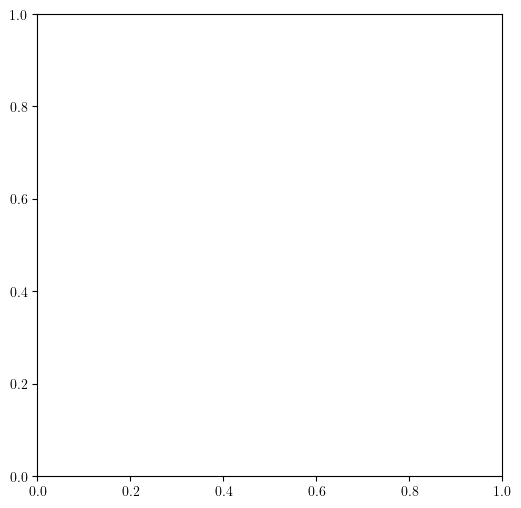

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
gridplot_X, gridplot_Y = np.meshgrid(E_Higgs, m_diNu)
ax.set_title(f"Event \#{evt_id}")
ax.set_xlabel("Higgs energy [GeV]")
ax.set_ylabel("di-neutrino pseudorapidity")
ax.contourf(gridplot_X, gridplot_Y, gridplot_Z, cmap=my_cmap, vmin=0)
lab = 'Estimate:'+ r'$(\hat{E}_H,\hat{m}_{\nu\nu})=$'+ '({:.2f},{:.2f})'.format(max_EH,max_mass) +\
'\n'+r'$\hat{P}_{\nu\nu} =$'+'({:.2f},{:.2f},{:.2f},{:.2f})'.format(max_diNu[0],max_diNu[1],max_diNu[2],max_diNu[3])
ax.axvline(max_EH , ls='dotted', c='r', lw=1, label=lab)
ax.axhline(max_mass, ls='dotted', c='r', lw=1)
lab = '\_\_\_'+'Truth:'+ r'$(E_H,m_{\nu\nu})=$'+ '({:.2f},{:.2f})'.format(Higgs['E'].iat[evt_id],diNu_mass) +\
'\n'+r'$P_{\nu\nu} =$'+'({:.2f},{:.2f},{:.2f},{:.2f})'.format(diNeutrino['E' ].iat[evt_id],\
                                                         diNeutrino['px'].iat[evt_id],\
                                                         diNeutrino['py'].iat[evt_id],\
                                                         diNeutrino['pz'].iat[evt_id])
ax.axvline(Higgs['E'].iat[evt_id], ls='dotted', c='g', lw=1)
ax.axhline(diNu_mass, ls='dotted', c='g', lw=1,label = lab)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=1)#x.legend(loc='best')
plt.show()

NameError: name 'my_function' is not defined

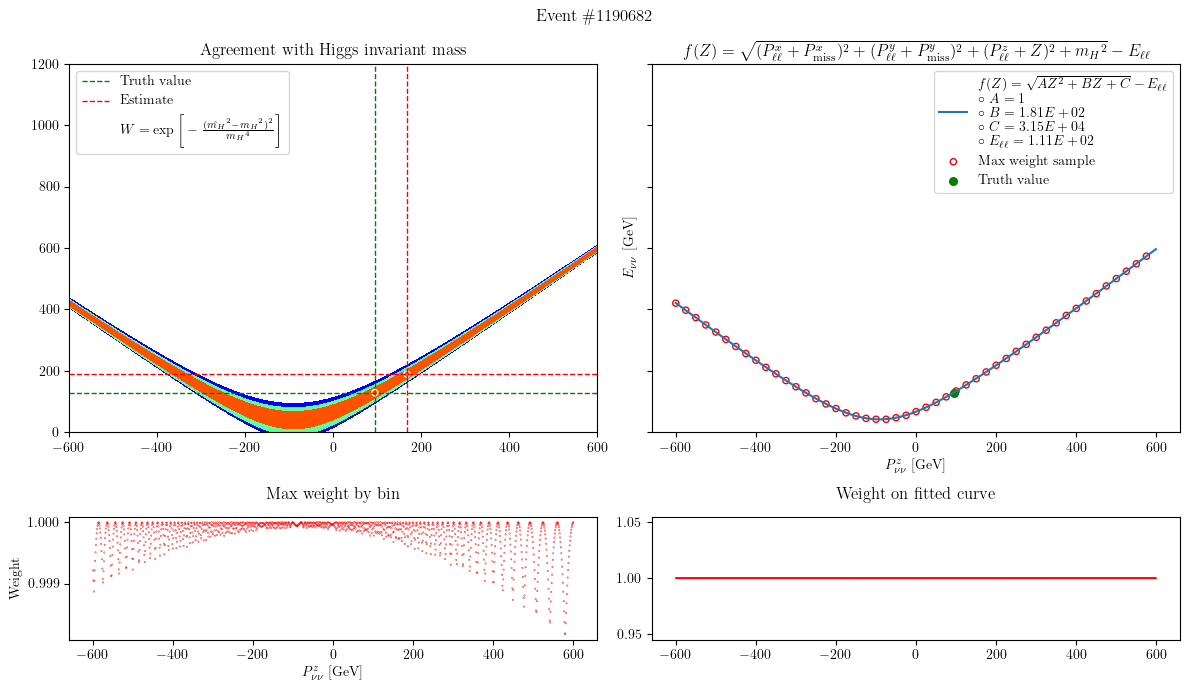

In [21]:
evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
for plots in range(1):
    #evt_id = (np.random.choice(len(Higgs['E']),size=1))[0] # random event number
    # Initialize parameters
    MET_x_std = np.std(MET['px'])
    MET_y_std = np.std(MET['py'])
    diLep_eta_std = np.std(diLepton['eta'])
    m_Higgs = 125.35 # GeV
    # Truth values for di-lepton
    diLep = np.array([  diLepton[ 'E'].iat[evt_id],\
                        diLepton['px'].iat[evt_id],\
                        diLepton['py'].iat[evt_id],\
                        diLepton['pz'].iat[evt_id],\
                        diLepton[ 'm'].iat[evt_id]]) #(E, Px, Py, Pz, m)
    # Truth values for di-neutrino
    diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                      diNeutrino['px'].iat[evt_id],\
                      diNeutrino['py'].iat[evt_id],\
                      diNeutrino['pz'].iat[evt_id],\
              np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
    P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
    eta_diLep = diLepton['eta'].iat[evt_id]
    # Truth values for MET
    PT_miss = np.array([MET['pt'].iat[evt_id],MET['px'].iat[evt_id],MET['py'].iat[evt_id]]) #(PT, Px, Py)
    PT2_total = (diLep[1]+PT_miss[1])*(diLep[1]+PT_miss[1]) + (diLep[2]+PT_miss[2])*(diLep[2]+PT_miss[2])
    # Initialize variables
    steps = 1200 # discretize variables
    E_diNu = np.linspace(0,1200,steps) # E resolution 1 GeV
    Pz_diNu = np.linspace(-600,600,steps) # Pz resolution 1 GeV
    # Initialize weights
    grid_z = np.zeros(shape=(steps,steps))
    E_max = 0 # record energy at maximum weight point
    Z_max = 0 # record Pz at maximum weight point
    W_max = -1 # record maximum weight
    # Iterate E-Pz phase space to find solutions in good agreement with Higgs invariant mass
    for yi,E in enumerate(E_diNu):
        for xj,Z in enumerate(Pz_diNu):
            EH2 = (E+diLep[0])*(E+diLep[0])
            PH2 = PT2_total + (Z+diLep[3])*(Z+diLep[3])
            MH2 = EH2 - PH2
            diNu_P = np.sqrt((PT_miss[0]*PT_miss[0]) + Z*Z)
            diNu_eta = np.arctanh(Z/diNu_P)
            if MH2 < 0:
                grid_z[yi,xj] = -1
            else:
                dM2 = MH2 - m_Higgs*m_Higgs
                # weight according to difference in squared invariant mass
                grid_z[yi,xj] = np.exp(-1*(dM2/m_Higgs/m_Higgs)*(dM2/m_Higgs/m_Higgs)) 
                if grid_z[yi,xj] > W_max :
                    if np.abs(eta_diLep - diNu_eta)<2 and (diLep[3]/Z)*(diLep[3]/Z)<4:
                        E_max = E
                        Z_max = Z
                        W_max = grid_z[yi,xj]
    # End of 2D phase space scan            
    grid_x, grid_y = np.meshgrid(Pz_diNu,E_diNu)
    fig, ax = plt.subplots(2,2,figsize=(12,7), gridspec_kw={'height_ratios': [3,1]},tight_layout=True)
    plt.suptitle('Event \#{}'.format(evt_id))
    ax[0,0].set_title("Agreement with Higgs invariant mass")
    ax[0,0].contourf(grid_x,grid_y,grid_z,vmin=0.3,cmap=my_cmap) # threshold value for weight set at 0.3 
    ax[0,0].axhline(diNu[0],ls='dashed',c='g',lw=1,label='Truth value')
    ax[0,0].axhline(E_max,ls='dashed',c='r',lw=1,label='Estimate')
    ax[0,0].axvline(diNu[3],ls='dashed',c='g',lw=1)
    ax[0,0].axvline(Z_max,ls='dashed',c='r',lw=1)
    ax[0,0].scatter(diNu[3],diNu[0], facecolors='None',s=20,edgecolor='w')
    label_f=r'$W = \exp\bigg[-\frac{({\hat{m_H}}^2 - {m_H}^2)^2}{{m_H}^4}\bigg]$'
    ax[0,0].scatter(Z_max,E_max, facecolors='None',s=20,edgecolor='w',label=label_f)     
    ax[0,1].set_ylabel(r"$E_{\nu\nu}$ [GeV]")
    ax[0,0].legend()
    ax[1,0].set_title(r"Max weight by bin",pad=12)
    weights = np.max(grid_z,axis=0) # locate max weight value in each Pz bin
    max_E = np.argmax(grid_z,axis=0) # locate E corresponding to the maximum weight in each Pz bin
    ax[1,0].scatter(Pz_diNu,weights,s=0.1,facecolors='None',edgecolor='r') # plot out the max weight value at each Pz
    ax[1,0].set_xlabel(r"$P^z_{\nu\nu}$ [GeV]") 
    ax[1,0].set_ylabel(r"Weight")
    max_weight = np.where(weights>0.9) # set threshold value for weight sampling
    ax[0,1].scatter(Pz_diNu[max_weight][0::25],E_diNu[max_E][max_weight][0::25],facecolors='None',edgecolor='r',s=20,lw=1,label='Max weight sample')
    ax[0,1].set_title(r"$f(Z) = \sqrt{(P^x_{\ell\ell}+P^x_\mathrm{miss})^2 +(P^y_{\ell\ell}+P^y_\mathrm{miss})^2 +(P^z_{\ell\ell}+Z)^2 + {m_H}^2} - E_{\ell\ell}$")
    # rewrite Higgs invariant mass equation (2 D.O.F) as a one variable function
    def EZ_poly(x,A,B,C,D):
        return np.sqrt(A*x*x + B*x + C) - D
    a = 1
    b = 2*diLep[3]
    c = diLep[3]*diLep[3] +\
       (diLep[2]+PT_miss[2])*(diLep[2]+PT_miss[2]) +\
       (diLep[1]+PT_miss[1])*(diLep[1]+PT_miss[1]) + m_Higgs*m_Higgs
    d = diLep[0]
    R = np.where(a*Pz_diNu*Pz_diNu+b*Pz_diNu+c > d*d,True,False) # exclude regions where solutions are forbidden
    ax[0,1].plot(Pz_diNu[R],EZ_poly(Pz_diNu[R],a,b,c,d),\
                 label=r"$f(Z) = \sqrt{AZ^2 + BZ + C}-E_{\ell\ell}$"+\
                  '\n'+r' ◦  $A = 1$'+\
                  '\n'+r' ◦  $B = {%.2E}$'%(b)+\
                  '\n'+r' ◦  $C = {%.2E}$'%(c)+\
                  '\n'+r' ◦  $E_{\ell\ell} = {%.2E}$'%(d))  
    ax[0,1].scatter(diNu[3],diNu[0], facecolors='g',s=30,label='Truth value') # Truth point (E, Pz)  
    #ax[0,1].scatter(Z_max,E_max, facecolors='r',s=30) # Max weight point (E, Pz) from 2D phase space scan
    #ax[0,1].axhline(diNu[0],ls='dashed',c='g',lw=1) 
    #ax[0,1].axhline(E_max,ls='dashed',c='r',lw=1)
    ax[0,1].set_ylim(ax[0,0].get_ylim())
    ax[0,1].set_yticklabels([])
    ax[0,1].legend()
    # Calculate Px Py with values on the Pz, E curve. Weight according to difference from missing Px Py 
    def weight_XY(X_hat,Y_hat):
        dx = (-1*0.5)*((X_hat - PT_miss[1])/MET_x_std)*((X_hat - PT_miss[1])/MET_x_std)
        dy = (-1*0.5)*((Y_hat - PT_miss[2])/MET_y_std)*((Y_hat - PT_miss[2])/MET_y_std)
        return np.exp(dx)*np.exp(dy)
    weights = np.zeros(len(Pz_diNu[R])) # initialize weight along Pz domain
    max_weight = -1 
    E_max = 0 # record energy at maximum weight point
    Z_max = 0 # record Pz at maximum weight point
    # Pz phase space scan
    for i, Z in enumerate(Pz_diNu[R]):
        diNu_E = EZ_poly(Z,a,b,c,d)
        diNu_m2 = diNu_E*diNu_E - PT_miss[0]*PT_miss[0] - Z*Z
        M = 0.5*(m_Higgs*m_Higgs - diNu_m2 - diLep[4]*diLep[4]) - diLep[0]*diNu_E + diLep[3]*Z 
        C = M*M - diLep[1]*diLep[1]*PT_miss[0]*PT_miss[0] 
        B = 2*M*diLep[2]
        A = diLep[1]*diLep[1] + diLep[2]*diLep[2]
        det = B*B - 4*A*C
        # solve quadratic equation
        if np.abs(det) < 100: #tolerance for near exact values -10^2 < b^2 - 4ac < 10^2
            Y = -1*B/(2*A)
            if PT_miss[0]*PT_miss[0] - Y*Y < 0:
                weights[i] = -1
            else:
                X = np.sqrt(PT_miss[0]*PT_miss[0] - Y*Y)*(np.abs(PT_miss[1])/PT_miss[1]) 
                weights[i] = weight_XY(X,Y) 
        elif det < 0:
            weights[i] = -1
        else:
            Y1 = (-1*B + np.sqrt(det))/(2*A)
            # avoiding negatives in square roots
            if (PT_miss[0]*PT_miss[0] - Y1*Y1) < 0:
                W1 = -1
            else:
                X1 = np.sqrt(PT_miss[0]*PT_miss[0] - Y1*Y1)*(np.abs(PT_miss[1])/PT_miss[1])
                W1 = weight_XY(X1,Y1)
            Y2 = (-1*B - np.sqrt(det))/(2*A)
            # avoiding negatives in square roots
            if (PT_miss[0]*PT_miss[0] - Y2*Y2) < 0:
                W2 = -1
            else:
                X2 = np.sqrt(PT_miss[0]*PT_miss[0] - Y2*Y2)*(np.abs(PT_miss[1])/PT_miss[1])
                W2 = weight_XY(X2,Y2)
            weights[i] = W1 if W1>W2 else W2 # compare weight from solution pair
            if weights[i] > max_weight: # update temporary maximum weight value
                max_weight = weights[i]
                Z_max = Z
                E_max  = diNu_E
    # end of 1D phase space scan
    ax[1,1].set_title("Weight on fitted curve",pad=12)  
    ax[1,1].scatter(Pz_diNu[R],weights,s=0.1,facecolors='None',edgecolor='r') # plot weight at each point along Pz-E curve
    if E_max*Z_max == 0:
        ax[1,1].text(0,0.975,"No solutions found")
    ax[1,1].ticklabel_format(axis='x',style='sci',useMathText=True,scilimits=(-3,3)) 
    ax[0,1].set_xlabel(r"$P^z_{\nu\nu}$ [GeV]")
    #ax[0,1].axvline(Z_max,ls='dashed',c='k',lw=1,label='Fit estimate')
    #ax[0,1].axhline(E_max,ls='dashed',c='k',lw=1)
    # Pseudorapidity weight term:
    # eta = arctanh(pz/P)
    P_diNu = PT_miss[0]*PT_miss[0] + Pz_diNu[R]*Pz_diNu[R]
    eta_diNu_est = np.arctanh(Pz_diNu[R]/P_diNu)
    #r = 2/3 # scale factor
    #r = 1
    #def weight_eta(eta):
    #    d_eta = (eta - r*eta_diLep)/diLep_eta_std
    #    return np.exp(-1*d_eta**10)
    #v_weight_eta = np.vectorize(weight_eta)
    #eta_weight = weights*(v_weight_eta(eta_diNu_est))
    ax[1,1].scatter(Pz_diNu[R],weights*(my_function(eta_diNu_est,2,eta_mean*1.05,eta_std*0.99)),s=0.1,facecolors='None',edgecolor='g') # reweight according to deviation from lepton pseudorapidity
    #Pz_eta_max = np.argmax(eta_weight)
    #ax[0,1].axvline(Pz_diNu[Pz_eta_max],ls='dashed',c='b',lw=1,label=r'Weighted $\eta$')
    ax[1,1].axvline(PT_miss[0]*np.sinh(1.06),ls='dashed',c='b',lw=1) 
    #ax[1,1].axvline(diLep[3],ls='dashed',c='C0',lw=1) 
    #ax[0,1].axvline(diLep[3],ls='dashed',c='C0',lw=1,label=r'$P^z_{\ell\ell}$') 
    ax[0,1].legend()
    plt.savefig('../Neutrino weighting/diLepton-diNeutrino/{}.png'.format(evt_id))
    plt.show()

In [522]:
%%time
x = 1
E_estimates = np.zeros(x)
Pz_estimates = np.zeros(x)
E_truth = np.zeros(x)
Pz_truth = np.zeros(x)
for N_events in range(x):
    evt_id = (np.random.choice(len(Higgs['E']),size=1))[0] # random event number
    # Initialize parameters
    MET_x_std = np.std(MET['px'])
    MET_y_std = np.std(MET['py'])
    diLep_eta_std = np.std(diLepton['eta'])
    m_Higgs = 125.35 # GeV
    # Truth values for di-lepton
    diLep = np.array([  diLepton[ 'E'].iat[evt_id],\
                        diLepton['px'].iat[evt_id],\
                        diLepton['py'].iat[evt_id],\
                        diLepton['pz'].iat[evt_id],\
                        diLepton[ 'm'].iat[evt_id]]) #(E, Px, Py, Pz, m)
    # Truth values for di-neutrino
    diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                      diNeutrino['px'].iat[evt_id],\
                      diNeutrino['py'].iat[evt_id],\
                      diNeutrino['pz'].iat[evt_id],\
              np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
    P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
    eta_diLep = diLepton['eta'].iat[evt_id]
    # Truth values for MET
    PT_miss = np.array([MET['pt'].iat[evt_id],MET['px'].iat[evt_id],MET['py'].iat[evt_id]]) #(PT, Px, Py)
    PT2_total = (diLep[1]+PT_miss[1])*(diLep[1]+PT_miss[1]) + (diLep[2]+PT_miss[2])*(diLep[2]+PT_miss[2])
    # Initialize variables
    steps = 1200 # discretize variables
    E_diNu = np.linspace(0,1200,steps) # E resolution 1 GeV
    Pz_diNu = np.linspace(-600,600,steps) # Pz resolution 1 GeV
    # Initialize weights
    grid_z = np.zeros(shape=(steps,steps))
    E_max = 0 # record energy at maximum weight point
    Z_max = 0 # record Pz at maximum weight point
    W_max = -1 # record maximum weight
    # Iterate E-Pz phase space to find solutions in good agreement with Higgs invariant mass
    for yi,E in enumerate(E_diNu):
        for xj,Z in enumerate(Pz_diNu):
            EH2 = (E+diLep[0])*(E+diLep[0])
            PH2 = PT2_total + (Z+diLep[3])*(Z+diLep[3])
            MH2 = EH2 - PH2
            diNu_P = np.sqrt((PT_miss[0]*PT_miss[0]) + Z*Z)
            diNu_eta = np.arctanh(Z/diNu_P)
            if MH2 < 0:
                grid_z[yi,xj] = -1
            else:
                dM2 = MH2 - m_Higgs*m_Higgs
                # weight according to difference in squared invariant mass
                grid_z[yi,xj] = np.exp(-1*(dM2/m_Higgs/m_Higgs)*(dM2/m_Higgs/m_Higgs)) 
                if grid_z[yi,xj] > W_max :
                    if np.abs(diLep_eta - diNu_eta)<2 and (diLep[3]/Z)*(diLep[3]/Z)<4:
                        #E_max = E
                        E_estimates[N_events]= E
                        Pz_estimates[N_events]= Z
                        E_truth[N_events]= diNu[0]
                        Pz_truth[N_events]= diNu[3]
                        #Z_max = Z
                        #W_max = grid_z[yi,xj]

CPU times: user 17min 49s, sys: 5.8 s, total: 17min 55s
Wall time: 17min 41s


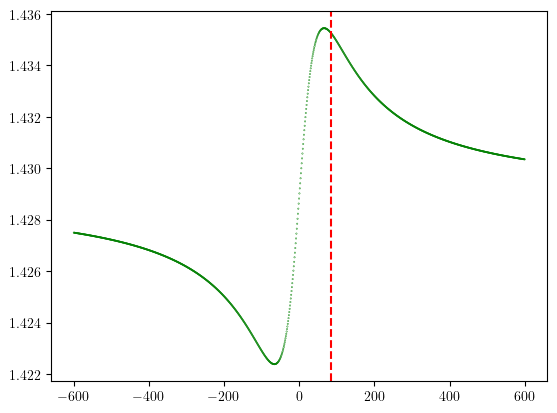

In [169]:

plt.scatter(Pz_diNu[R],weights*(my_function(eta_diNu_est,2,eta_mean*1.05,eta_std*0.99)),s=0.1,facecolors='None',edgecolor='g') # reweight according to deviation from lepton pseudorapidity
plt.axvline(PT_miss[0]*np.sinh(eta_mean),ls='dashed',c='r')
plt.show()

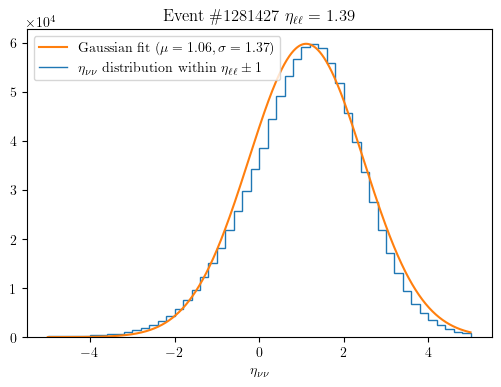

In [163]:
import scipy
from scipy.stats import norm
def my_function(x,A,mu,sigma):
    dx = (x-mu)/sigma
    return A*np.exp(-0.5*dx*dx)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,4))
x_data = np.linspace(-5,5,1000)
eta_data = diNeutrino['eta'][np.abs(diLepton['eta'] - eta_diLep)<1]
eta_min = np.min(eta_data)
eta_max = np.max(eta_data)
eta_mean = np.mean(eta_data)
eta_std = np.std(eta_data)
eta_hist,bin_edges = np.histogram(eta_data,bins=50,range=[-5,5])
plt.stairs(eta_hist,edges=bin_edges,label=r'$\eta_{\nu\nu}$ distribution within $\eta_{\ell\ell}\pm1$')
plt.plot(x_data,my_function(x_data,max(eta_hist),eta_mean*1.05,eta_std*0.99),label=r'Gaussian fit ($\mu={%.2f},\sigma={%.2f}$)'%(eta_mean,eta_std))
ax.set_title("Event \#{}".format(evt_id)+'\t'+r'$\eta_{\ell\ell} = {{%.2f}}$'%(eta_diLep))
ax.set_xlabel(r'$\eta_{\nu\nu}$')
ax.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
ax.legend(loc=2)
plt.show()

(1200,)
(1200,)
(1200,)
(1200,)


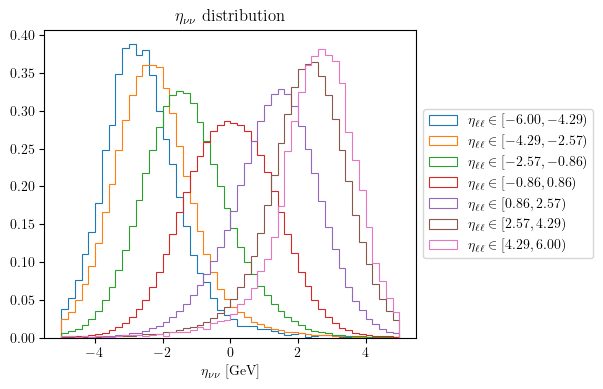

In [416]:
#plt.hist(diLeptoi['eta']-diNeutrino['eta'],bins=50,range = [-10,10],histtype='step')
#ax[1,1].scatter(Pz_diNu[R],eta_weight,s=0.1,facecolors='None',edgecolor='g') # reweight according to deviation from lepton pseudorapidity
eta_weight = weights*v_weight_eta(eta_diNu_est)
print(Pz_diNu[R].shape)
print(eta_diNu_est.shape)
print(eta_weight.shape)
print(eta_weight.shape)
#plt.plot(eta_diNu_est)
Pz_step = np.linspace(-6,6,8)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ax.set_title(r"$\eta_{\nu\nu}$ distribution")
for i in range(len(Pz_step) - 1):
    Pz_high = Pz_step[i+1]
    Pz_low = Pz_step[i]
    ax.hist(diNeutrino['eta'][(diLepton['eta']>=Pz_low)&(diLepton['eta']<Pz_high)],bins=50,range=[-5,5],histtype='step',density=True,lw=0.8,label=r"$\eta_{\ell\ell} \in[{%.2f},{%.2f})$"%(Pz_low,Pz_high))
ax.set_xlabel(r'$\eta_{\nu\nu}$')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

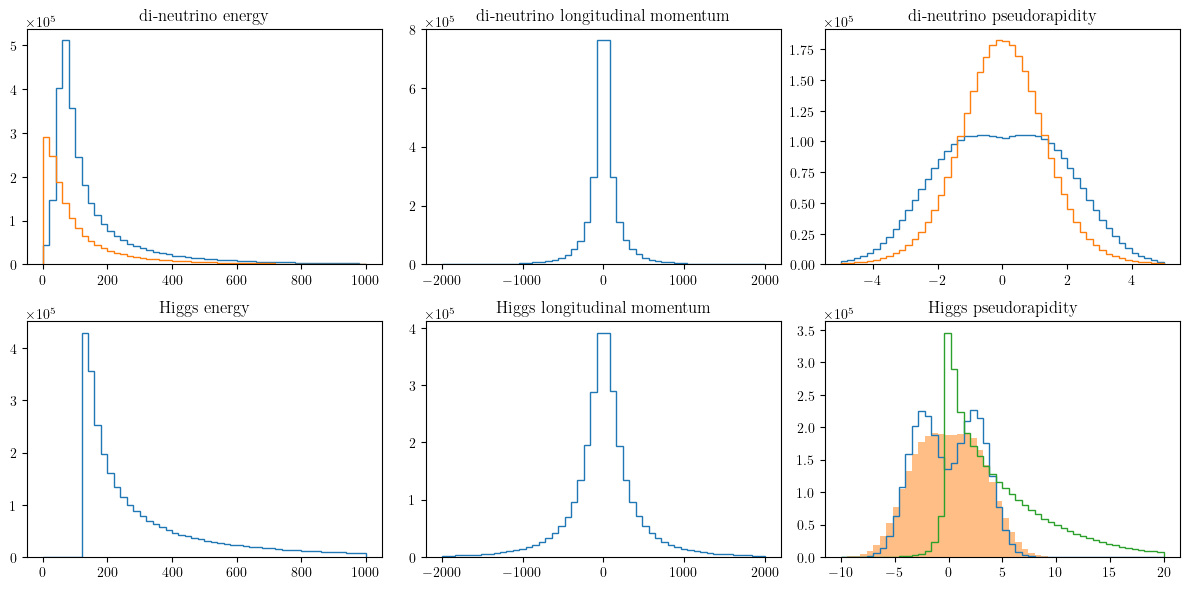

In [164]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(12,6),tight_layout=True)
ax = ax.flatten()
#ax[0].hist(np.sqrt(diNeutrino['m2'][diNeutrino['m2']>0]),bins=50,range=[0,100],histtype='step',lw=1)
#ax[0].set_title("di-neutrino invariant mass")
ax[0].hist(diNeutrino['E'],bins=50,range=[0,1000],histtype='step',lw=1)
ax[0].hist(diLepton['E']-diNeutrino['E'],bins=50,range=[0,1000],histtype='step',lw=1)
ax[0].set_title("di-neutrino energy")
ax[1].hist(diNeutrino['pz'],bins=50,range=[-2000,2000],histtype='step',lw=1)
ax[1].set_title("di-neutrino longitudinal momentum")
ax[2].hist(diNeutrino['eta'],bins=50,range=[-5,5],histtype='step',lw=1)
ax[2].hist(diNeutrino['eta']-diLepton['eta'],bins=50,range=[-5,5],histtype='step',lw=1)
ax[2].set_title("di-neutrino pseudorapidity")
ax[4].hist(Higgs['pz'],bins=50,range=[-2000,2000],histtype='step',lw=1)
ax[4].set_title("Higgs longitudinal momentum")
ax[3].hist(Higgs['E'],bins=50,range=[0,1000],histtype='step',lw=1)
ax[3].set_title("Higgs energy")
ax[5].hist(Higgs['eta'],bins=50,range=[-10,20],histtype='step',lw=1)
ax[5].hist(diLepton['eta']*(5/3),bins=50,range=[-10,20],histtype='bar',alpha=0.5)
ax[5].hist(Higgs['eta']*diLepton['eta'],bins=50,range=[-10,20],histtype='step',lw=1)
ax[5].set_title("Higgs pseudorapidity")
for i in ax:
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

# Separating the di-neutrino four-momentum

Bayes' Theorem: 
$$
\Pr(A\vert B) = {\Pr(B \vert A)\Pr(A)\over \Pr(B)}
$$  
* Problem of interest: Chance of getting the on-shell W boson by selecting the leading lepton parent W boson
$$
\Pr\left(m_{W^*} > m_{W} \vert P^T_{\ell^*} > P^T_{\ell}\right)
$$
* Problem of interest: Chance of getting the leading lepton by selecting the on-shell W boson child lepton
$$
\Pr\left(P^T_{\ell^*}  > P^T_{\ell}\right\vert m_{W^*} > m_{W} )
$$

In [8]:
LeadingW      = np.where(LeptonP['pt']>LeptonM['pt'],WBosonP['m' ],WBosonM['m' ])
subLeadingW   = np.where(LeptonP['pt']>LeptonM['pt'],WBosonM['m' ],WBosonP['m' ])
LeadingPT     = np.where(LeptonP['pt']>LeptonM['pt'],LeptonP['pt'],LeptonM['pt'])
subLeadPT     = np.where(LeptonP['pt']>LeptonM['pt'],LeptonM['pt'],LeptonP['pt'])
on_shell_m    = np.where(WBosonP['m' ]>WBosonM['m' ],WBosonP['m' ],WBosonM['m' ])
off_shell_m   = np.where(WBosonP['m' ]>WBosonM['m' ],WBosonM['m' ],WBosonP['m' ])
on_shell_lep  = np.where(WBosonP['m' ]>WBosonM['m' ],LeptonP['pt'],WBosonM['pt'])
off_shell_lep = np.where(WBosonP['m' ]>WBosonM['m' ],LeptonM['pt'],LeptonP['pt'])
Wp_on_shell   = np.where(WBosonP['m' ]>WBosonM['m' ],True,False) 
lp_leading    = np.where(LeptonP['pt']>LeptonM['pt'],True,False)
leading_on_shell  = np.concatenate((
    WBosonP['m'][( Wp_on_shell)&( lp_leading)],
    WBosonM['m'][(~Wp_on_shell)&(~lp_leading)]),
    axis=0
)
leading_off_shell = np.concatenate((
    WBosonP['m'][(~Wp_on_shell)&( lp_leading)],
    WBosonM['m'][( Wp_on_shell)&(~lp_leading)]),
    axis=0
)
subLead_on_shell  = np.concatenate((
    WBosonP['m'][( Wp_on_shell)&(~lp_leading)],
    WBosonM['m'][(~Wp_on_shell)&( lp_leading)]),
    axis=0
)
subLead_off_shell  = np.concatenate((
    WBosonP['m'][(~Wp_on_shell)&(~lp_leading)],
    WBosonM['m'][( Wp_on_shell)&( lp_leading)]),
    axis=0
)
on_shell_leading  = np.concatenate((
    LeptonP['pt'][( Wp_on_shell)&( lp_leading)],
    LeptonM['pt'][(~Wp_on_shell)&(~lp_leading)]),
    axis=0
)
off_shell_leading = np.concatenate((
    LeptonP['pt'][(~Wp_on_shell)&( lp_leading)],
    LeptonM['pt'][( Wp_on_shell)&(~lp_leading)]),
    axis=0
)
on_shell_subLead  = np.concatenate((
    LeptonP['pt'][( Wp_on_shell)&(~lp_leading)],
    LeptonM['pt'][(~Wp_on_shell)&( lp_leading)]),
    axis=0
)
off_shell_subLead = np.concatenate((
    LeptonP['pt'][(~Wp_on_shell)&(~lp_leading)],
    LeptonM['pt'][( Wp_on_shell)&( lp_leading)]),
    axis=0
)

In [9]:
%%time

PT_cut = np.linspace(0,200,200)
Percent_leading  = np.zeros(len(PT_cut))
Percent_on_shell = np.zeros(len(PT_cut))
counts_after_cut = np.zeros(len(PT_cut))

for i, cut in enumerate(PT_cut):
    '''event selection'''
    # Filter events below threshold (set to false)
    events = np.where(LeadingPT > cut, True, False) 
    # record amount of events that pass pT cut. Count true (events counts)
    counts_after_cut[i] = np.sum(events) 
    '''Pr( mW > m[W*] | PT[lep] > PT[lep*] )'''
    # consider leading leptons, count on-shell parent W bosons
    leading_lep_on  = len(LeptonP['pt'][( Wp_on_shell)&( lp_leading)&(events)])+len(LeptonM['pt'][(~Wp_on_shell)&(~lp_leading)&(events)])
    leading_lep_off = len(LeptonP['pt'][(~Wp_on_shell)&( lp_leading)&(events)])+len(LeptonM['pt'][( Wp_on_shell)&(~lp_leading)&(events)])
    #sublead_lep_on  = len(LeptonP['pt'][( Wp_on_shell)&(~lp_leading)&(events)])+len(LeptonM['pt'][(~Wp_on_shell)&( lp_leading)&(events)])
    #sublead_lep_off = len(LeptonP['pt'][(~Wp_on_shell)&(~lp_leading)&(events)])+len(LeptonM['pt'][( Wp_on_shell)&( lp_leading)&(events)])
    Percent_leading[i] = leading_lep_on/(leading_lep_off+leading_lep_on)
    '''Pr( PT[lep] > PT[lep*] | mW > m[W*] )'''
    # consider on shell W bosons, count leading lepton children
    # on_W_pt = LeptonP['pt'][(Wp_on_shell)&(events)] + LeptonM['pt'][(~Wp_on_shell)&(events)] -> (1,_,0,_)
    # on_W_pt_lead = LeptonP['pt'][(Wp_on_shell)&(events)] > LeptonM['pt'][(Wp_on_shell)&(events)] (1,1)
    #              + LeptonM['pt'][(~Wp_on_shell)&(events)] > LeptonP['pt'] (0,0)
    on_W_leading    = len(WBosonP['m' ][( Wp_on_shell)&( lp_leading)&(events)])+len(WBosonM['m' ][(~Wp_on_shell)&(~lp_leading)&(events)])
    on_W_sublead    = len(WBosonP['m' ][( Wp_on_shell)&(~lp_leading)&(events)])+len(WBosonM['m' ][(~Wp_on_shell)&( lp_leading)&(events)])
    #off_W_leading   = len(WBosonP['m' ][(~Wp_on_shell)&( lp_leading)&(events)])+len(WBosonM['m' ][( Wp_on_shell)&(~lp_leading)&(events)])
    #off_W_sublead   = len(WBosonP['m' ][(~Wp_on_shell)&( lp_leading)&(events)])+len(WBosonM['m' ][( Wp_on_shell)&( lp_leading)&(events)])
    Percent_on_shell[i]= on_W_leading/(on_W_leading+on_W_sublead)


CPU times: user 11 s, sys: 0 ns, total: 11 s
Wall time: 11 s


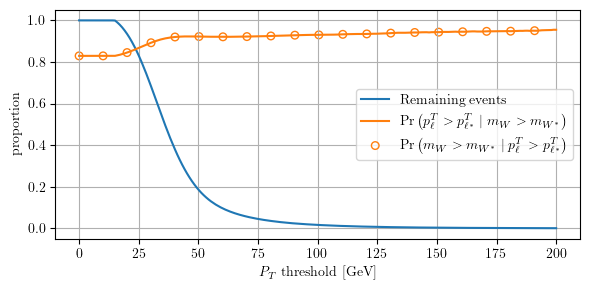

In [11]:
fig,ax=plt.subplots(figsize=(6,3),tight_layout=True)
ax.plot(PT_cut, counts_after_cut/len(LeptonP['pt']),label='Remaining events')
ax.plot(PT_cut,Percent_leading ,label=r'$\Pr \big( p^T_{\ell} > p^T_{\ell^*} \mid m_W > m_{W^*} \big)$')
ax.scatter(PT_cut[0::10],Percent_on_shell[0::10],label=r'$\Pr \big( m_W > m_{W^*} \mid p^T_{\ell} > p^T_{\ell^*} \big)$',facecolor = 'None',s=30,edgecolor='C1')
ax.set_xlabel(r"$P_T$ threshold [GeV]")
ax.set_ylabel(r'proportion')
ax.legend()
ax.grid()
plt.show()

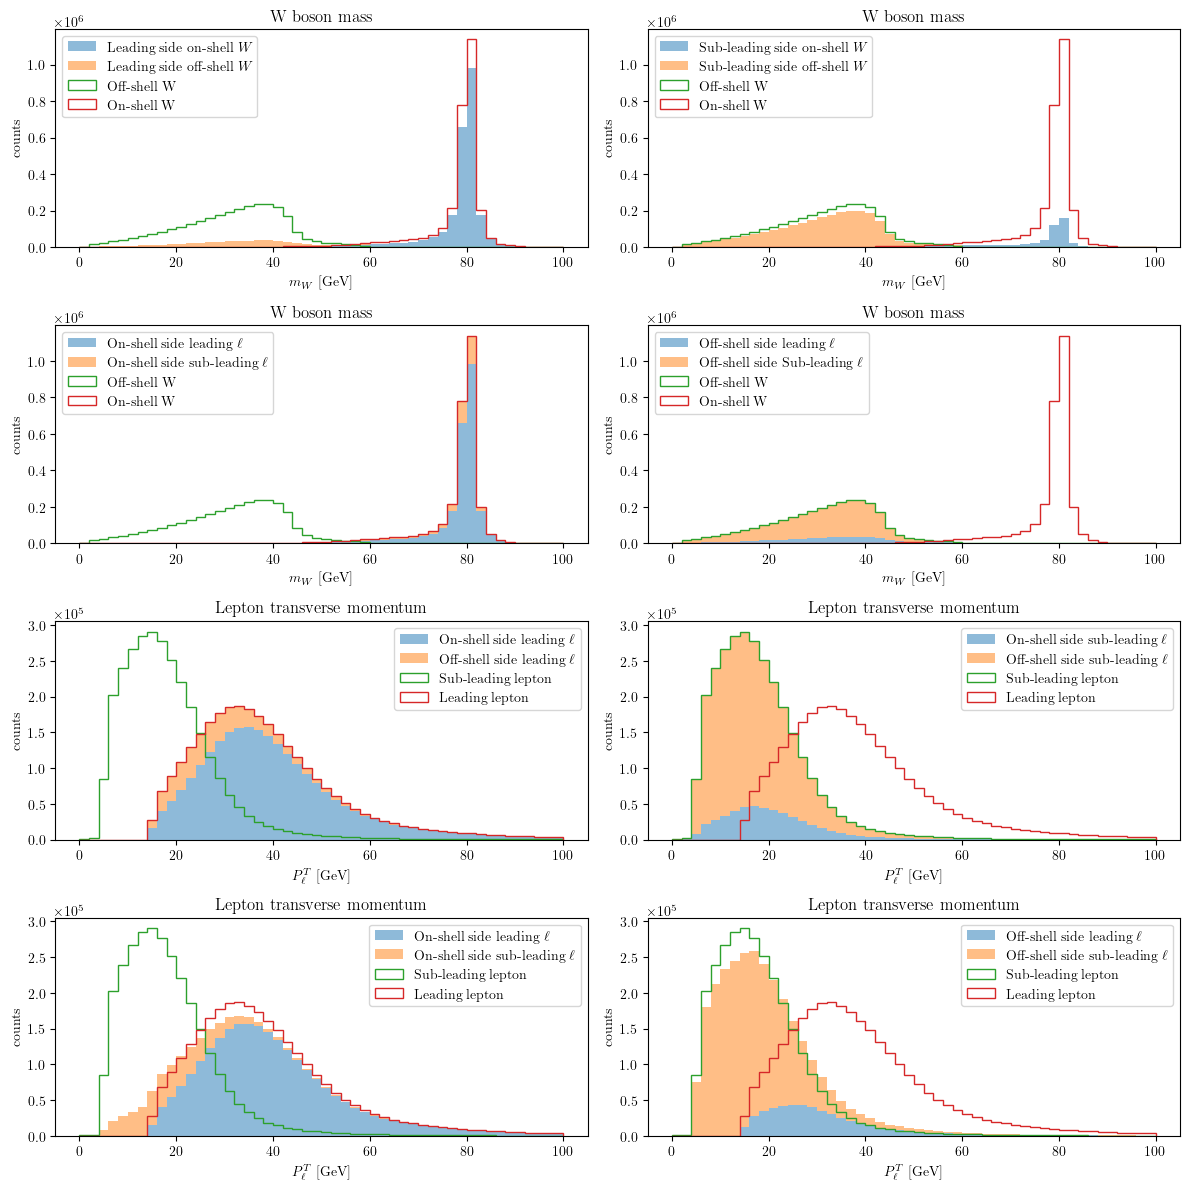

In [640]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(4,2)
ax = []
ax.append( fig.add_subplot(gs[0, 0]) )
ax.append( fig.add_subplot(gs[0, 1]) )
ax.append( fig.add_subplot(gs[1, 0]) )
ax.append( fig.add_subplot(gs[1, 1]) )
ax.append( fig.add_subplot(gs[2, 0]) )
ax.append( fig.add_subplot(gs[2, 1]) )
ax.append( fig.add_subplot(gs[3, 0]) )
ax.append( fig.add_subplot(gs[3, 1]) )
'''Row 0'''
# column 0
ax[0].hist([leading_on_shell,leading_off_shell],histtype='barstacked',bins=50,range=[0,100],label=[r'Leading side on-shell $W$',r'Leading side off-shell $W$'],alpha=0.5)
ax[1].hist([subLead_on_shell,subLead_off_shell],histtype='barstacked',bins=50,range=[0,100],label=[r'Sub-leading side on-shell $W$',r'Sub-leading side off-shell $W$'],alpha=0.5)
'''Row 1'''
ax[2].hist([leading_on_shell,subLead_on_shell],histtype='barstacked',bins=50,range=[0,100],label=[r'On-shell side leading $\ell$',r'On-shell side sub-leading $\ell$'],alpha=0.5)
ax[3].hist([leading_off_shell,subLead_off_shell],histtype='barstacked',bins=50,range=[0,100],label=[r'Off-shell side leading $\ell$',r'Off-shell side Sub-leading $\ell$'],alpha=0.5)
for i in [0,1,2,3]:
    ax[i].hist(off_shell_m,histtype='step',bins=50,range=[0,100],label='Off-shell W' )
    ax[i].hist(on_shell_m, histtype='step',bins=50,range=[0,100],label='On-shell W')
    ax[i].set_title("W boson mass")
    ax[i].set_xlabel(r'$m_W$ [GeV]')
'''Row 2'''
ax[4].hist([on_shell_leading,off_shell_leading],histtype='barstacked',bins=50,range=[0,100],label=[r'On-shell side leading $\ell$',r'Off-shell side leading $\ell$'],alpha=0.5)
ax[5].hist([on_shell_subLead,off_shell_subLead],histtype='barstacked',bins=50,range=[0,100],label=[r'On-shell side sub-leading $\ell$',r'Off-shell side sub-leading $\ell$'],alpha=0.5)
ax[6].hist([on_shell_leading,on_shell_subLead],histtype='barstacked',bins=50,range=[0,100],label=[r'On-shell side leading $\ell$',r'On-shell side sub-leading $\ell$'],alpha=0.5)
ax[7].hist([off_shell_leading,off_shell_subLead],histtype='barstacked',bins=50,range=[0,100],label=[r'Off-shell side leading $\ell$',r'Off-shell side sub-leading $\ell$'],alpha=0.5)
for i in [4,5,6,7]:
    ax[i].hist(subLeadPT,histtype='step',bins=50,range=[0,100],label='Sub-leading lepton')
    ax[i].hist(LeadingPT,histtype='step',bins=50,range=[0,100],label='Leading lepton')
    ax[i].set_title("Lepton transverse momentum")
    ax[i].set_xlabel(r'$P^T_\ell$ [GeV]')
'''
a = ax[1].inset_axes([0.4,0.25,0.5,0.4])
a.hist(leading_PT,bins=50,range=[0,200],histtype='step')
a.set_title('Leading Lepton $p_T$')
a.set_xlabel('[GeV]')
a.set_ylabel('counts')
a.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
'''
for i in ax:
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
    i.set_ylabel('counts')
    i.legend()
ax[1].legend(loc=2)
ax[3].legend(loc=2)
plt.tight_layout()
plt.show()

In [78]:
Nu2_PT = np.sqrt(Neutrino2[1]**2 + Neutrino2[2]**2)
print('M22 :',M22)
print('C22 :',PT22_coef)
print('A22 :',X22_coef)
print('B22 :',Y22_coef)
print('PT2 :',Nu2_PT)
print('X2  :',Neutrino2[1])
print('Y2  :',Neutrino2[2])
print('Residual :',M22 - PT22_coef*Nu2_PT - X22_coef*Neutrino2[1] - Y22_coef*Neutrino2[2])
#'''
#'''
print('M12 :',M12)
print('C12 :',PT12_coef)
print('A12 :',X12_coef)
print('B12 :',Y12_coef)
print('PT2 :',Nu2_PT)
print('X2  :',Neutrino2[1])
print('Y2  :',Neutrino2[2])
print('Residual :',M12 - PT12_coef*Nu2_PT - X12_coef*Neutrino2[1] - Y12_coef*Neutrino2[2])
#'''
Nu2_PT = np.sqrt((diNu[1]-Neutrino1[1])**2 + (diNu[2]-Neutrino1[2])**2)
#'''
print('M21 :',M21)
print('C21 :',PT21_coef)
print('A21 :',X21_coef)
print('B21 :',Y21_coef)
print('PT1 :',Nu2_PT)
print('X21  :',Neutrino2[1])
print('Y21  :',Neutrino2[2])
print('Residual :',M21 - PT21_coef*Nu2_PT - X21_coef*Neutrino1[1] - Y21_coef*Neutrino1[2])
#'''

#'''
print('M11 :',M11)
print('C11 :',PT11_coef)
print('A11 :',X11_coef)
print('B11 :',Y11_coef)
print('PT1 :',Nu2_PT)
print('X11  :',Neutrino1[1])
print('Y11  :',Neutrino1[2])
print('Residual :',M11 - PT11_coef*Nu2_PT - X11_coef*Neutrino1[1] - Y11_coef*Neutrino1[2])
#'''
print('= = = = = = end = = = = = =')

M22 : 788.4701263203959
C22 : 34.967845091438164
A22 : -10.322564453000002
B22 : -17.425882812
PT2 : 14.376428211802475
X2  : -9.566133789
Y2  : -10.731764648
Residual : -9.408308045522062e-05
M12 : -1157.646843570872
C12 : -94.81238946082237
A12 : 0.28952539000000144
B12 : -19.39901074200001
PT2 : 14.376428211802475
X2  : -9.566133789
Y2  : -10.731764648
Residual : 0.0006880309827010933
M21 : -283.8410702932222
C21 : 34.967845091438164
A21 : 10.322564453000002
B21 : 17.425882812
PT1 : 14.376428211802477
X21  : -9.566133789
Y21  : -10.731764648
Residual : -9.410050643055001e-05
M11 : -2178.512705779298
C11 : -94.81238946082237
A11 : -0.28952539000000144
B11 : 19.39901074200001
PT1 : 14.376428211802477
X11  : -5.106996094
Y11  : -42.111863281
Residual : 0.0006880115834064782
= = = = = = end = = = = = =


In [6]:
print(offset_1, offset_2, offset_1 + offset_2, offset_1 - offset_2)
print(PT_miss.to_numpy())
print(Neutrino1[1:3])
print(Neutrino2[1:3])

-187.9007457516263 -80.88474949835827 -268.7854952499846 -107.01599625326801
[ 68.6665656  -56.64725391 -38.80961035]
[-39.17398047 -28.8626543 ]
[-17.47327344  -9.94695606]


In [35]:
evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
evt_id = np.argmax(residuals)
#evt_id = 2022166
print('Event :',evt_id)
m_Higgs = 125.35 # GeV
four_momentum = ['E','px','py','pz','m']
diLep = diLepton.loc[evt_id,four_momentum].to_numpy()
diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                  diNeutrino['px'].iat[evt_id],\
                  diNeutrino['py'].iat[evt_id],\
                  diNeutrino['pz'].iat[evt_id],\
          np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
PT_miss = MET.loc[evt_id,['pt','px','py']]
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
diNu_mass = diNeutrino['eta'].iat[evt_id]
if LeptonP.loc[evt_id,'pt'] > LeptonM.loc[evt_id,'pt']:
    WBoson1   =   WBosonP.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonM.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonP.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonM.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoP.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoM.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoM.loc[evt_id,'eta']
    Nu2_phi   = NeutrinoM.loc[evt_id,'phi']
    Nu2_PT    = NeutrinoM.loc[evt_id ,'pt']
else:
    WBoson1   =   WBosonM.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonP.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonM.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonP.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoM.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoP.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoP.loc[evt_id,'eta']
    Nu2_phi   = NeutrinoP.loc[evt_id,'phi']
    Nu2_PT    = NeutrinoP.loc[evt_id ,'pt']
print(" On-shell W boson mass : {}".format(WBoson1[4]))  
print("Off-shell W boson mass : {}".format(WBoson2[4]))  
print("    Leading lepton mass: {}".format(Lepton1[4]))
print("Sub-leading lepton mass: {}".format(Lepton2[4]))
print("Sub-leading neutrino:")
print("\tPT : {}".format(Nu2_PT))
print("\tPhi: {}".format(Nu2_phi))
print("\tPx : {}".format(Neutrino2[1]))
print("\tPy : {}".format(Neutrino2[2]))
print("\tPz : {}".format(Neutrino2[3]))
print("\tE  : {}".format(Neutrino2[0]))
print("\tEta: {}".format(Nu2_eta))
print("Calculation:")
R00 = Nu2_PT*np.cosh(Nu2_eta) 
R03 = Nu2_PT*np.sinh(Nu2_eta)
print("\tPT*sinh(eta) = ",R03)
print("\tPT*cosh(eta) = ",R00)
L4 = WBoson2[4]**2 - Lepton2[4]**2
R0 = R00*Lepton2[0] - R03*Lepton2[3]
R1 = Lepton2[1]*Neutrino2[1]
R2 = Lepton2[2]*Neutrino2[2]
print("(LHS)   (m*)^2 - (m_l2)^2 = ", L4)
print("(RHS) 2*{PT_ν2*[E_l2*cosh(η*) - Pz_l2*sinh(η*)] - Px_l2*Px_ν2 - Py_l2*Py_ν2} = ", 2*(R0 - R1 - R2))
print("(LHS) - (RHS) = ", L4 - 2*(R0 - R1 - R2))


Event : 1376678
 On-shell W boson mass : 78.952976562
Off-shell W boson mass : 40.223238281
    Leading lepton mass: 0.0005110000000000001
Sub-leading lepton mass: 0.105660004
Sub-leading neutrino:
	PT : 0.211164493
	Phi: 1.996526
	Px : -0.08720787
	Py : 0.192315445
	Pz : 0.238483292
	E  : 0.31853527800000003
	Eta: 0.969961
Calculation:
	PT*sinh(eta) =  0.23848324033211377
	PT*cosh(eta) =  0.3185352398452199
(LHS)   (m*)^2 - (m_l2)^2 =  1617.8977337736585
(RHS) 2*{PT_ν2*[E_l2*cosh(η*) - Pz_l2*sinh(η*)] - Px_l2*Px_ν2 - Py_l2*Py_ν2} =  0.0007394765646537849
(LHS) - (RHS) =  1617.896994297094


In [34]:
np.mean(residuals)
a = (np.argmax(residuals))
print(a)
print(L4[a])
print(2*R0[a]-2*R1[a] - 2*R2[a])

1376678
1617.8977337736585
0.0007394765646573376


In [102]:
a = np.where(Lepton_e['eta']**2 < 2.5**2, True, False)
b = np.where(Lepton_mu['eta']**2 < 2.47**2, True, False)
lep_eta_cut = a&b # Detector Geometry

a = np.where(LeadingLep['pt'] > 22, True, False)
b = np.where(SubleadLep['pt'] > 15, True, False)
lep_PT_cut = a&b # Preselection

MET_cut = np.where(MET['pt'] > 20, True, False) # Preselection

a = np.where(diLepton['m'] > 10, True, False) # Preselection
b = np.where(diLepton['m'] < 55, True, False) # Topology
diLep_mass_cut = a&b # Preselection and Topology

diLep_PT_cut = np.where(diLepton['pt']>30, True, False) # Background rejection

diLep_MET_dPhi_cut = np.where( np.cos(diLepton['phi'] - MET['phi']) < 0, True, False) # Background rejection

diLep_dPhi_cut = np.where( np.cos(LeptonP['phi']-LeptonM['phi']) > np.cos(1.8), True, False) # Topology
all_cuts =  lep_eta_cut & lep_PT_cut & MET_cut & diLep_mass_cut & diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
print(np.unique(lep_eta_cut,return_counts=True))
print(np.unique(lep_PT_cut,return_counts=True))
print(np.unique(MET_cut,return_counts=True))
print(np.unique(diLep_mass_cut,return_counts=True))
print(np.unique(diLep_PT_cut,return_counts=True))
print(np.unique(diLep_dPhi_cut,return_counts=True))
print(np.unique(diLep_MET_dPhi_cut,return_counts=True))
print(np.unique(all_cuts,return_counts=True))
index_arr = []
for j,i in enumerate(all_cuts):
    if i :
        index_arr.append(j)
print(len(index_arr))


(array([False,  True]), array([ 592355, 2336507]))
(array([False,  True]), array([1322264, 1606598]))
(array([False,  True]), array([ 284319, 2644543]))
(array([False,  True]), array([ 534836, 2394026]))
(array([False,  True]), array([ 631011, 2297851]))
(array([False,  True]), array([ 792636, 2136226]))
(array([False,  True]), array([ 520347, 2408515]))
(array([False,  True]), array([2258096,  670766]))
670766


In [107]:
Higgs_SR      =      Higgs.iloc[all_cuts,::].reset_index()
WBosonP_SR    =    WBosonP.iloc[all_cuts,::].reset_index()
WBosonM_SR    =    WBosonM.iloc[all_cuts,::].reset_index()
LeptonP_SR    =    LeptonP.iloc[all_cuts,::].reset_index()
LeptonM_SR    =    LeptonM.iloc[all_cuts,::].reset_index()
diLepton_SR   =   diLepton.iloc[all_cuts,::].reset_index()
NeutrinoP_SR  =  NeutrinoP.iloc[all_cuts,::].reset_index()
NeutrinoM_SR  =  NeutrinoM.iloc[all_cuts,::].reset_index()
MET_SR        =        MET.iloc[all_cuts,::].reset_index()
diNeutrino_SR = diNeutrino.iloc[all_cuts,::].reset_index()
LeadingLep_SR = LeadingLep.iloc[all_cuts,::].reset_index()
SubleadLep_SR = SubleadLep.iloc[all_cuts,::].reset_index()
LeadingNu_SR  =  LeadingNu.iloc[all_cuts,::].reset_index()
SubleadNu_SR  =  SubleadNu.iloc[all_cuts,::].reset_index()
LeadingW_SR   =   LeadingW.iloc[all_cuts,::].reset_index()
SubleadW_SR   =   SubleadW.iloc[all_cuts,::].reset_index()

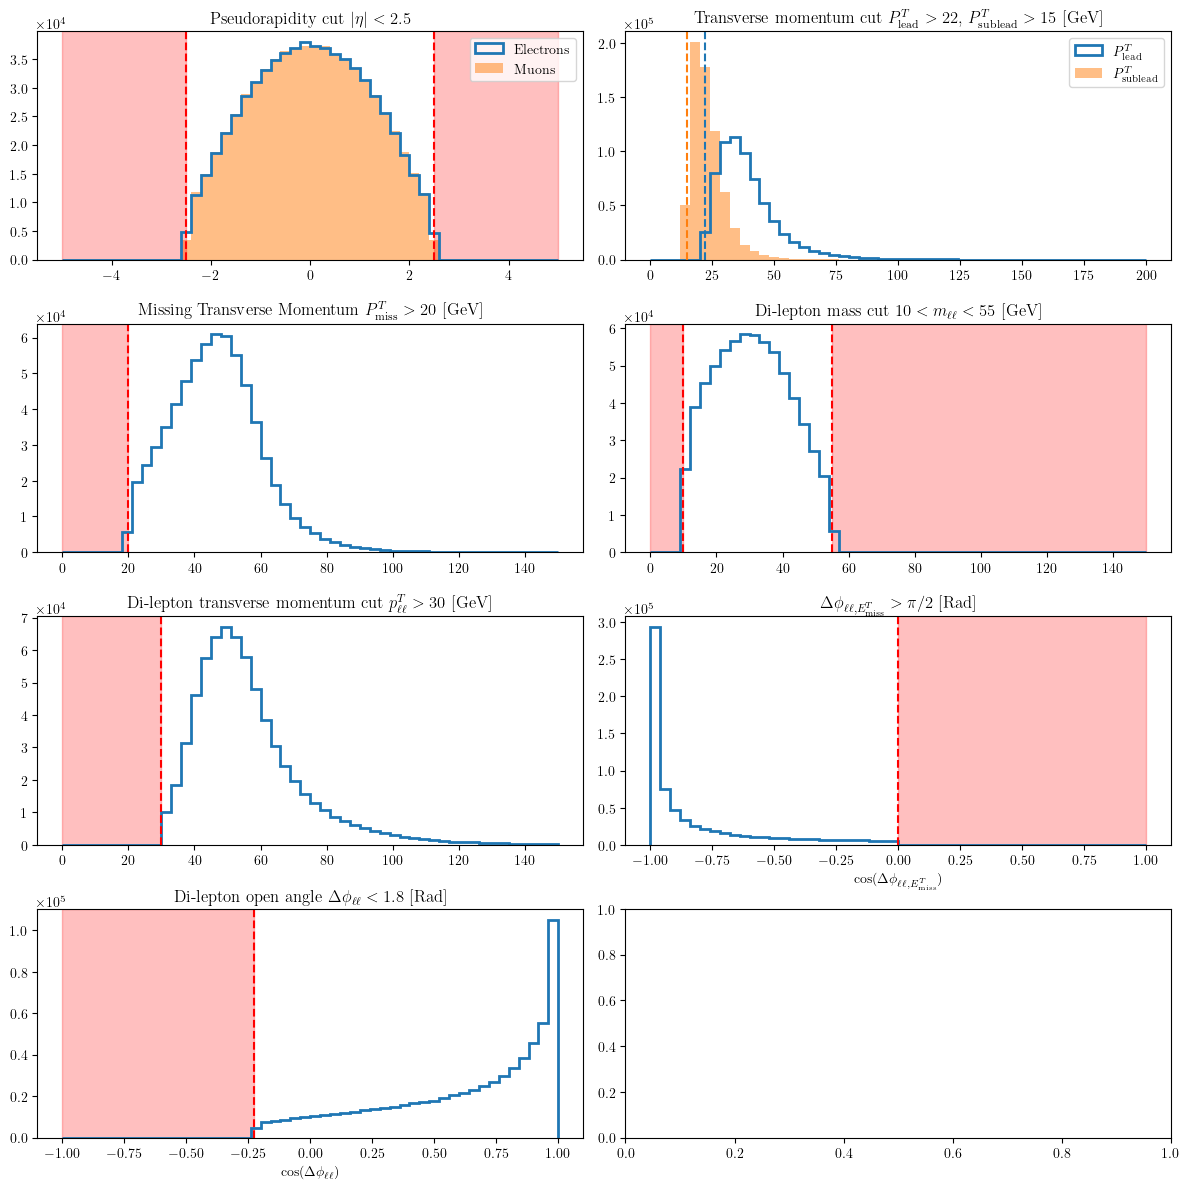

In [108]:
# SELECTION CUTS
positron = np.where(LeptonP_SR['m'] < LeptonM_SR['m'],1,0)
electron = np.where(LeptonM_SR['m'] < LeptonP_SR['m'],1,0)
pos_muon = np.where(LeptonP_SR['m'] < LeptonM_SR['m'],0,1)
neg_muon = np.where(LeptonM_SR['m'] < LeptonP_SR['m'],0,1)
Lepton_e_SR = LeptonP_SR.apply(lambda x : x*positron) + LeptonM_SR.apply(lambda x : x*electron)
Lepton_mu_SR = LeptonP_SR.apply(lambda x : x*pos_muon) + LeptonM_SR.apply(lambda x : x*neg_muon)
fig,ax = plt.subplots(nrows=4,ncols=2,tight_layout=True,figsize=(12,12))
ax = ax.flatten()
ax[0].set_title(r"Pseudorapidity cut $|\eta|<2.5$")
ax[0].hist(Lepton_e_SR[ 'eta'],range=[-5,5],bins=50,histtype='step',lw=2,label='Electrons')
ax[0].hist(Lepton_mu_SR['eta'],range=[-5,5],bins=50,histtype='bar',alpha=0.5,label='Muons')
ax[0].axvline(-2.5,ls='dashed',c='r')
ax[0].axvline(2.5,ls='dashed',c='r')
ax[0].axvspan(xmin=-5,xmax=-2.5,color='r',alpha=0.25)
ax[0].axvspan(xmin=2.5,xmax=5,color='r',alpha=0.25)
ax[0].legend()

ax[1].set_title(r"Transverse momentum cut $P^T_\mathrm{lead} > 22$, $P^T_\mathrm{sublead} > 15$ [GeV]") # Preselection
ax[1].hist(LeadingLep_SR['pt'],bins=50,range=[0,200],histtype='step',lw=2,label=r'$P^T_\mathrm{lead}$')
ax[1].hist(SubleadLep_SR['pt'],bins=50,range=[0,200],histtype='bar',alpha=0.5,label=r'$P^T_\mathrm{sublead}$')
ax[1].axvline(22,c='C0',ls='dashed')
ax[1].axvline(15,c='C1',ls='dashed')
ax[1].legend()

ax[2].set_title(r"Missing Transverse Momentum $P^T_\mathrm{miss} > 20$ [GeV]")
ax[2].hist(MET_SR['pt'],bins=50,range=[0,150],histtype='step',lw=2)
ax[2].axvline(20,c='r',ls='dashed')
ax[2].axvspan(xmin=0,xmax=20,color='r',alpha=0.25)

ax[3].set_title(r"Di-lepton mass cut $10 < m_{\ell\ell} < 55$ [GeV]") #Upper-bound topology, Lower-bound: Preselection
ax[3].hist(diLepton_SR['m'],bins=50,range=[0,150],histtype='step',lw=2,label=r'$m_{\ell\ell}$')
ax[3].axvline(10,c='r',ls='dashed')
ax[3].axvline(55,c='r',ls='dashed')
ax[3].axvspan(xmin=0,xmax=10,color='r',alpha=1.25)
ax[3].axvspan(xmin=55,xmax=150,color='r',alpha=0.25)

ax[4].set_title(r"Di-lepton transverse momentum cut $p^T_{\ell\ell} > 30$ [GeV]") # Background rejection
ax[4].hist(diLepton_SR['pt'],bins=50,range=[0,150],histtype='step',lw=2,label=r'$P^T_{\ell\ell}$') 
ax[4].axvline(30,c='r',ls='dashed')
ax[4].axvspan(xmin=0,xmax=30,color='r',alpha=0.25)

ax[5].set_title(r"$\Delta\phi_{\ell\ell,E^T_\mathrm{miss}} > \pi/2$ [Rad]") # Background rejection
ax[5].hist(( np.cos(MET_SR['phi'] - diLepton_SR['phi']) ),histtype='step',lw=2,bins=50,range=[-1,1])
ax[5].axvline(0,c='r',ls='dashed')
ax[5].set_xlabel(r'$\cos(\Delta\phi_{\ell\ell,E^T_\mathrm{miss}})$')
ax[5].axvspan(xmin=0,xmax=1,color='r',alpha=0.25)

ax[6].set_title(r"Di-lepton open angle $\Delta\phi_{\ell\ell} < 1.8$ [Rad]") # topology
ax[6].hist(( np.cos(LeptonP_SR['phi'] - LeptonM_SR['phi']) ),histtype='step',lw=2,bins=50,range=[-1,1])
ax[6].axvline(np.cos(1.8),c='r',ls='dashed')
ax[6].set_xlabel(r'$\cos(\Delta\phi_{\ell\ell})$')
ax[6].axvspan(xmin=-1,xmax=np.cos(1.8),color='r',alpha=0.25)
plt.show()

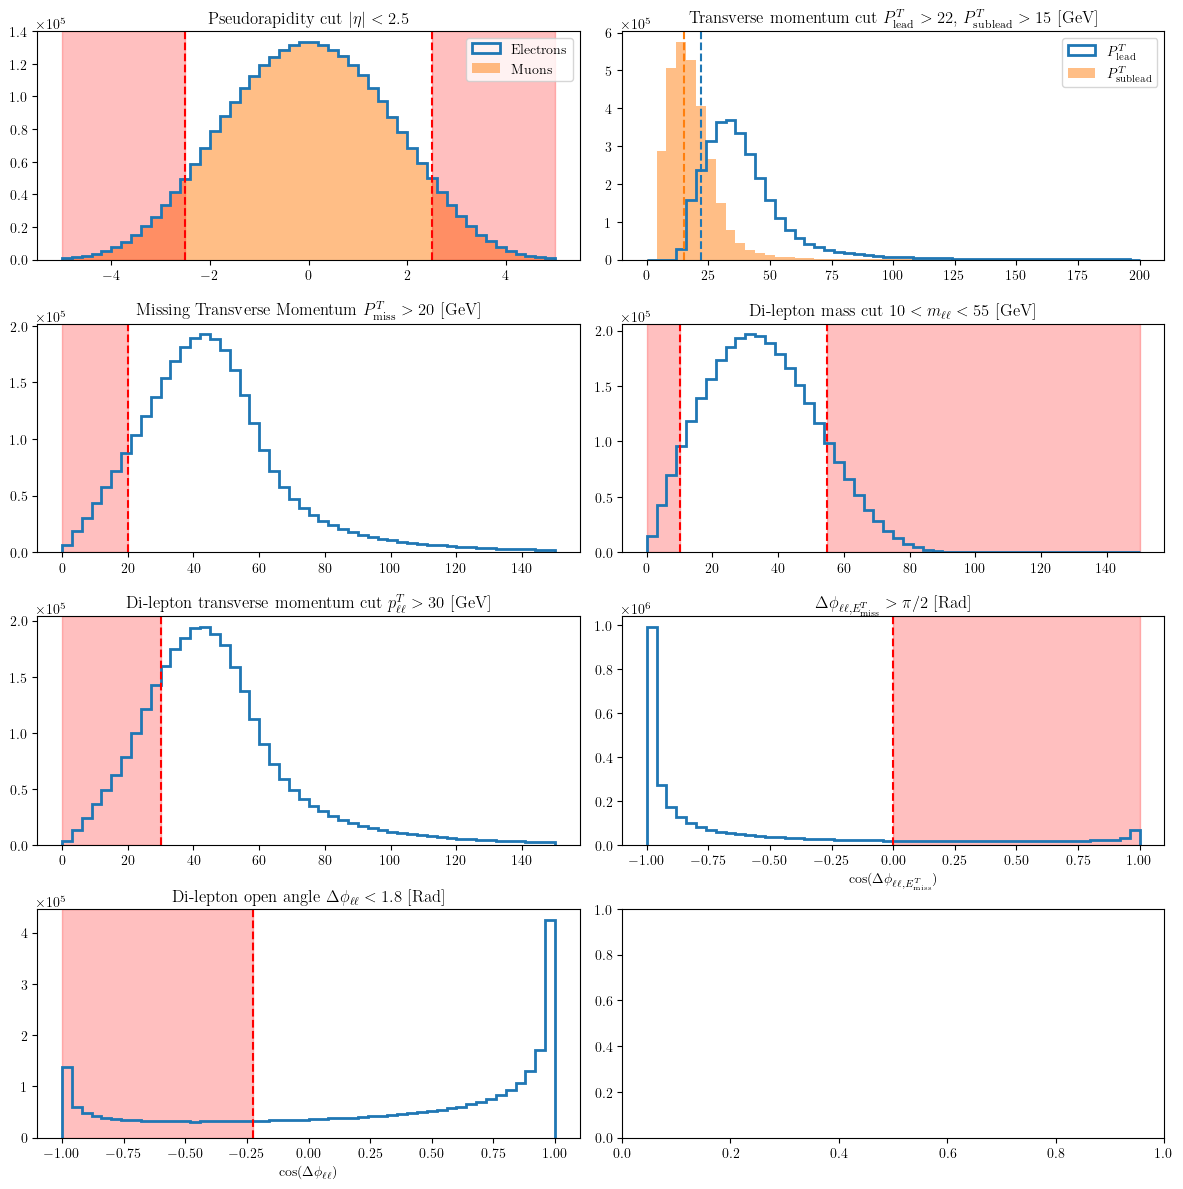

In [69]:
# SELECTION CUTS
positron = np.where(LeptonP['m'] < LeptonM['m'],1,0)
electron = np.where(LeptonM['m'] < LeptonP['m'],1,0)
pos_muon = np.where(LeptonP['m'] < LeptonM['m'],0,1)
neg_muon = np.where(LeptonM['m'] < LeptonP['m'],0,1)
Lepton_e = LeptonP.apply(lambda x : x*positron) + LeptonM.apply(lambda x : x*electron)
Lepton_mu = LeptonP.apply(lambda x : x*pos_muon) + LeptonM.apply(lambda x : x*neg_muon)
fig,ax = plt.subplots(nrows=4,ncols=2,tight_layout=True,figsize=(12,12))
ax = ax.flatten()
ax[0].set_title(r"Pseudorapidity cut $|\eta|<2.5$")
ax[0].hist(Lepton_e[ 'eta'],range=[-5,5],bins=50,histtype='step',lw=2,label='Electrons')
ax[0].hist(Lepton_mu['eta'],range=[-5,5],bins=50,histtype='bar',alpha=0.5,label='Muons')
ax[0].axvline(-2.5,ls='dashed',c='r')
ax[0].axvline(2.5,ls='dashed',c='r')
ax[0].axvspan(xmin=-5,xmax=-2.5,color='r',alpha=0.25)
ax[0].axvspan(xmin=2.5,xmax=5,color='r',alpha=0.25)
ax[0].legend()

ax[1].set_title(r"Transverse momentum cut $P^T_\mathrm{lead} > 22$, $P^T_\mathrm{sublead} > 15$ [GeV]") # Preselection
ax[1].hist(LeadingLep['pt'],bins=50,range=[0,200],histtype='step',lw=2,label=r'$P^T_\mathrm{lead}$')
ax[1].hist(SubleadLep['pt'],bins=50,range=[0,200],histtype='bar',alpha=0.5,label=r'$P^T_\mathrm{sublead}$')
ax[1].axvline(22,c='C0',ls='dashed')
ax[1].axvline(15,c='C1',ls='dashed')
ax[1].legend()

ax[2].set_title(r"Missing Transverse Momentum $P^T_\mathrm{miss} > 20$ [GeV]")
ax[2].hist(MET['pt'],bins=50,range=[0,150],histtype='step',lw=2)
ax[2].axvline(20,c='r',ls='dashed')
ax[2].axvspan(xmin=0,xmax=20,color='r',alpha=0.25)

ax[3].set_title(r"Di-lepton mass cut $10 < m_{\ell\ell} < 55$ [GeV]") #Upper-bound topology, Lower-bound: Preselection
ax[3].hist(diLepton['m'],bins=50,range=[0,150],histtype='step',lw=2,label=r'$m_{\ell\ell}$')
ax[3].axvline(10,c='r',ls='dashed')
ax[3].axvline(55,c='r',ls='dashed')
ax[3].axvspan(xmin=0,xmax=10,color='r',alpha=0.25)
ax[3].axvspan(xmin=55,xmax=150,color='r',alpha=0.25)

ax[4].set_title(r"Di-lepton transverse momentum cut $p^T_{\ell\ell} > 30$ [GeV]") # Background rejection
ax[4].hist(diLepton['pt'],bins=50,range=[0,150],histtype='step',lw=2,label=r'$P^T_{\ell\ell}$') 
ax[4].axvline(30,c='r',ls='dashed')
ax[4].axvspan(xmin=0,xmax=30,color='r',alpha=0.25)

ax[5].set_title(r"$\Delta\phi_{\ell\ell,E^T_\mathrm{miss}} > \pi/2$ [Rad]") # Background rejection
ax[5].hist(( np.cos(MET['phi'] - diLepton['phi']) ),histtype='step',lw=2,bins=50,range=[-1,1])
ax[5].axvline(0,c='r',ls='dashed')
ax[5].set_xlabel(r'$\cos(\Delta\phi_{\ell\ell,E^T_\mathrm{miss}})$')
ax[5].axvspan(xmin=0,xmax=1,color='r',alpha=0.25)

ax[6].set_title(r"Di-lepton open angle $\Delta\phi_{\ell\ell} < 1.8$ [Rad]") # topology
ax[6].hist(( np.cos(LeptonP['phi'] - LeptonM['phi']) ),histtype='step',lw=2,bins=50,range=[-1,1])
ax[6].axvline(np.cos(1.8),c='r',ls='dashed')
ax[6].set_xlabel(r'$\cos(\Delta\phi_{\ell\ell})$')
ax[6].axvspan(xmin=-1,xmax=np.cos(1.8),color='r',alpha=0.25)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


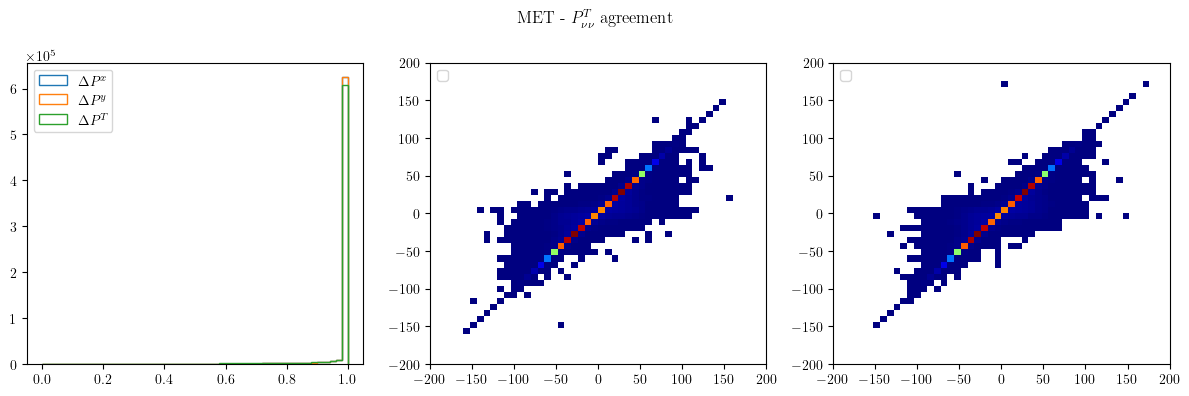

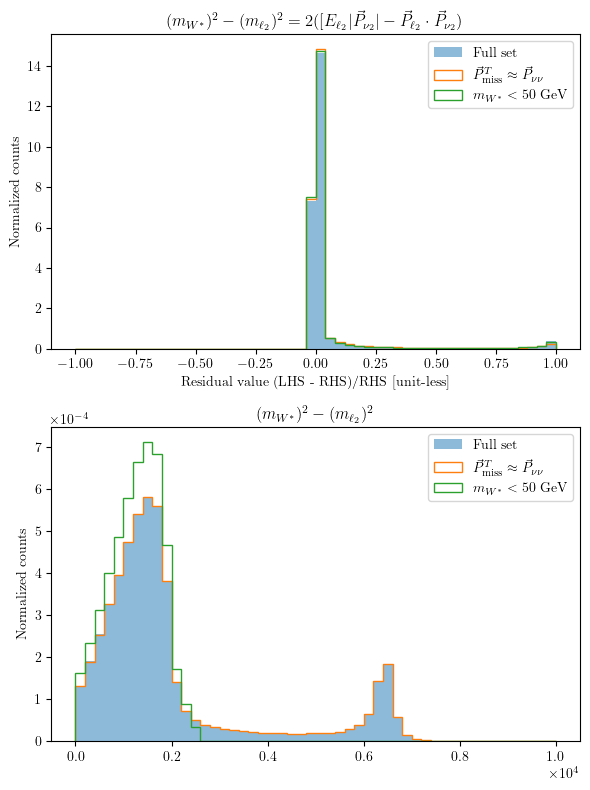

In [113]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
axs = axs.flatten()
#residuals = np.sqrt(np.abs(L4 - 2*(R0 - R1 - R2)))
D_px = (MET_SR['px'] - LeadingNu_SR['px'] - SubleadNu_SR['px'])/(2*np.std(MET_SR['px']))
D_py = (MET_SR['py'] - LeadingNu_SR['py'] - SubleadNu_SR['py'])/(2*np.std(MET_SR['py']))
MET_simeq_NuPT_SR =np.exp(-1*D_px**2)*np.exp(-1*D_py**2) 
axs[0].hist(np.exp(-1*D_px**2),histtype='step',bins=50,range=[0,1],label=r'$\Delta P^x$')
axs[0].hist(np.exp(-1*D_py**2),histtype='step',bins=50,range=[0,1],label=r'$\Delta P^y$')
axs[0].hist(MET_simeq_NuPT_SR,histtype='step',bins=50,range=[0,1],label=r'$\Delta P^T$')

axs[1].hist2d(MET_SR['px'],(LeadingNu_SR['px']+SubleadNu_SR['px']),range=[[-200,200],[-200,200]],bins=(50,50),cmap=my_cmap,vmin=1,label=' ')
axs[2].hist2d(MET_SR['py'],(LeadingNu_SR['py']+SubleadNu_SR['py']),range=[[-200,200],[-200,200]],bins=(50,50),cmap=my_cmap,vmin=1,label=' ')
plt.suptitle(r"MET - $P^T_{\nu\nu}$ agreement")
for i in axs:
    #print( i.legend() )
    i.legend(loc=2) 
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

L4 = SubleadW_SR['m']**2 - SubleadLep_SR['m']**2
R00 = SubleadNu_SR['pt']*np.cosh(SubleadNu_SR['eta']) 
R03 = SubleadNu_SR['pt']*np.sinh(SubleadNu_SR['eta']) 
R0 = R00*SubleadLep_SR['E'] - R03*SubleadLep_SR['pz']
R1 = SubleadLep_SR['px']*SubleadNu_SR['px']
R2 = SubleadLep_SR['py']*SubleadNu_SR['py']
residuals = (L4 - 2*R0 + 2*R1 + 2*R2)/(L4)
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(6,8),tight_layout=True)
axs = axs.flatten()
axs[0].hist(residuals,bins=50,range=[-1,1],histtype='bar',alpha=0.5,density=True,label='Full set')
axs[0].set_title(r"$({m_{W^*}})^2 - (m_{\ell_2})^2  = 2([E_{\ell_2}|\vec{P}_{\nu_2}| -\vec{P}_{\ell_2}\cdot\vec{P}_{\nu_2})$")
axs[0].set_xlabel(r"Residual value (LHS - RHS)/RHS [unit-less]")
# exclude events with poor MET-PT agreement i.e. MET_Px/y deviates greatly from Px/y νν 
a = np.where(MET_simeq_NuPT_SR>0.81, True, False)
axs[0].hist(residuals[a],bins=50,range=[-1,1],histtype='step',lw=1,density=True,label=r'$\vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
# exclued events with off-shell W boson mass > 50 GeV
b = np.where(SubleadW_SR['m']<50, True, False)
axs[0].hist(residuals[b],bins=50,range=[-1,1],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV')
# exclude all
#axs[0].hist(residuals[a&b],bins=50,range=[-12,12],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV $\cap \vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
# plot LHS
axs[1].set_title("$({m_{W^*}})^2 - ({m_{\ell_2}})^2$")
axs[1].hist(L4,bins=50,range=[0,10000],histtype='bar',alpha=0.5,density=True,label='Full set')
axs[1].hist(L4[a],bins=50,range=[0,10000],histtype='step',lw=1,density=True,label=r'$\vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
axs[1].hist(L4[b],bins=50,range=[0,10000],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV')
#axs[1].hist(L4[a&b],bins=50,range=[0,10000],histtype='step',lw=2,density=True,label=r'$m_{W^*} < 50$ GeV $\cap \vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')

for i in axs:
    i.set_ylabel("Normalized counts")
    i.legend()
    i.ticklabel_format(axis="y",style="sci",scilimits=(-3,3),useMathText=True)
plt.show()

Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi'], dtype='object')
Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi'], dtype='object')
Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi'], dtype='object')
Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi'], dtype='object')
Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi'], dtype='object')
Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi'], dtype='object')


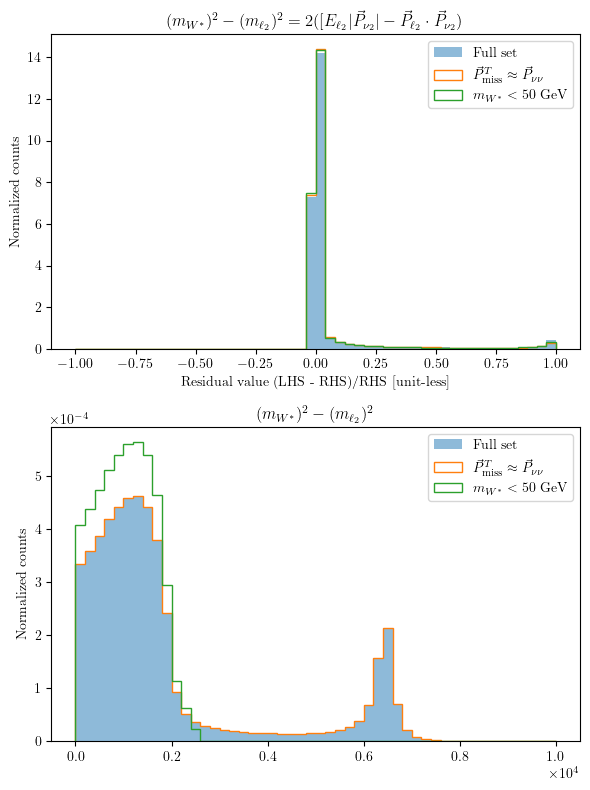

In [29]:
print(  LeadingW.columns)
print(  SubleadW.columns)
print(LeadingLep.columns)
print(SubleadLep.columns)
print( LeadingNu.columns)
print( SubleadNu.columns)

L4 = SubleadW['m']**2 - SubleadLep['m']**2
R00 = SubleadNu['pt']*np.cosh(SubleadNu['eta']) 
R03 = SubleadNu['pt']*np.sinh(SubleadNu['eta']) 
R0 = R00*SubleadLep['E'] - R03*SubleadLep['pz']
R1 = SubleadLep['px']*SubleadNu['px']
R2 = SubleadLep['py']*SubleadNu['py']
residuals = (L4 - 2*R0 + 2*R1 + 2*R2)/(L4)
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(6,8),tight_layout=True)
axs = axs.flatten()
axs[0].hist(residuals,bins=50,range=[-1,1],histtype='bar',alpha=0.5,density=True,label='Full set')
axs[0].set_title(r"$({m_{W^*}})^2 - (m_{\ell_2})^2  = 2([E_{\ell_2}|\vec{P}_{\nu_2}| -\vec{P}_{\ell_2}\cdot\vec{P}_{\nu_2})$")
axs[0].set_xlabel(r"Residual value (LHS - RHS)/RHS [unit-less]")
# exclude events with poor MET-PT agreement i.e. MET_Px/y deviates greatly from Px/y νν 
a = np.where(MET_simeq_NuPT>0.81, True, False)
axs[0].hist(residuals[a],bins=50,range=[-1,1],histtype='step',lw=1,density=True,label=r'$\vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
# exclued events with off-shell W boson mass > 50 GeV
b = np.where(SubleadW['m']<50, True, False)
axs[0].hist(residuals[b],bins=50,range=[-1,1],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV')
# exclude all
#axs[0].hist(residuals[a&b],bins=50,range=[-12,12],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV $\cap \vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
# plot LHS
axs[1].set_title("$({m_{W^*}})^2 - ({m_{\ell_2}})^2$")
axs[1].hist(L4,bins=50,range=[0,10000],histtype='bar',alpha=0.5,density=True,label='Full set')
axs[1].hist(L4[a],bins=50,range=[0,10000],histtype='step',lw=1,density=True,label=r'$\vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
axs[1].hist(L4[b],bins=50,range=[0,10000],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV')
#axs[1].hist(L4[a&b],bins=50,range=[0,10000],histtype='step',lw=2,density=True,label=r'$m_{W^*} < 50$ GeV $\cap \vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')

for i in axs:
    i.set_ylabel("Normalized counts")
    i.legend()
    i.ticklabel_format(axis="y",style="sci",scilimits=(-3,3),useMathText=True)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


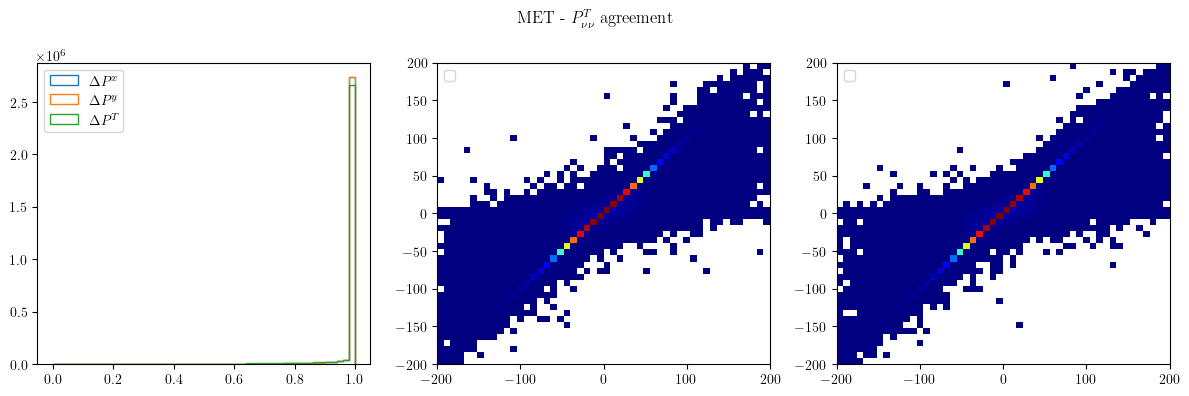

In [14]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
axs = axs.flatten()
#residuals = np.sqrt(np.abs(L4 - 2*(R0 - R1 - R2)))
D_px = (MET['px'] - LeadingNu['px'] - SubleadNu['px'])/(2*np.std(MET['px']))
D_py = (MET['py'] - LeadingNu['py'] - SubleadNu['py'])/(2*np.std(MET['py']))
MET_simeq_NuPT =np.exp(-1*D_px**2)*np.exp(-1*D_py**2) 
axs[0].hist(np.exp(-1*D_px**2),histtype='step',bins=50,range=[0,1],label=r'$\Delta P^x$')
axs[0].hist(np.exp(-1*D_py**2),histtype='step',bins=50,range=[0,1],label=r'$\Delta P^y$')
axs[0].hist(MET_simeq_NuPT,histtype='step',bins=50,range=[0,1],label=r'$\Delta P^T$')

axs[1].hist2d(MET['px'],(LeadingNu['px']+SubleadNu['px']),range=[[-200,200],[-200,200]],bins=(50,50),cmap=my_cmap,vmin=1,label=' ')
axs[2].hist2d(MET['py'],(LeadingNu['py']+SubleadNu['py']),range=[[-200,200],[-200,200]],bins=(50,50),cmap=my_cmap,vmin=1,label=' ')
plt.suptitle(r"MET - $P^T_{\nu\nu}$ agreement")
for i in axs:
    #print( i.legend() )
    i.legend(loc=2) 
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

In [7]:
#'''
M22 = (WBoson2[4]**2 - Lepton2[4]**2)/2
PT22_coef =  Lepton2[0]*np.cosh(Nu2_eta) - Lepton2[3]*np.sinh(Nu2_eta)
X22_coef  =  Lepton2[1]*-1
Y22_coef  =  Lepton2[2]*-1
M12 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*PT_miss[1] + 2*Lepton1[2]*PT_miss[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2
#M12 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*diNu[1] + 2*Lepton1[2]*diNu[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2
PT12_coef = (Lepton1[3]+diNu[3])*np.sinh(Nu2_eta) - (Lepton1[0]+diNu[0])*np.cosh(Nu2_eta)
X12_coef  = (Lepton1[1]+PT_miss[1])
#X12_coef  = (Lepton1[1]+diNu[1])
Y12_coef  = (Lepton1[2]+PT_miss[2])
#Y12_coef  = (Lepton1[2]+diNu[2])
M21 = (WBoson2[4]**2 - Lepton2[4]**2)/2 + Lepton2[1]*PT_miss[1] + Lepton2[2]*PT_miss[2]
#M21 = (WBoson2[4]**2 - Lepton2[4]**2)/2 + Lepton2[1]*diNu[1] + Lepton2[2]*diNu[2]
PT21_coef =  Lepton2[0]*np.cosh(Nu2_eta) - Lepton2[3]*np.sinh(Nu2_eta)
X21_coef  =  Lepton2[1]
Y21_coef  =  Lepton2[2]
M11 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*PT_miss[1] + 2*Lepton1[2]*PT_miss[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2 -(Lepton1[1]+PT_miss[1])*PT_miss[1]-(Lepton1[2]+PT_miss[2])*PT_miss[2]
#M11 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*diNu[1] + 2*Lepton1[2]*diNu[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2 -(Lepton1[1]+diNu[1])*diNu[1]-(Lepton1[2]+diNu[2])*diNu[2]
PT11_coef = (Lepton1[3]+diNu[3])*np.sinh(Nu2_eta) - (Lepton1[0]+diNu[0])*np.cosh(Nu2_eta)
X11_coef  = (Lepton1[1]+PT_miss[1])*-1
#X11_coef  = (Lepton1[1]+diNu[1])*-1
Y11_coef  = (Lepton1[2]+PT_miss[2])*-1
#Y11_coef  = (Lepton1[2]+diNu[2])*-1
r = 0
slope_2  = -1*(PT12_coef*X22_coef - PT22_coef*X12_coef)/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
offset_2 =    (PT12_coef*M22      - PT22_coef*M12     )/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
slope_1  = -1*(PT11_coef*X21_coef - PT21_coef*X11_coef)/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)
offset_1 =    (PT11_coef*M21      - PT21_coef*M11     )/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)
offset_2_a =    (PT12_coef*(M22+(r*WBoson2[4])*(r*WBoson2[4])*0.5)      - PT22_coef*M12     )/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
offset_1_a =    (PT11_coef*(M21+(r*WBoson2[4])*(r*WBoson2[4])*0.5)      - PT21_coef*M11     )/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)

def Nu_py_line(x,slope,offset):
    return (slope*x + offset)
def Nu_px_line(y,slope,offset):
    return (y - offset)/(slope)



Event : 1175404


Event : 2542253


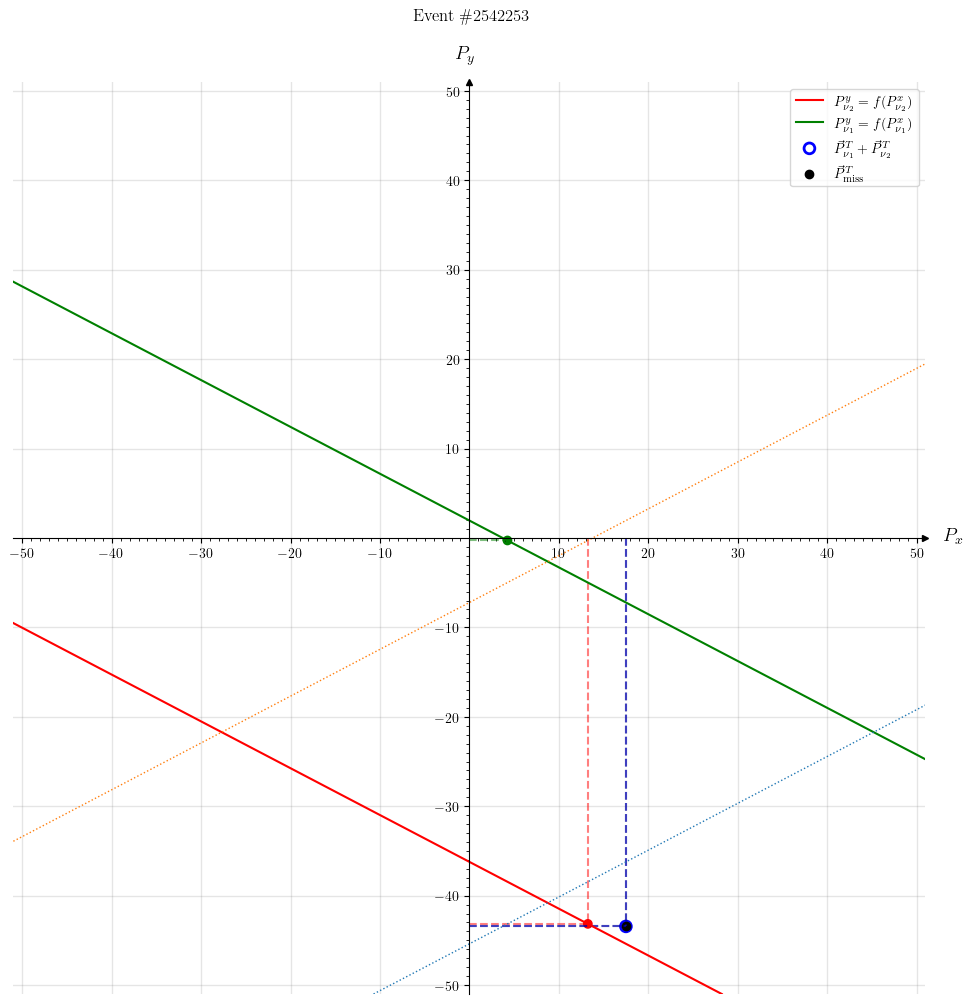

In [33]:
evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
#evt_id = 2022166
print('Event :',evt_id)
m_Higgs = 125.35 # GeV
four_momentum = ['E','px','py','pz','m']
diLep = diLepton.loc[evt_id,four_momentum].to_numpy()
diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                  diNeutrino['px'].iat[evt_id],\
                  diNeutrino['py'].iat[evt_id],\
                  diNeutrino['pz'].iat[evt_id],\
          np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
PT_miss = MET.loc[evt_id,['pt','px','py']]
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
diNu_mass = diNeutrino['eta'].iat[evt_id]
if LeptonP.loc[evt_id,'pt'] > LeptonM.loc[evt_id,'pt']:
    WBoson1   =   WBosonP.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonM.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonP.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonM.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoP.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoM.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoM.loc[evt_id,'eta']
else:
    WBoson1   =   WBosonM.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonP.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonM.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonP.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoM.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoP.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoP.loc[evt_id,'eta']
    
#'''
M22 = (WBoson2[4]**2 - Lepton2[4]**2)/2
PT22_coef =  Lepton2[0]*np.cosh(Nu2_eta) - Lepton2[3]*np.sinh(Nu2_eta)
X22_coef  =  Lepton2[1]*-1
Y22_coef  =  Lepton2[2]*-1
M12 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*PT_miss[1] + 2*Lepton1[2]*PT_miss[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2
#M12 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*diNu[1] + 2*Lepton1[2]*diNu[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2
PT12_coef = (Lepton1[3]+diNu[3])*np.sinh(Nu2_eta) - (Lepton1[0]+diNu[0])*np.cosh(Nu2_eta)
X12_coef  = (Lepton1[1]+PT_miss[1])
#X12_coef  = (Lepton1[1]+diNu[1])
Y12_coef  = (Lepton1[2]+PT_miss[2])
#Y12_coef  = (Lepton1[2]+diNu[2])
M21 = (WBoson2[4]**2 - Lepton2[4]**2)/2 + Lepton2[1]*PT_miss[1] + Lepton2[2]*PT_miss[2]
#M21 = (WBoson2[4]**2 - Lepton2[4]**2)/2 + Lepton2[1]*diNu[1] + Lepton2[2]*diNu[2]
PT21_coef =  Lepton2[0]*np.cosh(Nu2_eta) - Lepton2[3]*np.sinh(Nu2_eta)
X21_coef  =  Lepton2[1]
Y21_coef  =  Lepton2[2]
M11 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*PT_miss[1] + 2*Lepton1[2]*PT_miss[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2 -(Lepton1[1]+PT_miss[1])*PT_miss[1]-(Lepton1[2]+PT_miss[2])*PT_miss[2]
#M11 = (WBoson1[4]**2 - Lepton1[4]**2 - diNu[4]**2 + 2*Lepton1[1]*diNu[1] + 2*Lepton1[2]*diNu[2] + 2*Lepton1[3]*diNu[3]- 2*Lepton1[0]*diNu[0])/2 -(Lepton1[1]+diNu[1])*diNu[1]-(Lepton1[2]+diNu[2])*diNu[2]
PT11_coef = (Lepton1[3]+diNu[3])*np.sinh(Nu2_eta) - (Lepton1[0]+diNu[0])*np.cosh(Nu2_eta)
X11_coef  = (Lepton1[1]+PT_miss[1])*-1
#X11_coef  = (Lepton1[1]+diNu[1])*-1
Y11_coef  = (Lepton1[2]+PT_miss[2])*-1
#Y11_coef  = (Lepton1[2]+diNu[2])*-1
r = 0
slope_2  = -1*(PT12_coef*X22_coef - PT22_coef*X12_coef)/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
offset_2 =    (PT12_coef*M22      - PT22_coef*M12     )/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
slope_1  = -1*(PT11_coef*X21_coef - PT21_coef*X11_coef)/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)
offset_1 =    (PT11_coef*M21      - PT21_coef*M11     )/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)
offset_2_a =    (PT12_coef*(M22+(r*WBoson2[4])*(r*WBoson2[4])*0.5)      - PT22_coef*M12     )/(PT12_coef*Y22_coef - PT22_coef*Y12_coef)
offset_1_a =    (PT11_coef*(M21+(r*WBoson2[4])*(r*WBoson2[4])*0.5)      - PT21_coef*M11     )/(PT11_coef*Y21_coef - PT21_coef*Y11_coef)

def Nu_py_line(x,slope,offset):
    return (slope*x + offset)
def Nu_px_line(y,slope,offset):
    return (y - offset)/(slope)

# Enter x and y coordinates of points and colors
xs = [PT_miss[1], Neutrino1[1], Neutrino2[1],Neutrino1[1]+Neutrino2[1]]
ys = [PT_miss[2], Neutrino1[2], Neutrino2[2],Neutrino1[2]+Neutrino2[2]]
colors = ['k', 'r', 'g','b']
a = np.max(np.abs(xs))
b = np.max(np.abs(ys))
a = max(a,b)
# Select length of axes and the space between tick labels
if a <= 40:
    xmin,xmax,ymin,ymax = -50,50,-50,50
else:
    xmin, xmax, ymin, ymax = -10*(a//10+1), 10*(a//10+1), -10*(a//10+1), 10*(a//10+1)
ticks_frequency = 10

# Plot points
#gridspec_kw={'height_ratios': [3, 1]}
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10),tight_layout=True)
plt.suptitle('Event \#{}'.format(evt_id),y=1)
ax.scatter(xs[1:-1], ys[1:-1], c=colors[1:-1])
ax.scatter(xs[-1], ys[-1], facecolors='None', edgecolor=colors[-1],s=60,lw=2, label=r'$\vec{P}^T_{\nu_1} + \vec{P}^T_{\nu_2}$')
ax.scatter(xs[0], ys[0], c=colors[0],label=r'$\vec{P}^T_\mathrm{miss}$')
# Draw lines connecting points to axes
for x, y, c in zip(xs, ys, colors):
    #ax.axvline(x, c=c, ls='--', lw=1.5, alpha=0.5)
    ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
    ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)
ax.axline((0,offset_1),slope=slope_1,c='r',label=r"$P^y_{\nu_2} = f(P^x_{\nu_2})$")
ax.axline((0,offset_2),slope=slope_2,c='g',label=r"$P^y_{\nu_1} = f(P^x_{\nu_1})$")
ax.axline((0,ys[0]-offset_2),slope=-1*slope_2,c='C0',ls='dotted',lw=1) # satisfies y at any x
ax.axline((xs[0]-(-1*offset_2/slope_2),0),slope=-1*slope_2,c='C1',ls='dotted',lw=1) # satisfies x at any y

#ax.scatter(x_est,y_est,c='r',marker='D')
# Set identical scales for both ax[0]es
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y ax[0]es of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the ax[0]es
ax.set_xlabel(r'$P_x$', size=14, labelpad=-24, x=1.03)
ax.set_ylabel(r'$P_y$', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='major', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


'''
x_est = param_x[opt_x] # estimate for x1
y_est = x_est*slope_1 + offset_1
x_prime = PT_miss[1]-x_est # estimate for x2
y_prime = slope_2*x_prime + offset_2 # estimate for y2

#x_prime = PT_miss[2]-x_est#estimate for x2

#ax.plot([x_est,x_est],[y_est,y_prime],lw=1,ls='dashdot',color='C1')
ax.scatter(x_est,y_est,c='r',marker='D')
ax.scatter(x_prime,y_prime,c='g',marker='D')
ax.scatter(x_est,y_prime,c='C1',marker='D')
ax.scatter(x_prime,y_est,c='C0',marker='D')
ax.plot([x_prime,x_est],[y_est,y_est],lw=1,ls='dashdot',color='C0')
ax.plot([x_prime,x_prime],[y_est,y_prime],lw=1,ls='dashdot',color='C0')
ax.plot([x_est,x_prime],[y_prime,y_prime],lw=1,ls='dashdot',color='C1')
ax.plot([x_est,x_est],[y_est,y_prime],lw=1,ls='dashdot',color='C1')
#ax.plot([0,x_est],[0,y_est],lw=1,ls='dotted',color='C4')
#ax[0].plot([x_est,x_prime],[y_prime,y_est],lw=1,ls='dashdot',color='C4')
'''
ax.legend()
plt.savefig("../1211 plots/Event_{}_nu_x-y.png".format(evt_id))
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


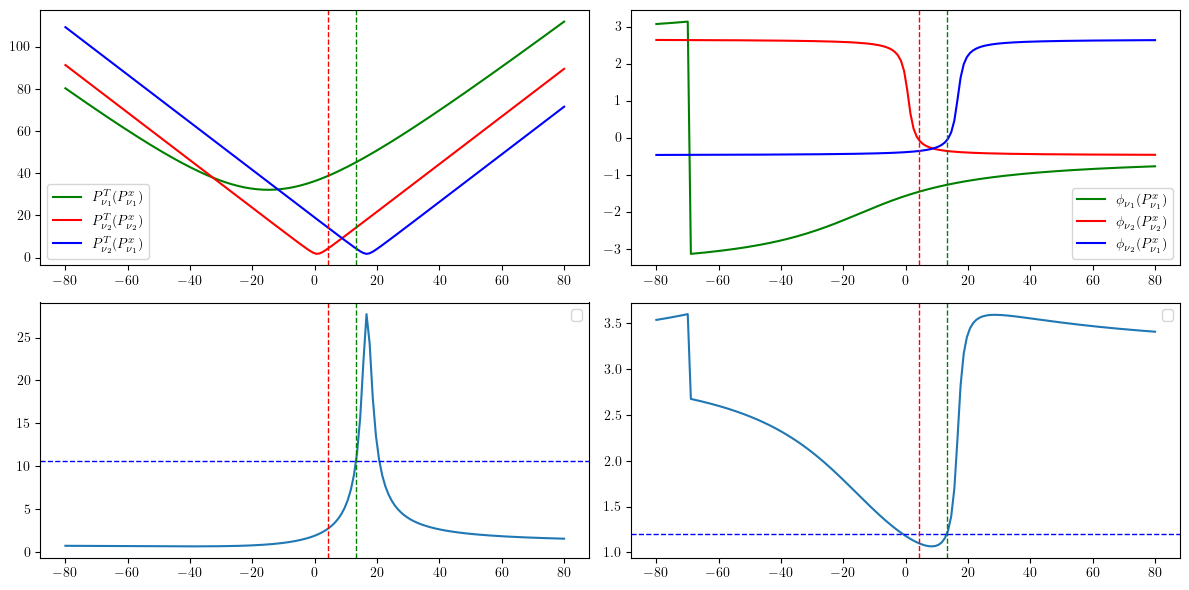

In [52]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,6),tight_layout=True )
px_axis = np.linspace(-80,80,160)
line_1 = slope_1*px_axis + offset_1
line_2 = slope_2*px_axis + offset_2
PT_1 = np.sqrt( px_axis**2 + line_1**2 )
PT_2 = np.sqrt( px_axis**2 + line_2**2 )
PT_2of1 = np.sqrt( (PT_miss[1] - px_axis)**2 + (PT_miss[2] - line_1)**2 )
phi_1 = np.arctan2(line_1,px_axis)
phi_2 = np.arctan2(line_2,px_axis)
phi_2of1 = np.arctan2((PT_miss[2] - line_1),(PT_miss[1] - px_axis))
phi_1_true = np.arctan2(Neutrino1[2],Neutrino1[1])
phi_2_true = np.arctan2(Neutrino2[2],Neutrino2[1])
ax[0,0].plot(px_axis,PT_1,c='g',label=r'$P^T_{\nu_1}(P^x_{\nu_1})$')
ax[0,0].plot(px_axis,PT_2,c='r',label=r'$P^T_{\nu_2}(P^x_{\nu_2})$')
ax[0,0].plot(px_axis,PT_2of1,c='b',label = r'$P^T_{\nu_2}(P^x_{\nu_1})$')
ax[0,0].axvline(Neutrino1[1],c='g',lw=1,ls='dashed')
ax[0,0].axvline(Neutrino2[1],c='r',lw=1,ls='dashed')
ax[1,0].plot(px_axis,PT_1/PT_2of1)
PT_ratio = mv.vec_mag(Neutrino1[1],Neutrino1[2],0)/mv.vec_mag(Neutrino2[1],Neutrino2[2],0)
ax[1,0].axhline(PT_ratio,c='b',lw=1,ls='dashed')
ax[1,0].axvline(Neutrino1[1],c='g',lw=1,ls='dashed')
ax[1,0].axvline(Neutrino2[1],c='r',lw=1,ls='dashed')
ax[0,1].plot(px_axis,phi_1,c='g',label=r'$\phi_{\nu_1}(P^x_{\nu_1})$')
ax[0,1].plot(px_axis,phi_2,c='r',label=r'$\phi_{\nu_2}(P^x_{\nu_2})$')
ax[0,1].plot(px_axis,phi_2of1,c='b',label=r'$\phi_{\nu_2}(P^x_{\nu_1})$')
ax[0,1].axvline(Neutrino1[1],c='g',lw=1,ls='dashed')
ax[0,1].axvline(Neutrino2[1],c='r',lw=1,ls='dashed')
ax[1,1].plot(px_axis,np.abs(phi_1 - phi_2of1))
ax[1,1].axhline(np.abs(phi_1_true - phi_2_true),c='b',lw=1,ls='dashed')
ax[1,1].axvline(Neutrino1[1],c='g',lw=1,ls='dashed')
ax[1,1].axvline(Neutrino2[1],c='r',lw=1,ls='dashed')
for i in ax.flatten():
    i.legend()
plt.show()
#ax.axline((0,offset_1),slope=slope_1,c='r',label=r"$P^y_{\nu_2} = f(P^x_{\nu_2})$")
#ax.axline((0,offset_2),slope=slope_2,c='g',label=r"$P^y_{\nu_1} = f(P^x_{\nu_1})$")

Event : 732924


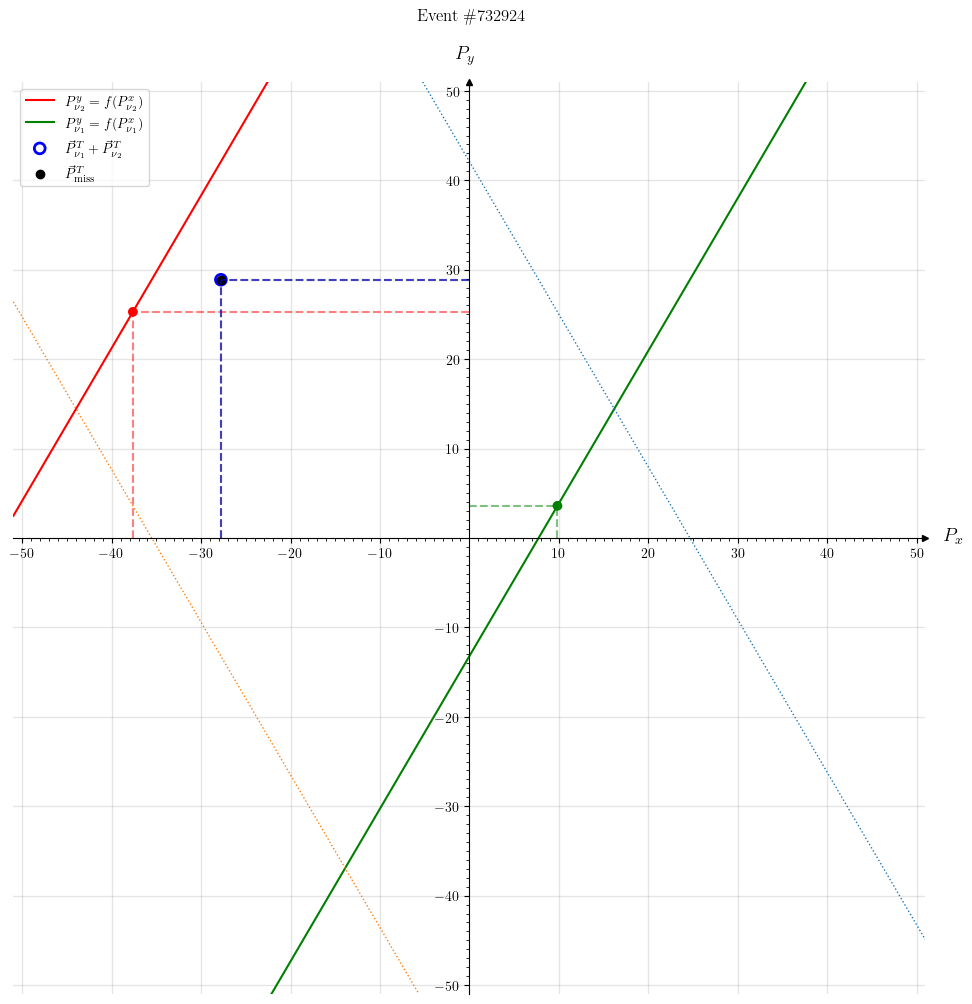

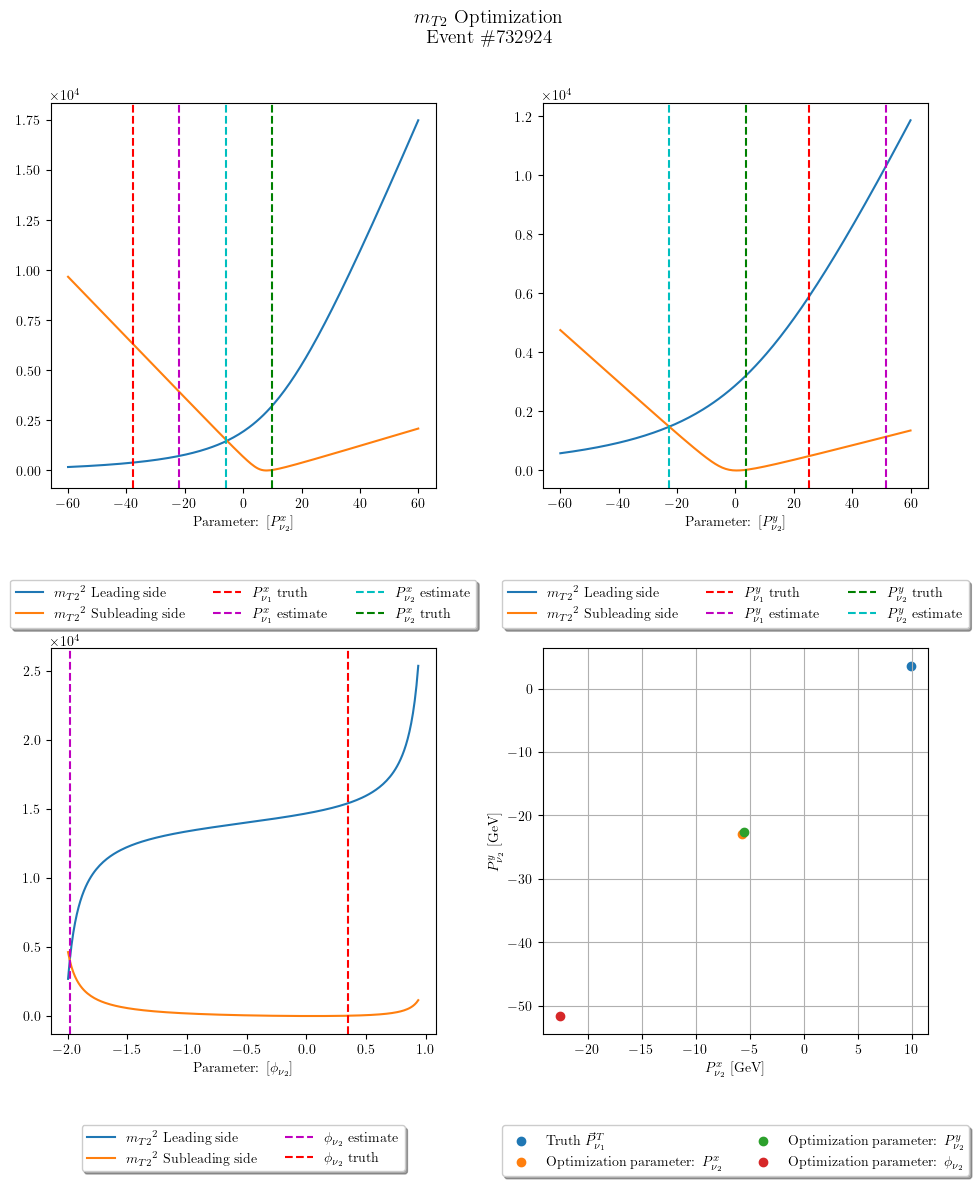

In [41]:
# MT2 minimization scheme
def MT2(m_vis,x_vis,y_vis,m_invis,x_invis,y_invis,slope,offset):
    # parameter -> x_invis: [-50,50] 
    y_invis = slope*x_invis + offset if y_invis == None else y_invis
    x_invis = (y_invis - offset)/slope if x_invis == None else x_invis
    pT_vis     = np.sqrt(  x_vis*x_vis   +    y_vis*y_vis   )
    pT_invis   = np.sqrt(x_invis*x_invis +  y_invis*y_invis )
    mT_vis     = np.sqrt(  m_vis*m_vis   +   pT_vis*pT_vis  )
    mT_invis   = np.sqrt(m_invis*m_invis + pT_invis*pT_invis)
    PT_dot = x_vis*x_invis + y_vis*y_invis
    return m_vis*m_vis + m_invis*m_invis+2*(mT_vis*mT_invis - PT_dot)
MT2 = np.vectorize(MT2)
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,12),tight_layout=True)
param_x = np.linspace(-60,60,200)
#y1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,param_x,None,slope_1,offset_1)
#y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,PT_miss[1]-param_x,None,slope_2,offset_2)
y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,param_x,None,slope_2,offset_2)
y1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,PT_miss[1]-param_x,None,slope_1,offset_1)
y_max = np.where(y1>y2,y1,y2)
opt_x = np.argmin(y_max)
ax[0,0].set_box_aspect(1)
ax[0,0].plot(param_x,y1,label=r'${m_{T2}}^2$ Leading side')
ax[0,0].plot(param_x,y2,label=r'${m_{T2}}^2$ Subleading side')
ax[0,0].axvline(Neutrino1[1],ls='dashed',c='r',label=r'$P^x_{\nu_1}$ truth')
#ax[0,0].axvline(param_x[opt_x],ls='dashed',c='m',label=r'$P^x_{\nu_1}$ estimate')
ax[0,0].axvline(PT_miss[1] - param_x[opt_x],ls='dashed',c='m',label=r'$P^x_{\nu_1}$ estimate')
#ax[0,0].axvline(PT_miss[1] - param_x[opt_x],ls='dashed',c='c',label=r'$P^x_{\nu_2}$ estimate')
ax[0,0].axvline(param_x[opt_x],ls='dashed',c='c',label=r'$P^x_{\nu_2}$ estimate')
ax[0,0].axvline(Neutrino2[1],ls='dashed',c='g',label=r'$P^x_{\nu_2}$ truth')
ax[0,0].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
#ax[0,0].set_xlabel(r"Parameter: [$P^x_{\nu_1}$]")
ax[0,0].set_xlabel(r"Parameter: [$P^x_{\nu_2}$]")
param_y = np.linspace(-60,60,200)
#x1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,None,param_y,slope_1,offset_1)
#x2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,None,PT_miss[2]-param_y,slope_2,offset_2)
x2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,None,param_y,slope_2,offset_2)
x1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,None,PT_miss[2]-param_y,slope_1,offset_1)
x_max = np.where(x1>x2,x1,x2)
opt_y = np.argmin(x_max)
ax[0,1].set_box_aspect(1)
ax[0,1].plot(param_y,x1,label=r'${m_{T2}}^2$ Leading side')
ax[0,1].plot(param_y,x2,label=r'${m_{T2}}^2$ Subleading side')
ax[0,1].axvline(Neutrino1[2],ls='dashed',c='r',label=r'$P^y_{\nu_1}$ truth')
#ax[0,1].axvline(param_y[opt_y],ls='dashed',c='m',label=r'$P^y_{\nu_1}$ estimate')
ax[0,1].axvline(PT_miss[2] - param_y[opt_y],ls='dashed',c='m',label=r'$P^y_{\nu_1}$ estimate')
ax[0,1].axvline(Neutrino2[2],ls='dashed',c='g',label=r'$P^y_{\nu_2}$ truth')
#ax[0,1].axvline(PT_miss[2] - param_y[opt_y],ls='dashed',c='c',label=r'$P^y_{\nu_2}$ estimate')
ax[0,1].axvline(param_y[opt_y],ls='dashed',c='c',label=r'$P^y_{\nu_2}$ estimate')
ax[0,1].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
#ax[0,1].set_xlabel(r"Parameter: [$P^y_{\nu_1}$]")
ax[0,1].set_xlabel(r"Parameter: [$P^y_{\nu_2}$]")
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=3)#x.legend(loc2='best')()
ax[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=3)#x.legend(loc='best')()
plt.suptitle(r'$m_{T2}$ Optimization'+"\nEvent \#{}".format(evt_id),fontsize=14)
#Y1_from_X1 = Nu_py_line(param_x[opt_x],slope_1,offset_1)
#X1_from_Y1 = Nu_px_line(param_y[opt_y],slope_1,offset_1)
Y2_from_X2 = Nu_py_line(param_x[opt_x],slope_2,offset_2)
X2_from_Y2 = Nu_px_line(param_y[opt_y],slope_2,offset_2)
'''
print("X1 as parameter")
print("Truth         X1 = {:.4f}".format(Neutrino1[1]))
print("Estimated     X1 = {:.4f}".format(param_x[opt_x]))
print("Relative error   = {:.4f}".format(np.abs( (Neutrino1[1] - param_x[opt_x])/Neutrino1[1] ) ) )
print("Truth         Y1 = {:.4f}".format(Neutrino1[2]))
print("Corresponding Y1 = {:.4f}".format(Y1_from_X1))
print("Relative error   = {:.4f}".format(np.abs((Neutrino1[2]-Y1_from_X1)/Neutrino1[2] ) ) )

print("Y1 as parameter")
print("Truth         Y1 = {:.4f}".format(Neutrino1[2]))
print("Estimated     Y1 = {:.4f}".format(param_y[opt_y]))
print("Relative error   = {:.4f}".format(np.abs((Neutrino1[2] - param_y[opt_y])/Neutrino1[2]) ) )
print("Truth         X1 = {:.4f}".format(Neutrino1[1]))
print("Corresponding X1 = {:.4f}".format(X1_from_Y1))
print("Relative error   = {:.4f}".format(np.abs((Neutrino1[1]-X1_from_Y1)/Neutrino1[1]) ) )
'''
ax[1,1].set_box_aspect(1)
#ax[1,1].scatter(Neutrino1[1],Neutrino1[2],label=r'Truth $\vec{P}^T_{\nu_1}$')
ax[1,1].scatter(Neutrino2[1],Neutrino2[2],label=r'Truth $\vec{P}^T_{\nu_1}$')
#ax[1,1].scatter(param_x[opt_x],Y1_from_X1,label=r'Optimization parameter: $P^x_{\nu_1}$')
#ax[1,1].scatter(X1_from_Y1,param_y[opt_y],label=r'Optimization parameter: $P^y_{\nu_1}$')
ax[1,1].scatter(param_x[opt_x],Y2_from_X2,label=r'Optimization parameter: $P^x_{\nu_2}$')
ax[1,1].scatter(X2_from_Y2,param_y[opt_y],label=r'Optimization parameter: $P^y_{\nu_2}$')
'''
simultaneous minimization:
    using phi as parameter
consider a point that runs along linear function y = ax + b
the polar angle on the x-y plane has the relation of tan(phi) = a + b/x
the limit of the angle occurs when a ray of this angle becomes parallel to the line
i.e. when tan(phi_0) = |a|  and tan(phi_0 + pi) = a (phi_0 < pi/2)
To ensure the bounded value of phi be continuous, we split the events into four cases:
    1) when x-intercept is less than 0 (crosses -x axis in positive orientation)
        the polar angle runs from 0 to 2pi
        1.1) when slope is positive
            phi in closed interval (-phi_0 , pi-phi_0)
        1.2) when slope is negative 
            phi in closed interval (pi-phi_0 , 2pi-phi_0)
    2) when x-intercept is greater than 0 (crosses +x axis in positive orientation)
        the polar angle runs from -pi to pi
        2.1) when slope is positive
            phi in closed interval (phi_0-pi , phi_0) 
        2.2) when slope is negative
            phi in closed interval (-phi_0 , pi-phi_0)
'''
def MT2_phi(m_vis,x_vis,y_vis,m_invis,phi,slope,offset):
    # parameter -> phi:
    # tan(phi) = y/x = slope + offset/x = slope*y/(y-offset)
    # ([arctan(phi) - slope]/offset) = 1/x
    x_invis = offset/(np.tan(phi) - slope)
    y_invis = slope*x_invis + offset
    x_invis = (y_invis - offset)/slope if x_invis == None else x_invis
    pT_vis     = np.sqrt(  x_vis*x_vis   +    y_vis*y_vis   )
    pT_invis   = np.sqrt(x_invis*x_invis +  y_invis*y_invis )
    mT_vis     = np.sqrt(  m_vis*m_vis   +   pT_vis*pT_vis  )
    mT_invis   = np.sqrt(m_invis*m_invis + pT_invis*pT_invis)
    PT_dot = x_vis*x_invis + y_vis*y_invis
    return (m_vis*m_vis + m_invis*m_invis+2*(mT_vis*mT_invis - PT_dot))
MT2_phi = np.vectorize(MT2_phi)
def phi_range(slope,offset,margin):
    phi_0 = np.arctan(np.abs(slope))
    if slope*offset < 0:
        if slope < 0:
            return np.linspace(-(1-margin)*phi_0,np.pi-(1+margin)*phi_0,200)
        elif slope > 0:
            return np.linspace((1+margin)*phi_0 - np.pi,(1-margin)*phi_0,200)
    elif slope*offset > 0:
        if slope < 0 : 
            return np.linspace(np.pi - (1-margin)*phi_0,2*np.pi-(1+margin)*phi_0,200)
        elif slope > 0:
            return np.linspace((1+margin)*phi_0,np.pi+(1-margin)*phi_0,200)

'''
#phi_f = phi_range_1[-1]
#MT2_i = MT2_phi(Lepton1[4],Lepton1[1],Lepton1[2],0,phi_i,slope_1,offset_1)
#MT2_f = MT2_phi(Lepton1[4],Lepton1[1],Lepton1[2],0,phi_f,slope_1,offset_1)
x_i = offset_1/(np.tan(phi_i)-slope_1)
x_f = offset_1/(np.tan(phi_f)-slope_1)
y_i = slope_1*x_i + offset_1
y_f = slope_1*x_f + offset_1
#print(phi_i,phi_f)
print(slope_1,offset_1)
print(x_i,y_i)
print(x_i*slope_1 + offset_1)
print(x_f,y_f)
'''
margin=0.1
#phi_range_1 = phi_range(slope_1,offset_1,0.2)
phi_range_2 = (phi_range(slope_2,offset_2,margin))
#y1 = MT2_phi(Lepton1[4],Lepton1[1],Lepton1[2],0,phi_range_1,slope_1,offset_1)
#x1 = offset_1/(np.tan(phi_range_1) - slope_1)
#x2 = PT_miss[1]-x1
#y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,x2,None,slope_2,offset_2)
y2 = MT2_phi(Lepton2[4],Lepton2[1],Lepton2[2],0,phi_range_2,slope_2,offset_2)
x2 = offset_2/(np.tan(phi_range_2) - slope_2)
x1 = PT_miss[1]-x2
y1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,x1,None,slope_2,offset_2)
y_max = np.where(y1>y2,y1,y2)
opt_phi = np.argmin(y_max)
#fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=True)
#Nu_1_phi_truth = (np.arctan2(Neutrino1[2],Neutrino1[1]) + 2*np.pi)%(2*np.pi)
Nu_2_phi_truth = (np.arctan2(Neutrino2[2],Neutrino2[1]) + 2*np.pi)%(2*np.pi)
ax[1,0].set_box_aspect(1)
#ax[1,0].plot(phi_range_1,y1,label=r'${m_{T2}}^2$ Leading side')
#ax[1,0].plot(phi_range_1,y2,label=r'${m_{T2}}^2$ Subleading side')
ax[1,0].plot(phi_range_2,y1,label=r'${m_{T2}}^2$ Leading side')
ax[1,0].plot(phi_range_2,y2,label=r'${m_{T2}}^2$ Subleading side')
#ax[1,0].axvline((phi_range_1[opt_phi]),ls='dashed',c='m',label=r'$\phi_{\nu_1}$ estimate')
ax[1,0].axvline((phi_range_2[opt_phi]),ls='dashed',c='m',label=r'$\phi_{\nu_2}$ estimate')
#ax[1,0].axvline(Nu_1_phi_truth,ls='dashed',c='r',label=r'$\phi_{\nu_1}$ truth')
ax[1,0].axvline(Nu_2_phi_truth,ls='dashed',c='r',label=r'$\phi_{\nu_2}$ truth')
ax[1,0].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
#ax[1,0].set_xlabel(r"Parameter: [$\phi_{\nu_1}$]")
ax[1,0].set_xlabel(r"Parameter: [$\phi_{\nu_2}$]")
#X1_from_phi = offset_1/(np.tan(phi_range_1[opt_phi]) - slope_1)
#Y1_from_phi = slope_1*X1_from_phi + offset_1
X2_from_phi = offset_2/(np.tan(phi_range_2[opt_phi]) - slope_2)
Y2_from_phi = slope_2*X2_from_phi + offset_2
#ax[1,1].scatter(X1_from_phi,Y1_from_phi,label=r'Optimization parameter: $\phi_{\nu_1}$')
ax[1,1].scatter(X2_from_phi,Y2_from_phi,label=r'Optimization parameter: $\phi_{\nu_2}$')

ax[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=2)#x.legend(loc2='best')()
'''
for i in np.linspace(1.05,1.1,3):
    y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,x2,None,slope_2,offset_2)*i
    y_max = np.where(y1>y2,y1,y2)
    opt_phi = np.argmin(y_max)
    #fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=True)
    X1_from_phi = offset_1/(np.tan(phi_range_1[opt_phi]) - slope_1)
    Y1_from_phi = slope_1*X1_from_phi + offset_1
    ax[1,1].scatter(X1_from_phi,Y1_from_phi,marker='*')
    ax[1,1].text(X1_from_phi,Y1_from_phi,'Scale {:.3f}'.format(i))
'''
#ax[1,1].set_xlabel(r"$P^x_{\nu_1}$ [GeV]")
#ax[1,1].set_ylabel(r"$P^y_{\nu_1}$ [GeV]")
ax[1,1].set_xlabel(r"$P^x_{\nu_2}$ [GeV]")
ax[1,1].set_ylabel(r"$P^y_{\nu_2}$ [GeV]")
ax[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=2)#x.legend(loc2='best')()
ax[1,1].grid()
plt.savefig("../1211 plots/Event_{}_nu_mT2.png".format(evt_id))
plt.show()

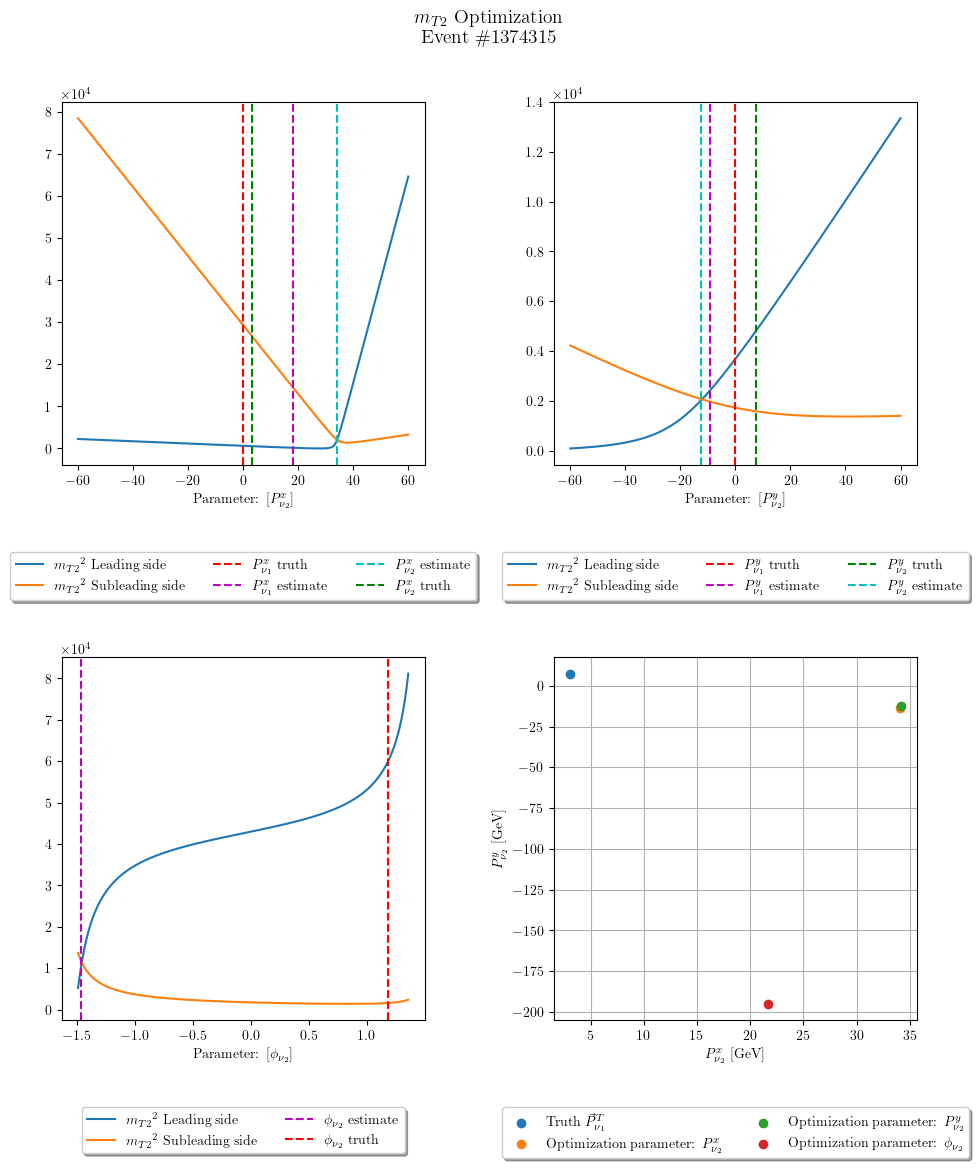

In [28]:
# MT2 minimization scheme
def MT2(m_vis,x_vis,y_vis,m_invis,x_invis,y_invis,slope,offset):
    # parameter -> x_invis: [-50,50] 
    y_invis = slope*x_invis + offset if y_invis == None else y_invis
    x_invis = (y_invis - offset)/slope if x_invis == None else x_invis
    pT_vis     = np.sqrt(  x_vis*x_vis   +    y_vis*y_vis   )
    pT_invis   = np.sqrt(x_invis*x_invis +  y_invis*y_invis )
    mT_vis     = np.sqrt(  m_vis*m_vis   +   pT_vis*pT_vis  )
    mT_invis   = np.sqrt(m_invis*m_invis + pT_invis*pT_invis)
    PT_dot = x_vis*x_invis + y_vis*y_invis
    return m_vis*m_vis + m_invis*m_invis+2*(mT_vis*mT_invis - PT_dot)
MT2 = np.vectorize(MT2)
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,12),tight_layout=True)
param_x = np.linspace(-60,60,200)
#y1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,param_x,None,slope_1,offset_1)
#y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,PT_miss[1]-param_x,None,slope_2,offset_2)
y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,param_x,None,slope_2,offset_2)
y1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,PT_miss[1]-param_x,None,slope_1,offset_1)
y_max = np.where(y1>y2,y1,y2)
opt_x = np.argmin(y_max)
ax[0,0].set_box_aspect(1)
ax[0,0].plot(param_x,y1,label=r'${m_{T2}}^2$ Leading side')
ax[0,0].plot(param_x,y2,label=r'${m_{T2}}^2$ Subleading side')
ax[0,0].axvline(Neutrino1[1],ls='dashed',c='r',label=r'$P^x_{\nu_1}$ truth')
#ax[0,0].axvline(param_x[opt_x],ls='dashed',c='m',label=r'$P^x_{\nu_1}$ estimate')
ax[0,0].axvline(PT_miss[1] - param_x[opt_x],ls='dashed',c='m',label=r'$P^x_{\nu_1}$ estimate')
#ax[0,0].axvline(PT_miss[1] - param_x[opt_x],ls='dashed',c='c',label=r'$P^x_{\nu_2}$ estimate')
ax[0,0].axvline(param_x[opt_x],ls='dashed',c='c',label=r'$P^x_{\nu_2}$ estimate')
ax[0,0].axvline(Neutrino2[1],ls='dashed',c='g',label=r'$P^x_{\nu_2}$ truth')
ax[0,0].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
#ax[0,0].set_xlabel(r"Parameter: [$P^x_{\nu_1}$]")
ax[0,0].set_xlabel(r"Parameter: [$P^x_{\nu_2}$]")
param_y = np.linspace(-60,60,200)
#x1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,None,param_y,slope_1,offset_1)
#x2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,None,PT_miss[2]-param_y,slope_2,offset_2)
x2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,None,param_y,slope_2,offset_2)
x1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,None,PT_miss[2]-param_y,slope_1,offset_1)
x_max = np.where(x1>x2,x1,x2)
opt_y = np.argmin(x_max)
ax[0,1].set_box_aspect(1)
ax[0,1].plot(param_y,x1,label=r'${m_{T2}}^2$ Leading side')
ax[0,1].plot(param_y,x2,label=r'${m_{T2}}^2$ Subleading side')
ax[0,1].axvline(Neutrino1[2],ls='dashed',c='r',label=r'$P^y_{\nu_1}$ truth')
#ax[0,1].axvline(param_y[opt_y],ls='dashed',c='m',label=r'$P^y_{\nu_1}$ estimate')
ax[0,1].axvline(PT_miss[2] - param_y[opt_y],ls='dashed',c='m',label=r'$P^y_{\nu_1}$ estimate')
ax[0,1].axvline(Neutrino2[2],ls='dashed',c='g',label=r'$P^y_{\nu_2}$ truth')
#ax[0,1].axvline(PT_miss[2] - param_y[opt_y],ls='dashed',c='c',label=r'$P^y_{\nu_2}$ estimate')
ax[0,1].axvline(param_y[opt_y],ls='dashed',c='c',label=r'$P^y_{\nu_2}$ estimate')
ax[0,1].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
#ax[0,1].set_xlabel(r"Parameter: [$P^y_{\nu_1}$]")
ax[0,1].set_xlabel(r"Parameter: [$P^y_{\nu_2}$]")
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=3)#x.legend(loc2='best')()
ax[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=3)#x.legend(loc='best')()
plt.suptitle(r'$m_{T2}$ Optimization'+"\nEvent \#{}".format(evt_id),fontsize=14)
#Y1_from_X1 = Nu_py_line(param_x[opt_x],slope_1,offset_1)
#X1_from_Y1 = Nu_px_line(param_y[opt_y],slope_1,offset_1)
Y2_from_X2 = Nu_py_line(param_x[opt_x],slope_2,offset_2)
X2_from_Y2 = Nu_px_line(param_y[opt_y],slope_2,offset_2)
'''
print("X1 as parameter")
print("Truth         X1 = {:.4f}".format(Neutrino1[1]))
print("Estimated     X1 = {:.4f}".format(param_x[opt_x]))
print("Relative error   = {:.4f}".format(np.abs( (Neutrino1[1] - param_x[opt_x])/Neutrino1[1] ) ) )
print("Truth         Y1 = {:.4f}".format(Neutrino1[2]))
print("Corresponding Y1 = {:.4f}".format(Y1_from_X1))
print("Relative error   = {:.4f}".format(np.abs((Neutrino1[2]-Y1_from_X1)/Neutrino1[2] ) ) )

print("Y1 as parameter")
print("Truth         Y1 = {:.4f}".format(Neutrino1[2]))
print("Estimated     Y1 = {:.4f}".format(param_y[opt_y]))
print("Relative error   = {:.4f}".format(np.abs((Neutrino1[2] - param_y[opt_y])/Neutrino1[2]) ) )
print("Truth         X1 = {:.4f}".format(Neutrino1[1]))
print("Corresponding X1 = {:.4f}".format(X1_from_Y1))
print("Relative error   = {:.4f}".format(np.abs((Neutrino1[1]-X1_from_Y1)/Neutrino1[1]) ) )
'''
ax[1,1].set_box_aspect(1)
#ax[1,1].scatter(Neutrino1[1],Neutrino1[2],label=r'Truth $\vec{P}^T_{\nu_1}$')
ax[1,1].scatter(Neutrino2[1],Neutrino2[2],label=r'Truth $\vec{P}^T_{\nu_1}$')
#ax[1,1].scatter(param_x[opt_x],Y1_from_X1,label=r'Optimization parameter: $P^x_{\nu_1}$')
#ax[1,1].scatter(X1_from_Y1,param_y[opt_y],label=r'Optimization parameter: $P^y_{\nu_1}$')
ax[1,1].scatter(param_x[opt_x],Y2_from_X2,label=r'Optimization parameter: $P^x_{\nu_2}$')
ax[1,1].scatter(X2_from_Y2,param_y[opt_y],label=r'Optimization parameter: $P^y_{\nu_2}$')
'''
simultaneous minimization:
    using phi as parameter
consider a point that runs along linear function y = ax + b
the polar angle on the x-y plane has the relation of tan(phi) = a + b/x
the limit of the angle occurs when a ray of this angle becomes parallel to the line
i.e. when tan(phi_0) = |a|  and tan(phi_0 + pi) = a (phi_0 < pi/2)
To ensure the bounded value of phi be continuous, we split the events into four cases:
    1) when x-intercept is less than 0 (crosses -x axis in positive orientation)
        the polar angle runs from 0 to 2pi
        1.1) when slope is positive
            phi in closed interval (-phi_0 , pi-phi_0)
        1.2) when slope is negative 
            phi in closed interval (pi-phi_0 , 2pi-phi_0)
    2) when x-intercept is greater than 0 (crosses +x axis in positive orientation)
        the polar angle runs from -pi to pi
        2.1) when slope is positive
            phi in closed interval (phi_0-pi , phi_0) 
        2.2) when slope is negative
            phi in closed interval (-phi_0 , pi-phi_0)
'''
def MT2_phi(m_vis,x_vis,y_vis,m_invis,phi,slope,offset):
    # parameter -> phi:
    # tan(phi) = y/x = slope + offset/x = slope*y/(y-offset)
    # ([arctan(phi) - slope]/offset) = 1/x
    x_invis = offset/(np.tan(phi) - slope)
    y_invis = slope*x_invis + offset
    x_invis = (y_invis - offset)/slope if x_invis == None else x_invis
    pT_vis     = np.sqrt(  x_vis*x_vis   +    y_vis*y_vis   )
    pT_invis   = np.sqrt(x_invis*x_invis +  y_invis*y_invis )
    mT_vis     = np.sqrt(  m_vis*m_vis   +   pT_vis*pT_vis  )
    mT_invis   = np.sqrt(m_invis*m_invis + pT_invis*pT_invis)
    PT_dot = x_vis*x_invis + y_vis*y_invis
    return (m_vis*m_vis + m_invis*m_invis+2*(mT_vis*mT_invis - PT_dot))
MT2_phi = np.vectorize(MT2_phi)
def phi_range(slope,offset,margin):
    phi_0 = np.arctan(np.abs(slope))
    if slope*offset < 0:
        if slope < 0:
            return np.linspace(-(1-margin)*phi_0,np.pi-(1+margin)*phi_0,200)
        elif slope > 0:
            return np.linspace((1+margin)*phi_0 - np.pi,(1-margin)*phi_0,200)
    elif slope*offset > 0:
        if slope < 0 : 
            return np.linspace(np.pi - (1-margin)*phi_0,2*np.pi-(1+margin)*phi_0,200)
        elif slope > 0:
            return np.linspace((1+margin)*phi_0,np.pi+(1-margin)*phi_0,200)

'''
#phi_f = phi_range_1[-1]
#MT2_i = MT2_phi(Lepton1[4],Lepton1[1],Lepton1[2],0,phi_i,slope_1,offset_1)
#MT2_f = MT2_phi(Lepton1[4],Lepton1[1],Lepton1[2],0,phi_f,slope_1,offset_1)
x_i = offset_1/(np.tan(phi_i)-slope_1)
x_f = offset_1/(np.tan(phi_f)-slope_1)
y_i = slope_1*x_i + offset_1
y_f = slope_1*x_f + offset_1
#print(phi_i,phi_f)
print(slope_1,offset_1)
print(x_i,y_i)
print(x_i*slope_1 + offset_1)
print(x_f,y_f)
'''
margin=0.1
#phi_range_1 = phi_range(slope_1,offset_1,0.2)
phi_range_2 = phi_range(slope_2,offset_2,margin)
#y1 = MT2_phi(Lepton1[4],Lepton1[1],Lepton1[2],0,phi_range_1,slope_1,offset_1)
#x1 = offset_1/(np.tan(phi_range_1) - slope_1)
#x2 = PT_miss[1]-x1
#y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,x2,None,slope_2,offset_2)
y2 = MT2_phi(Lepton2[4],Lepton2[1],Lepton2[2],0,phi_range_2,slope_2,offset_2)
x2 = offset_2/(np.tan(phi_range_2) - slope_2)
x1 = PT_miss[1]-x2
y1 = MT2(Lepton1[4],Lepton1[1],Lepton1[2],0,x1,None,slope_2,offset_2)
y_max = np.where(y1>y2,y1,y2)
opt_phi = np.argmin(y_max)
#fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=True)
#Nu_1_phi_truth = (np.arctan2(Neutrino1[2],Neutrino1[1]) + 2*np.pi)%(2*np.pi)
Nu_2_phi_truth = (np.arctan2(Neutrino2[2],Neutrino2[1]) + 2*np.pi)%(2*np.pi)
ax[1,0].set_box_aspect(1)
#ax[1,0].plot(phi_range_1,y1,label=r'${m_{T2}}^2$ Leading side')
#ax[1,0].plot(phi_range_1,y2,label=r'${m_{T2}}^2$ Subleading side')
ax[1,0].plot(phi_range_2,y1,label=r'${m_{T2}}^2$ Leading side')
ax[1,0].plot(phi_range_2,y2,label=r'${m_{T2}}^2$ Subleading side')
#ax[1,0].axvline((phi_range_1[opt_phi]),ls='dashed',c='m',label=r'$\phi_{\nu_1}$ estimate')
ax[1,0].axvline((phi_range_2[opt_phi]),ls='dashed',c='m',label=r'$\phi_{\nu_2}$ estimate')
#ax[1,0].axvline(Nu_1_phi_truth,ls='dashed',c='r',label=r'$\phi_{\nu_1}$ truth')
ax[1,0].axvline(Nu_2_phi_truth,ls='dashed',c='r',label=r'$\phi_{\nu_2}$ truth')
ax[1,0].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-3,3))
#ax[1,0].set_xlabel(r"Parameter: [$\phi_{\nu_1}$]")
ax[1,0].set_xlabel(r"Parameter: [$\phi_{\nu_2}$]")
#X1_from_phi = offset_1/(np.tan(phi_range_1[opt_phi]) - slope_1)
#Y1_from_phi = slope_1*X1_from_phi + offset_1
X2_from_phi = offset_2/(np.tan(phi_range_2[opt_phi]) - slope_2)
Y2_from_phi = slope_2*X2_from_phi + offset_2
#ax[1,1].scatter(X1_from_phi,Y1_from_phi,label=r'Optimization parameter: $\phi_{\nu_1}$')
ax[1,1].scatter(X2_from_phi,Y2_from_phi,label=r'Optimization parameter: $\phi_{\nu_2}$')

ax[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=2)#x.legend(loc2='best')()
'''
for i in np.linspace(1.05,1.1,3):
    y2 = MT2(Lepton2[4],Lepton2[1],Lepton2[2],0,x2,None,slope_2,offset_2)*i
    y_max = np.where(y1>y2,y1,y2)
    opt_phi = np.argmin(y_max)
    #fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=True)
    X1_from_phi = offset_1/(np.tan(phi_range_1[opt_phi]) - slope_1)
    Y1_from_phi = slope_1*X1_from_phi + offset_1
    ax[1,1].scatter(X1_from_phi,Y1_from_phi,marker='*')
    ax[1,1].text(X1_from_phi,Y1_from_phi,'Scale {:.3f}'.format(i))
'''
#ax[1,1].set_xlabel(r"$P^x_{\nu_1}$ [GeV]")
#ax[1,1].set_ylabel(r"$P^y_{\nu_1}$ [GeV]")
ax[1,1].set_xlabel(r"$P^x_{\nu_2}$ [GeV]")
ax[1,1].set_ylabel(r"$P^y_{\nu_2}$ [GeV]")
ax[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=2)#x.legend(loc2='best')()
ax[1,1].grid()
plt.show()

In [88]:
print(WBoson1[4],WBoson2[4])
W1_mT = np.sqrt((WBoson1[1]**2 + WBoson1[2]**2) + WBoson1[4]**2)
W2_mT = np.sqrt((WBoson2[1]**2 + WBoson2[2]**2) + WBoson2[4]**2)
print((W2_mT/W1_mT))
print(np.arctan(np.abs(slope_1))-np.pi)

80.888164062 43.484089844
0.5279277356818194
-2.061042285496934


In [160]:
'''
#testing point for Neutrino1
pm = np.random.choice([-1,1],size=1)[0]
test_x = Neutrino1[1]+ pm*0.2*Neutrino1[1]
test_y = slope_1*test_x + offset_1
'''
print(PT_miss[1::].to_numpy())
print(Neutrino1[1:3])
print(Neutrino2[1:3])
print(diNu[1:3])

[-14.95729099  32.92900067]
[-3.33852905 12.37059961]
[-11.69756836  21.38243164]
[-15.03609741  33.75303125]


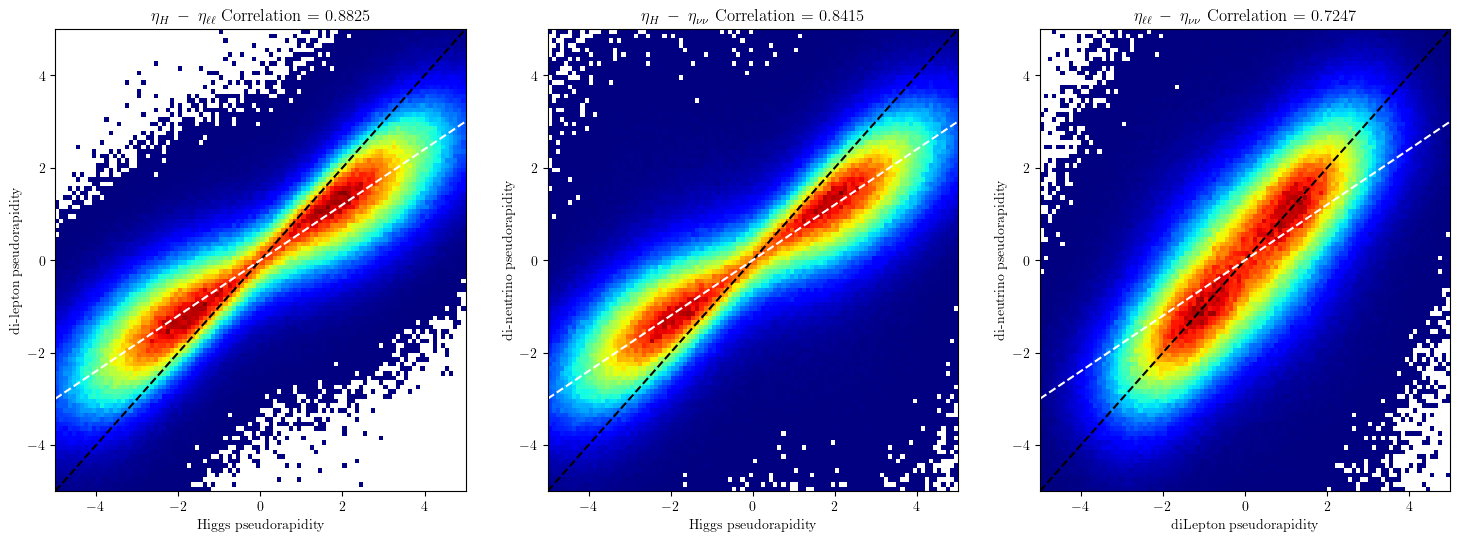

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
ax[0].hist2d(Higgs['eta'],diLepton['eta']*(5/5),bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=Higgs['eta'],y=diLepton['eta'])[0,1]
ax[0].set_title(r"$\eta_H \:-\:\eta_{\ell\ell}$ Correlation = {%.4f}"%(corr))
ax[1].hist2d(Higgs['eta'],diNeutrino['eta']*(5/5),bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=Higgs['eta'],y=diNeutrino['eta'])[0,1]
ax[1].set_title(r"$\eta_H \:-\:\eta_{\nu\nu}$ Correlation = {%.4f}"%(corr))
ax[2].hist2d(diLepton['eta'],diNeutrino['eta']*(5/5),bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=diLepton['eta'],y=diNeutrino['eta'])[0,1]
ax[2].set_title(r"$\eta_{\ell\ell} \:-\:\eta_{\nu\nu}$ Correlation = {%.4f}"%(corr))
#plt.hist2d(diLepton['eta'],diNeutrino['eta'],bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
#plt.xlabel("di-lepton pseudorapidity")
#plt.ylabel("di-neutrino pseudorapidity")
for i in range(3):
    ax[i].axline((-5,-5),(5,5),c= 'k',ls='dashed')
    ax[i].axline((-5,-3),(5,3),c= 'w',ls='dashed')
ax[0].set_xlabel("Higgs pseudorapidity")
ax[0].set_ylabel("di-lepton pseudorapidity")
ax[1].set_xlabel("Higgs pseudorapidity")
ax[1].set_ylabel("di-neutrino pseudorapidity")
ax[2].set_xlabel("diLepton pseudorapidity")
ax[2].set_ylabel("di-neutrino pseudorapidity")
plt.show()

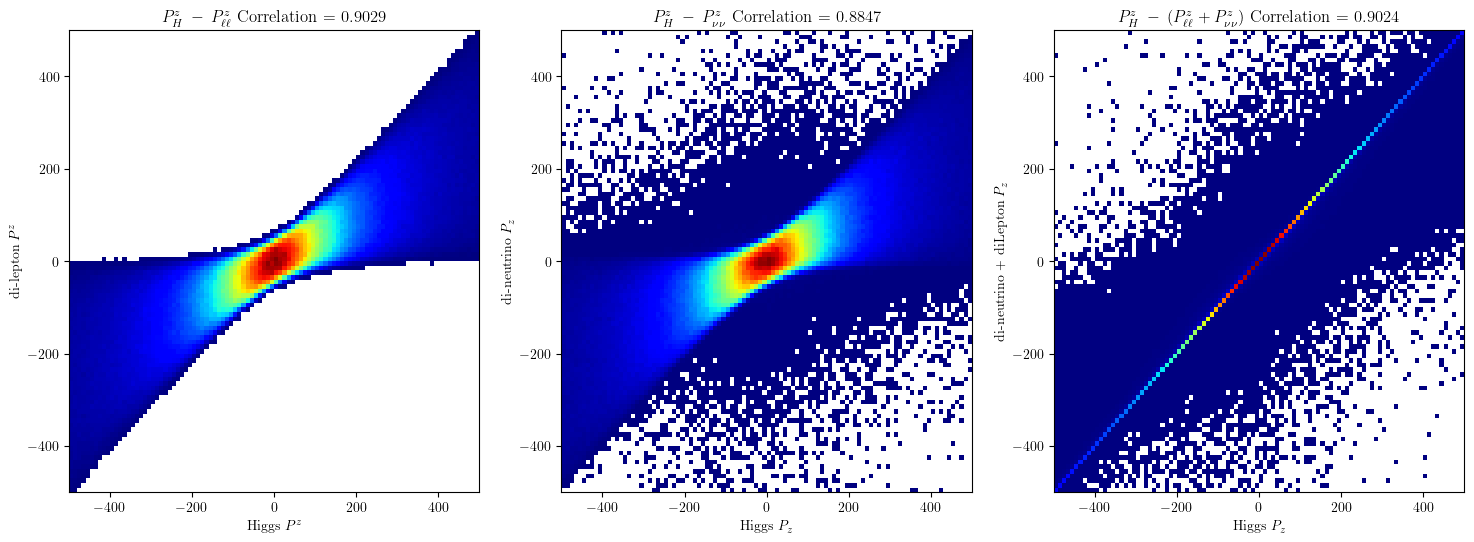

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
range_pz = [[-500,500],[-500,500]]
ax[0].hist2d(Higgs['pz'],diLepton['pz']*(5/5),bins=[100,100],range=range_pz,cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=Higgs['pz'],y=diLepton['pz'])[0,1]
ax[0].set_title(r"$P^z_H \:-\: P^z_{\ell\ell}$ Correlation = {%.4f}"%(corr))
ax[1].hist2d(Higgs['pz'],diNeutrino['pz']*(5/5),bins=[100,100],range=range_pz,cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=Higgs['pz'],y=diNeutrino['pz'])[0,1]
ax[1].set_title(r"$P^z_H \:-\: P^z_{\nu\nu}$ Correlation = {%.4f}"%(corr))
ax[2].hist2d(Higgs['pz'],diLepton['pz']+diNeutrino['pz']*(5/5),bins=[100,100],range=range_pz,cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=diLepton['pz'],y=diLepton['pz']+diNeutrino['pz'])[0,1]
ax[2].set_title(r"$P^z_H \:-\: (P^z_{\ell\ell} + P^z_{\nu\nu})$ Correlation = {%.4f}"%(corr))
ax[0].set_xlabel(r"Higgs $P^z$")
ax[0].set_ylabel(r"di-lepton $P^z$")
ax[1].set_xlabel(r"Higgs $P_z$")
ax[1].set_ylabel(r"di-neutrino $P_z$")
ax[2].set_xlabel(r"Higgs $P_z$")
ax[2].set_ylabel(r"di-neutrino + diLepton $P_z$")
plt.show()

# Pseudorapidity regression task - Neural Network

In [17]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.13.0


In [86]:
from sklearn.model_selection import train_test_split
sample_size = 100000
print("Sample size: ",sample_size)
sample_events = np.random.choice(len(Higgs['pz']),size=sample_size,replace=False)
training_data = pd.DataFrame()
data_label = np.where(LeptonP['pt']>LeptonM['pt'],NeutrinoM['phi'],NeutrinoP['phi']) # subleading neutrino phi
data_mean = np.mean(data_label)
data_std = np.std(data_label)
normalized_data_label = (data_label - data_mean)/data_std
#normalized_data_label = (Higgs['eta'] - np.mean(Higgs['eta']))/np.std(Higgs['eta'])
#data_label = Higgs.loc[sample_events,'eta']
#normalized_data_label = (data_label - np.min(data_label))/(np.max(data_label)-np.min(data_label)) 
# Try four-vector components
# for label in ['E','px','py','pz']:#,'m','pt','eta','phi']
#print("Particle permutation: [lepton+(E,x,y,z,pt,phi,eta) , lepton-((E,x,y,z,pt,phi,eta))]")
#for i,feature in enumerate(['E','px','py','pz','pt','phi','eta']):
#    training_data['lp_'+feature] = LeptonP.loc[sample_events,feature]
#    training_data['lm_'+feature] = LeptonM.loc[sample_events,feature]
#for i,feature in enumerate(['E','px','py','pz','pt','phi','eta']):
for i,feature in enumerate(['E','eta','pz']):#,'eta']):
    training_data['lp_'+feature] = LeptonP.loc[sample_events,feature]
    training_data['lm_'+feature] = LeptonM.loc[sample_events,feature]
for i,feature in enumerate(['phi','px','py']):#,'eta']):
    training_data['lp_'+feature] = LeptonP.loc[sample_events,feature]
    training_data['lm_'+feature] = LeptonM.loc[sample_events,feature]
    training_data['MET_'+feature] = MET.loc[sample_events,feature]
    
'''
    if i == 0 :
        training_data['MET_'+feature] = MET.loc[sample_events,feature]
for i,feature in enumerate(['E','py']):#,'eta']):
    training_data['lm_'+feature] = LeptonM.loc[sample_events,feature]
    training_data['lp_'+feature] = LeptonP.loc[sample_events,feature]
    if i == 1 :
        training_data['MET_'+feature] = MET.loc[sample_events,feature]
        
# 0,0,0, 1, 2,2,2, 3,3,3, 4,4,4,4, 5,5,5, 6,6,6, 7,7,7, 8
print("Component permutation:[",\
                              "diLep_eta   , eta+, eta- , diLep_d_eta",\
                              "diLep_z     ,   z+,   z- , diLep_d_Pz",\
                              "diLep_E     ,   E+,   E- , diLep_d_E",\
                              "diLep_pT    ,  pT+,  pT- , MET_pT,",\
                              "diLep_y     ,   y+,   y- , MET_y,",\
                              "diLep_x     ,   x+,   x- , MET_x,",\
                              "diLep_d_Phi , phi+, phi- , MET_phi",\
                              "]")
# 24 features
#for i,feature in enumerate(['E','pt','px','px','py','py','pz','eta','phi','d_phi']):#,'m','pt','eta','phi']
#for i,feature in enumerate(['0',' 1',' 2','    3','    4','  5',' 6',' 7']):
#for i,feature in enumerate(['eta','d_eta','pz','E','pt','px','py','phi','d_phi']):
for i,feature in enumerate(['eta','pz','E','pt','py','px','phi']):
    if i in [0,1,2]: # eta,pz,E
        training_data['ll_'+feature] = diLepton.loc[sample_events,feature]
        training_data['lp_'+feature] = LeptonP.loc[sample_events,feature]
        training_data['lm_'+feature] = LeptonM.loc[sample_events,feature]
        training_data['ll_d_'+feature] = diLepton.loc[sample_events,feature] #diLep_d_eta,diLep_d_pz,diLep_d_E
    elif i in [3,4,5,6]: # pt,y,x,phi
        if i == 6: # diLep_dPhi
            training_data['ll_d_'+feature] = diLepton.loc[sample_events,feature]
        else:
            training_data['ll_'+feature] = diLepton.loc[sample_events,feature]
        training_data['lp_'+feature] = LeptonP.loc[sample_events,feature]
        training_data['lm_'+feature] = LeptonM.loc[sample_events,feature]
        training_data['MET_'+feature] = MET.loc[sample_events,feature]

'''
print(training_data.columns)
# train : test : val = 7000 : 2000 : 1000
train_set,test_set,train_label,test_label = train_test_split(training_data,normalized_data_label[sample_events],test_size=0.25,random_state=11)
test_set , val_set, test_label, val_label = train_test_split(test_set,test_label,test_size=0.25,random_state=27)
for i in [train_set,test_set,val_set,train_label,test_label,val_label]:
    i = tf.convert_to_tensor(i)
print("Training    data shape: ",  train_set.shape)
print("Training   label shape: ",train_label.shape)
print("Testing     data shape: ",   test_set.shape)
print("Testing    label shape: ", test_label.shape)
print("Validation  data shape: ",    val_set.shape)
print("Validation label shape: ",  val_label.shape)

Sample size:  100000
Index(['lp_E', 'lm_E', 'lp_eta', 'lm_eta', 'lp_pz', 'lm_pz', 'lp_phi',
       'lm_phi', 'MET_phi', 'lp_px', 'lm_px', 'MET_px', 'lp_py', 'lm_py',
       'MET_py'],
      dtype='object')
Training    data shape:  (75000, 15)
Training   label shape:  (75000,)
Testing     data shape:  (18750, 15)
Testing    label shape:  (18750,)
Validation  data shape:  (6250, 15)
Validation label shape:  (6250,)


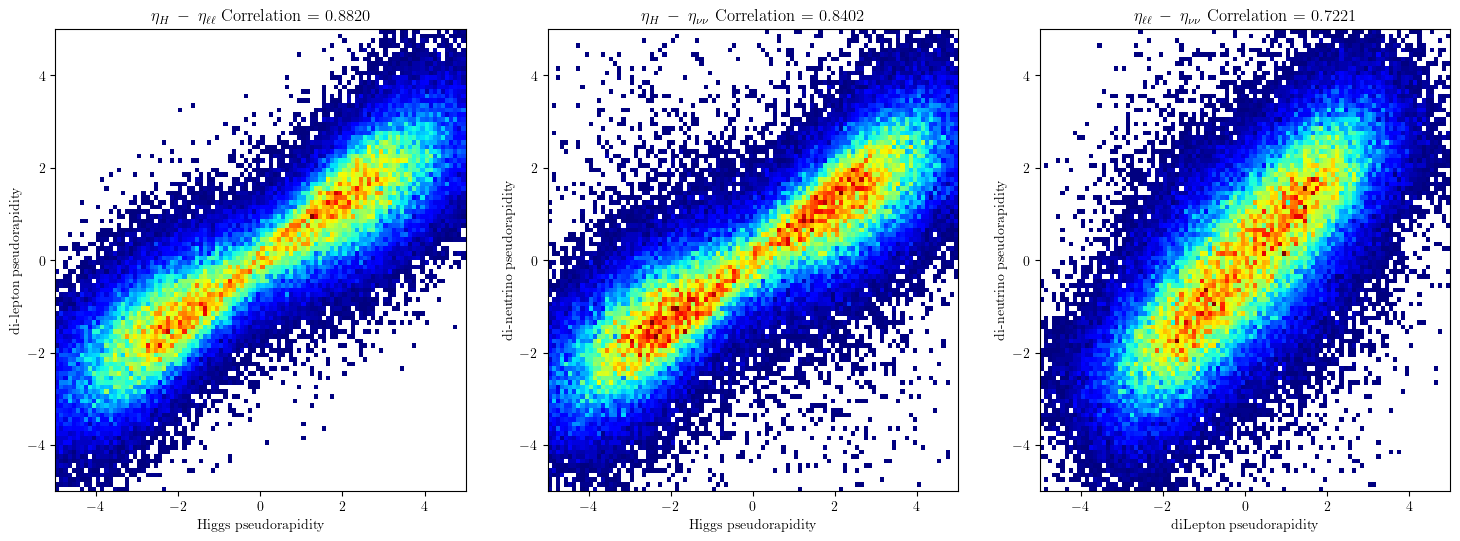

In [85]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
ax[0].hist2d(Higgs['eta'][sample_events],diLepton['eta'][sample_events]*(5/5),bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=Higgs['eta'][sample_events],y=diLepton['eta'][sample_events])[0,1]
ax[0].set_title(r"$\eta_H \:-\:\eta_{\ell\ell}$ Correlation = {%.4f}"%(corr))
ax[1].hist2d(Higgs['eta'][sample_events],diNeutrino['eta'][sample_events]*(5/5),bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=Higgs['eta'][sample_events],y=diNeutrino['eta'][sample_events])[0,1]
ax[1].set_title(r"$\eta_H \:-\:\eta_{\nu\nu}$ Correlation = {%.4f}"%(corr))
ax[2].hist2d(diLepton['eta'][sample_events],diNeutrino['eta'][sample_events]*(5/5),bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
corr = np.corrcoef(x=diLepton['eta'][sample_events],y=diNeutrino['eta'][sample_events])[0,1]
ax[2].set_title(r"$\eta_{\ell\ell} \:-\:\eta_{\nu\nu}$ Correlation = {%.4f}"%(corr))
#plt.hist2d(diLepton['eta'],diNeutrino['eta'],bins=[100,100],range=[[-5,5],[-5,5]],cmap=my_cmap,vmin=1)
#plt.xlabel("di-lepton pseudorapidity")
#plt.ylabel("di-neutrino pseudorapidity")

ax[0].set_xlabel("Higgs pseudorapidity")
ax[0].set_ylabel("di-lepton pseudorapidity")
ax[1].set_xlabel("Higgs pseudorapidity")
ax[1].set_ylabel("di-neutrino pseudorapidity")
ax[2].set_xlabel("diLepton pseudorapidity")
ax[2].set_ylabel("di-neutrino pseudorapidity")
plt.show()

In [528]:
#train_label= tf.expand_dims(train_label,axis=0)
#test_label= tf.expand_dims(test_label,axis=0)
#val_label= tf.expand_dims(val_label,axis=0)
print(train_set.shape)
print(train_label.shape)
print(test_set.shape)
print(test_label.shape)
print(val_set.shape)
print(val_label.shape)

(21000, 14)
(21000,)
(5250, 14)
(5250,)
(1750, 14)
(1750,)


In [87]:
#train_set = tf.expand_dims(train_set, axis=1)
#test_set = tf.expand_dims(test_set, axis=1)
#val_set = tf.expand_dims(val_set, axis=1)
normalizer = tf.keras.layers.Normalization(axis=-1) # normalize along column (normalize feature value)
normalizer.adapt(train_set)
print(normalizer.mean)


tf.Tensor(
[[ 9.1172523e+01  9.1111916e+01 -5.6108213e-03  3.4919276e-03
  -7.3954755e-01 -1.2327817e-01  1.4616296e-02  2.3310985e-03
  -4.6608220e-03 -1.5766460e-01 -9.7611107e-02  2.5785205e-01
   1.3918258e-01  5.1413700e-02 -2.5850331e-02]], shape=(1, 15), dtype=float32)


In [88]:
def my_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)
nodes = [20,20,20,20]
depth = len(nodes)
NN_layers = [normalizer]
#NN_layers.append(tf.keras.layers.Reshape(target_shape=(1,28)))
for i in range(depth):
    NN_layers.append(layers.Dense(
        nodes[i],
        #activation='relu',
        activation=my_leaky_relu,
        kernel_regularizer=tf.keras.regularizers.L2(0.001)
    ))

# output layer  
NN_layers.append(layers.Dense(1)) 
NN_model = tf.keras.Sequential(NN_layers)
NN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
)
NN_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 15)                31        
 tion)                                                           
                                                                 
 dense_85 (Dense)            (None, 20)                320       
                                                                 
 dense_86 (Dense)            (None, 20)                420       
                                                                 
 dense_87 (Dense)            (None, 20)                420       
                                                                 
 dense_88 (Dense)            (None, 20)                420       
                                                                 
 dense_89 (Dense)            (None, 1)                 21        
                                                     

In [89]:
cb = []
cb.append(tf.keras.callbacks.earlystopping(monitor='val_loss',patience=20,start_from_epoch=100))
history = nn_model.fit(
    x=train_set,
    y=train_label,
    validation_data=(val_set,val_label),
    epochs=500,
    use_multiprocessing=true,
    workers=16,
    callbacks=cb
)

Epoch 1/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6957 - val_loss: 0.6758
Epoch 2/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6578 - val_loss: 0.6568
Epoch 3/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6462 - val_loss: 0.6497
Epoch 4/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6414 - val_loss: 0.6492
Epoch 5/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6389 - val_loss: 0.6490
Epoch 6/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6373 - val_loss: 0.6458
Epoch 7/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6365 - val_loss: 0.6429
Epoch 8/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6359 - val_loss: 0.6422
Epoch 9/500
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6353 - val_loss: 0.6427
Epoch 10/500
2344/2344 [==============================] - 3s 1ms/step - l

In [529]:
%%time
# depth = 6
NN_layers = [normalizer] #input normalizing layer
NN_layers.append(tf.keras.layers.Reshape(target_shape=(1,14)))
# input array shape = (28,)
NN_layers.append(layers.Conv1D(
    filters=12,
    kernel_size = 4,
    strides=1,
    padding='same',
    activation='relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.001)
))
# array downsampled to shape = (7,)
NN_layers.append(layers.Conv1D(
    filters=6,
    kernel_size=2,
    strides=1,
    padding='same',   
    activation='relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.001)
))
NN_layers.append(layers.Conv1D(
    filters=12,
    kernel_size=2,
    strides=1,
    padding='same',   
    activation='relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.001)
))
NN_layers.append(layers.Conv1D(
    filters=14,
    kernel_size=4,
    strides=1,
    padding='same',   
    activation='relu',
    kernel_regularizer=tf.keras.regularizers.L2(0.001)
))
       
#NN_layers.append(layers.Dense(28)) 
# output layer  
NN_layers.append(layers.Dense(1)) 
NN_model = tf.keras.Sequential(NN_layers)
NN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error'
)
NN_model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliz  (None, 14)                29        
 ation)                                                          
                                                                 
 reshape_8 (Reshape)         (None, 1, 14)             0         
                                                                 
 conv1d_83 (Conv1D)          (None, 1, 12)             684       
                                                                 
 conv1d_84 (Conv1D)          (None, 1, 6)              150       
                                                                 
 conv1d_85 (Conv1D)          (None, 1, 12)             156       
                                                                 
 conv1d_86 (Conv1D)          (None, 1, 14)             686       
                                                     

In [ ]:
evt_id = np.random.choice(len(Higgs['eta']))
if LeptonP['pt'][evt_id] > LeptonM['pt'][evt_id]:
    lepton_1 = LeptonP.iloc[evt_id,0:5]
    lepton_2 = LeptonM.iloc[evt_id,0:5]
    neutrino_1 = NeutrinoP.iloc[evt_id,0:5]
    neutrino_2 = NeutrinoM.iloc[evt_id,0:5]
    W_boson_1 = WBosonP.iloc[evt_id,0:5]
    W_boson_2 = WBosonM.iloc[evt_id,0:5]
else:
    lepton_1 = LeptonM.iloc[evt_id,0:5]
    lepton_2 = LeptonP.iloc[evt_id,0:5]
    neutrino_1 = NeutrinoM.iloc[evt_id,0:5]
    neutrino_2 = NeutrinoP.iloc[evt_id,0:5]
    W_boson_1 = WBosonM.iloc[evt_id,0:5]
    W_boson_2 = WBosonP.iloc[evt_id,0:5]

lepton_2_P = mv.vec_mag(lepton_2[1],lepton_2[2],lepton_2[3])
M2 = 0.5(W_boson_2[5]**2 + lepton_2_P**2 - lepton_2[0]**2)


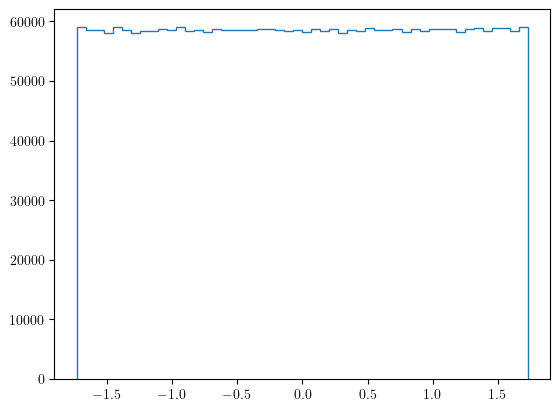

In [64]:
a = np.where(np.abs(Higgs['eta'])<4,True,False)
b = np.where(np.abs(Higgs['eta'])>2.4,True,False)
plt.hist(,bins=50,histtype='step')
plt.show()

In [530]:
CB = []
CB.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,start_from_epoch=100))
history = NN_model.fit(
    x=train_set,
    y=train_label,
    validation_data=(val_set,val_label),
    epochs=500,
    use_multiprocessing=True,
    workers=16,
    callbacks=CB
)
print(NN_model.evaluate(test_set,test_label,verbose=0))

Epoch 1/500
657/657 [==============================] - 13s 19ms/step - loss: 2.6001 - val_loss: 1.6093
Epoch 2/500
657/657 [==============================] - 12s 18ms/step - loss: 1.6130 - val_loss: 1.5335
Epoch 3/500
657/657 [==============================] - 13s 20ms/step - loss: 1.5524 - val_loss: 1.4952
Epoch 4/500
657/657 [==============================] - 13s 20ms/step - loss: 1.5165 - val_loss: 1.5276
Epoch 5/500
657/657 [==============================] - 12s 19ms/step - loss: 1.4974 - val_loss: 1.4659
Epoch 6/500
657/657 [==============================] - 12s 19ms/step - loss: 1.4866 - val_loss: 1.4703
Epoch 7/500
657/657 [==============================] - 12s 19ms/step - loss: 1.4766 - val_loss: 1.4736
Epoch 8/500
657/657 [==============================] - 12s 19ms/step - loss: 1.4720 - val_loss: 1.4676
Epoch 9/500
657/657 [==============================] - 13s 19ms/step - loss: 1.4658 - val_loss: 1.4553
Epoch 10/500
657/657 [==============================] - 13s 19ms/step - l

In [29]:

min_value = np.min(data_label)

586/586 [==============================] - 1s 924us/step


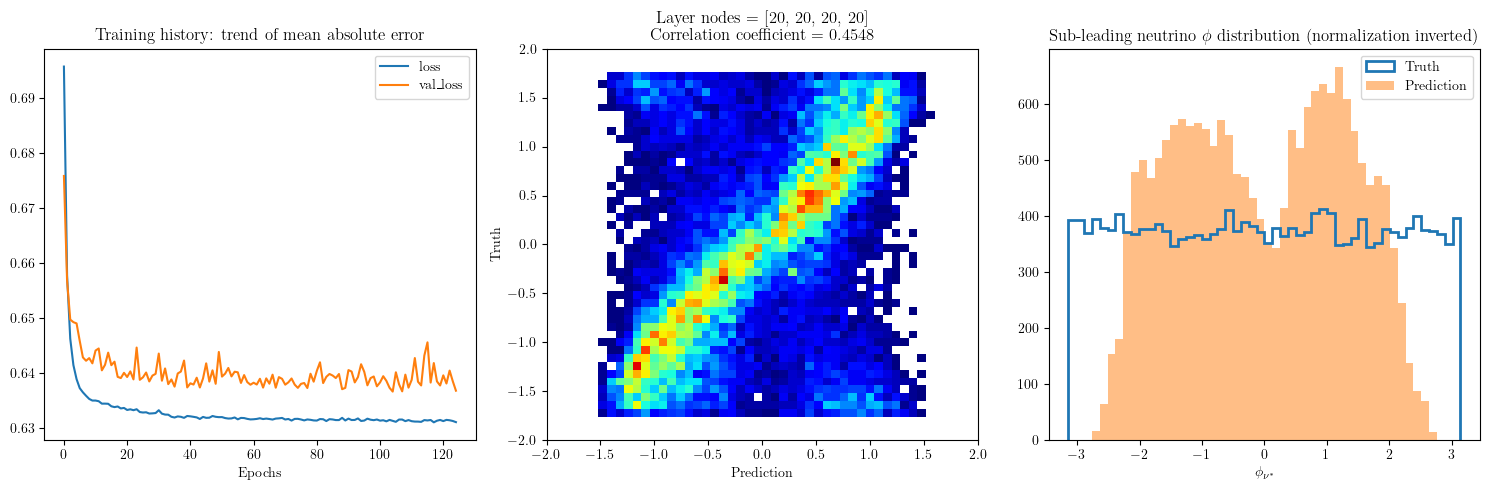

In [90]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
ax[0].plot(history.history['loss'],label=r'loss')
ax[0].plot(history.history['val_loss'],label=r'val\_loss')
ax[0].set_title("Training history: trend of mean absolute error")
ax[0].set_xlabel("Epochs")
ax[0].legend()
test_pred = NN_model.predict(test_set)[:,0]#[::,0,0]
#ax[1].set_xlim((-5,5))
#ax[1].set_ylim((-5,5))
ax[1].hist2d(test_pred,test_label,bins=[50,50],range=[[-2,2],[-2,2]],vmin=1,cmap=my_cmap)
ax[1].set_xlabel("Prediction")
ax[1].set_ylabel("Truth")
coef = np.corrcoef(test_pred,test_label)[0,1]
ax[1].set_title("Layer nodes = {}\nCorrelation coefficient = {:.4f}".format(nodes,coef))
ax[2].set_title(r"Sub-leading neutrino $\phi$ distribution (normalization inverted)")
inverted_prediction = test_pred*data_std + data_mean
inverted_label = test_label*data_std + data_mean
ax[2].hist(inverted_label,bins=50,range=[-np.pi,np.pi],histtype='step',lw=2,label='Truth')
ax[2].hist(inverted_prediction,bins=50,range=[-np.pi,np.pi],histtype='bar',alpha=0.5,label='Prediction')
ax[2].set_xlabel(r"$\phi_{\nu^*}$")
ax[2].legend()
plt.show()

586/586 [==============================] - 1s 914us/step


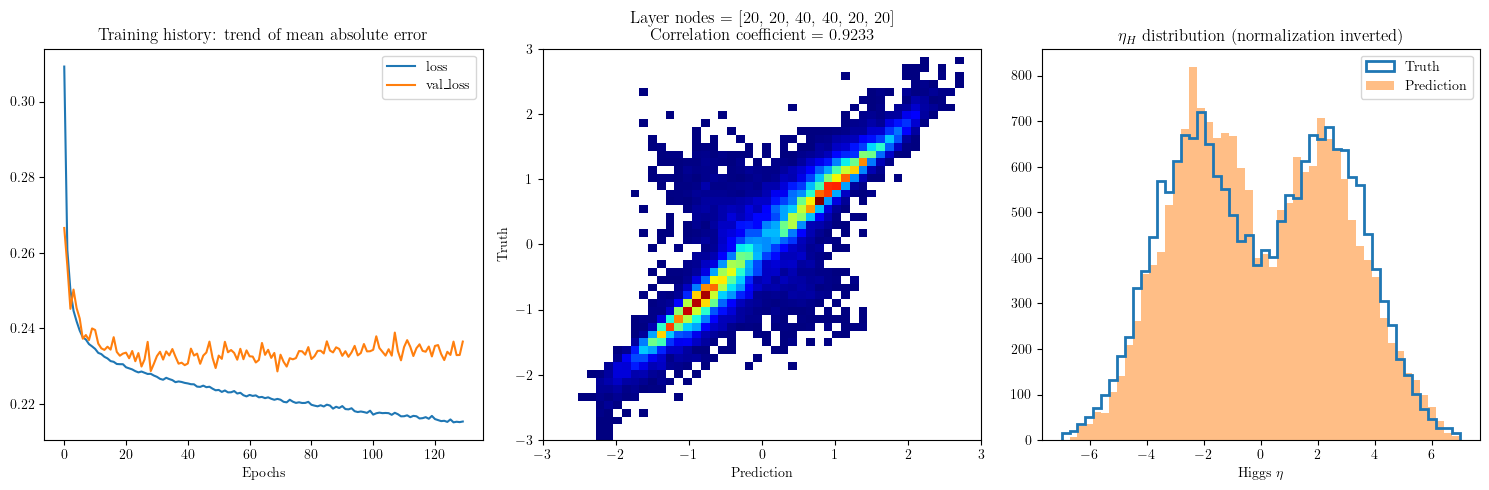

In [59]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
ax[0].plot(history.history['loss'],label=r'loss')
ax[0].plot(history.history['val_loss'],label=r'val\_loss')
ax[0].set_title("Training history: trend of mean absolute error")
ax[0].set_xlabel("Epochs")
ax[0].legend()
test_pred = NN_model.predict(test_set)[:,0]#[::,0,0]
#ax[1].set_xlim((-5,5))
#ax[1].set_ylim((-5,5))
ax[1].hist2d(test_pred,test_label,bins=[50,50],range=[[-3,3],[-3,3]],vmin=1,cmap=my_cmap)
ax[1].set_xlabel("Prediction")
ax[1].set_ylabel("Truth")
coef = np.corrcoef(test_pred,test_label)[0,1]
ax[1].set_title("Layer nodes = {}\nCorrelation coefficient = {:.4f}".format(nodes,coef))
ax[2].set_title(r"$\eta_H$ distribution (normalization inverted)")
inverted_prediction = test_pred*np.std(Higgs['eta']) + np.mean(Higgs['eta'])
inverted_label = test_label*np.std(Higgs['eta'])+np.mean(Higgs['eta'])
ax[2].hist(inverted_label,bins=50,range=[-7,7],histtype='step',lw=2,label='Truth')
ax[2].hist(inverted_prediction,bins=50,range=[-7,7],histtype='bar',alpha=0.5,label='Prediction')
ax[2].set_xlabel(r"Higgs $\eta$")
ax[2].legend()
plt.show()

In [506]:
a = test_set
#a = tf.squeeze(a)
test_pred = NN_model_2.predict(a)
print(test_pred.shape)
print(test_set.shape)
print(test_label.shape)#bins=[50,50],range=[[-5,5],[-5,5]],vmin=1,cmap=my_cmap)


165/165 [==============================] - 0s 780us/step
(5250, 1)
(5250, 14)
(5250,)


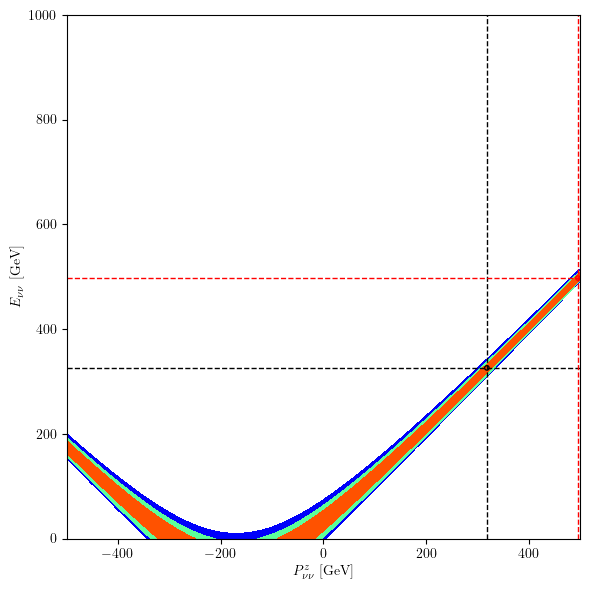

In [186]:
evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
m_Higgs = 125.35 # GeV
diLep = np.array([  diLepton[ 'E'].iat[evt_id],\
                    diLepton['px'].iat[evt_id],\
                    diLepton['py'].iat[evt_id],\
                    diLepton['pz'].iat[evt_id],\
                    diLepton[ 'm'].iat[evt_id]]) #(E, Px, Py, Pz, m)
diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                  diNeutrino['px'].iat[evt_id],\
                  diNeutrino['py'].iat[evt_id],\
                  diNeutrino['pz'].iat[evt_id],\
          np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
PT_miss = np.array([MET['pt'].iat[evt_id],MET['px'].iat[evt_id],MET['py'].iat[evt_id]]) #(PT, Px, Py)
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
diNu_mass = diNeutrino['eta'].iat[evt_id]
diLep_eta = diLepton['eta'].iat[evt_id]
#PT_total = np.sqrt((diLep[1]+diNu[1])*(diLep[1]+diNu[1]) + (diLep[2]+diNu[2])*(diLep[2]+diNu[2]))
#E_diNu_est = np.sqrt(PT_total*PT_total + (diLep[3]+Pz_diNu)*(diLep[3]+Pz_diNu) + m_Higgs*m_Higgs) - diLep[0]
E_diNu = np.linspace(0,1000,1000)
#d_phi = np.linspace(-np.pi,np.pi,1000)
#PT_diLep = np.sqrt(diLep[1]*diLep[1]+diLep[2]+diLep[2])
#PT_total = np.sqrt(PT_miss[0]*PT_miss[0] + PT_diLep*PT_diLep + 2*PT_diLep*PT_miss[0]*np.cos(d_phi)) 
#E_H_est = m_Higgs*m_Higgs - PT_total*PT_total - (Pz_diNu*Pz_diNu)
E_diNu = np.linspace(0,1000,1000)
Pz_diNu = np.linspace(-500,500,1000)
grid_z = np.zeros(shape=(1000,1000))
PT_total = np.sqrt((diLep[1]+PT_miss[1])*(diLep[1]+PT_miss[1]) + (diLep[2]+PT_miss[2])*(diLep[2]+PT_miss[2]))
E_max = -99999
Z_max = -99999
W_max = -99999
for yi,E in enumerate(E_diNu):
    for xj,Z in enumerate(Pz_diNu):
        EH2 = (E+diLep[0])*(E+diLep[0])
        PH2 = PT_total*PT_total + (Z+diLep[3])*(Z+diLep[3])
        MH2 = EH2 - PH2
        diNu_P = np.sqrt((PT_miss[0]*PT_miss[0]) + Z*Z)
        diNu_eta = np.arctanh(Z/diNu_P)
        if MH2 < 0:
            grid_z[yi,xj] = -1
        else:
            dM = MH2 - m_Higgs*m_Higgs
            grid_z[yi,xj] = np.exp(-1*(dM/m_Higgs/m_Higgs)*(dM/m_Higgs/m_Higgs))
            if grid_z[yi,xj] > W_max :
                if np.abs(diLep_eta - diNu_eta)<2 and (diLep[3]/Z)*(diLep[3]/Z)<4:
                    E_max = E
                    Z_max = Z
                    W_max = grid_z[yi,xj]
grid_x, grid_y = np.meshgrid(Pz_diNu,E_diNu)
fig, ax = plt.subplots(2,1,figsize=(6,9), gridspec_kw={'height_ratios': [2, 1]})
ax[0].contourf(grid_x,grid_y,grid_z,vmin=0.3,cmap=my_cmap)
ax[0].axhline(diNu[0],ls='dashed',c='k',lw=1,label='Truth value')
ax[0].axvline(diNu[3],ls='dashed',c='k',lw=1)
ax[0].axhline(E_max,ls='dashed',c='r',lw=1,label='Estimate')
ax[0].axvline(Z_max,ls='dashed',c='r',lw=1)
ax[0].scatter(diNu[3],diNu[0], facecolors='None',s=10,edgecolor='k')
ax[0].scatter(Z_max,E_max, facecolors='None',s=10,edgecolor='r')
ax[0].ylabel(r"$E_{\nu\nu}$ [GeV]")
ax[0].xlabel(r"$P^z_{\nu\nu}$ [GeV]")
ax[0].legend()
ax[0].tight_layout()
ax[0].show()
#Pz_diNu_est = np.sqrt((E_diNu + diLep[0])*(E_diNu + diLep[0]) - m_Higgs*m_Higgs - PT_total*PT_total) - diLep[3]
#m_Higgs = Higgs['m'].iat[evt_id]
#ax[0].plot(d_phi,E_H_est)
#ax[0].plot(Pz_diNu_est,E_diNu)
#ax[0].axhline(diLep[0]+diNu[0])
#ax[0].axhline(diNu[0],ls='dashed',c='r')
#ax[0].axhline(diLep[0],ls='dashed',c='C3')
#ax[0].axvline(diNu[3],ls='dashed',c='g')
#ax[0].axvline(diLep[3],ls='dashed',c='C2')
#ax[0].show()

In [204]:
%%time

evt_id = (np.random.choice(len(Higgs['E']),size=1))[0]
print(evt_id)
MET_x_std = np.std(MET['px'])
MET_y_std = np.std(MET['py'])
''' 
# truth value
diNu  = np.array([diNeutrino[ 'E'].iat[evt_id],\
                  diNeutrino['px'].iat[evt_id],\
                  diNeutrino['py'].iat[evt_id],\
                  diNeutrino['pz'].iat[evt_id],\
          np.sqrt(diNeutrino['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
'''
miss_PT = np.array([MET['pt'].iat[evt_id],MET['px'].iat[evt_id],MET['py'].iat[evt_id]]) #(PT, Px, Py)

def weight_XY(X_hat,Y_hat):
    dx = (-1*0.5)*((np.abs(X_hat) - np.abs(miss_PT[1]))/MET_x_std)*((np.abs(X_hat) - np.abs(miss_PT[1]))/MET_x_std)
    dy = (-1*0.5)*((Y_hat - miss_PT[2])/MET_y_std)*((Y_hat - miss_PT[2])/MET_y_std)
    return np.exp(dx)*np.exp(dy)

m_Higgs = 125 # GeV
#m_Higgs = Higgs['m'].iat[evt_id] #GeV
diLep = np.array([  diLepton[ 'E'].iat[evt_id],\
                    diLepton['px'].iat[evt_id],\
                    diLepton['py'].iat[evt_id],\
                    diLepton['pz'].iat[evt_id],\
                    diLepton[ 'm'].iat[evt_id]]) #(E, Px, Py, Pz, m)
diNu  = np.array([0,0,0,0,0])
steps = 1000
m_diNu  = np.linspace(0,100,1000) # 0.1 GeV resolution
Pz_diNu = np.linspace(-500,500,1000) # 1 GeV resolution
Pz_Higgs = np.linspace(-500,500,1000) # 1 GeV resolution
eta_diNu = np.linspace(-5,5,1000) # resolution
eta_Higgs = np.linspace(-5,5,1000) # resolution
gridplot_Z = np.zeros(shape=(steps,steps))
max_weight, max_m, max_eta = -99999, -99999, -99999
max_Px, max_Py, max_Pz = -99999, -99999, -99999
res = 0
for x, m in enumerate(m_diNu):
    diNu[4] = m
    #for y, Pz in enumerate(Pz_diNu):
    #for y, eta in enumerate(eta_diNu):
    #for y, eta in enumerate(eta_Higgs):
    for y, Pz_H in enumerate(Pz_Higgs):
        #diNu[3] = Pz
        #diNu[0] = np.sqrt(diNu[4]*diNu[4] + miss_PT[0]*miss_PT[0] + diNu[3]*diNu[3]) 
        #diNu[3] = miss_PT[0]*np.sinh(eta)
        #diNu[3] = np.sqrt(m_Higgs*m_Higgs+(diLep[1]+miss_PT[1])*(diLep[1]+miss_PT[1])+(diLep[2]+miss_PT[2])*(diLep[2]+miss_PT[2]))*np.sinh(eta) - diLep[3]
        # ^ using Higgs pseudorapidity and transverse mass (diNeutrino Pz = Higgs Pz - diLepton Pz)
        diNu[3] = Pz_H - diLep[3] # directly use Higgs Pz
        diNu[0] = np.sqrt(diNu[4]*diNu[4] + miss_PT[0]*miss_PT[0] + diNu[3]*diNu[3]) 
        #diNu[0] = np.sqrt(miss_PT[0]*miss_PT[0] + m*m)*np.cosh(eta) # <- using pseudorapidity and transverse mass
        M = (0.5*(m_Higgs*m_Higgs - diLep[4]*diLep[4] - diNu[4]*diNu[4]) - diLep[0]*diNu[0] + diLep[3]*diNu[3])
        A = (diLep[2]*diLep[2] + diLep[1]*diLep[1])
        B = (2*M*diLep[2])
        C = (M*M - diLep[1]*diLep[1]*miss_PT[0]*miss_PT[0])
        D = B*B - 4*A*C
        if D < 0:
            gridplot_Z[y,x] = -1
        elif D == 0:
            Y = (-1*B)/(2*A)
            X = np.sqrt(miss_PT[0]*miss_PT[0] - Y*Y)
            #m_H = np.sqrt((diLep[0] + diNu[0])**2 - (diLep[1]+X)**2 - (diLep[2]+Y)**2 - (diLep[3]+diNu[3])**2)
            #res = np.abs(m_H - m_Higgs)/m_Higgs
            gridplot_Z[y,x] = weight_XY(X,Y)*np.exp(-1*0.5*res*res)
        elif D > 0:
            Yp = (-1*B + np.sqrt(D))/(2*A)
            Xp = np.sqrt(miss_PT[0]*miss_PT[0]- Yp*Yp)
            #m_H = np.sqrt((diLep[0] + diNu[0])**2 - (diLep[1]+Xp)**2 - (diLep[2]+Yp)**2 - (diLep[3]+diNu[3])**2)
            #res = np.abs(m_H - m_Higgs)/m_Higgs
            Wp = weight_XY(Xp,Yp)
            Ym = (-1*B - np.sqrt(D))/(2*A)
            Xm = np.sqrt(miss_PT[0]*miss_PT[0]- Ym*Ym)
            #m_H = np.sqrt((diLep[0] + diNu[0])**2 - (diLep[1]+Xm)**2 - (diLep[2]+Ym)**2 - (diLep[3]+diNu[3])**2)
            #res = np.abs(m_H - m_Higgs)/m_Higgs
            Wm = weight_XY(Xm,Ym)*np.exp(-1*0.5*res*res)
            gridplot_Z[y,x] = max(Wp,Wm)
            Y = Yp if Wp >= Wm else Ym
            X_sign = (miss_PT[1]/np.abs(miss_PT[1]))
            X = Xp*X_sign if Wp >= Wm else Xm*X_sign  
        else : # check error
            gridplot_Z[y,x] = -99999
        if gridplot_Z[y,x] >= max_weight:
            max_weight = gridplot_Z[y,x]
            res = A*Y*Y + B*Y + C
            max_m,  max_Pz_H, max_res = m, Pz_H, res
            #max_m,  max_eta = m, eta
            #max_Px, max_Py, max_Pz= X, Y, Pz
            max_Px, max_Py, max_Pz= X, Y, diNu[3]
print("Residual value = ", max_res)
print("Maximum weight = ", max_weight)
print("Maximizing diNeutrino Px  = ", max_Px)
print("True value diNeutrino Px  = ", diNeutrino['px' ].iat[evt_id])
print("Maximizing diNeutrino Py  = ", max_Py)
print("True value diNeutrino Py  = ", diNeutrino['py' ].iat[evt_id])
print("Maximizing diNeutrino Pz  = ", max_Pz)
print("True value diNeutrino Pz  = ", diNeutrino['pz' ].iat[evt_id])
print("Maximizing Higgs Pz       = ", max_Pz_H)
print("True value Higgs Pz       = ", Higgs['pz' ].iat[evt_id])
#print("Maximizing Higgs eta      = ", max_eta)
#print("True value Higgs eta      = ", Higgs['eta'].iat[evt_id])
#print("True value diNeutrino eta = ", diNeutrino['eta'].iat[evt_id])
#print("Maximizing diNeutrino eta = ", max_eta)
print("Maximizing diNeutrino m   = ", max_m)
print("True value diNeutrino m   = ", np.sqrt(diNeutrino['m2' ].iat[evt_id]))
#print(diNu)
#print(diLep)
#print(miss_PT)

1262468
Residual value =  2.3283064365386963e-10
Maximum weight =  0.9999999846778278
Maximizing diNeutrino Px  =  20.26380764515701
True value diNeutrino Px  =  20.258616211
Maximizing diNeutrino Py  =  24.86328017923683
True value diNeutrino Py  =  24.867510345000003
Maximizing diNeutrino Pz  =  34
True value diNeutrino Pz  =  82.979835937
Maximizing Higgs Pz       =  57.55755755755763
True value Higgs Pz       =  106.76003125
Maximizing diNeutrino m   =  52.952952952952955
True value diNeutrino m   =  23.129498228232897
CPU times: user 5.03 s, sys: 1.56 ms, total: 5.03 s
Wall time: 4.99 s


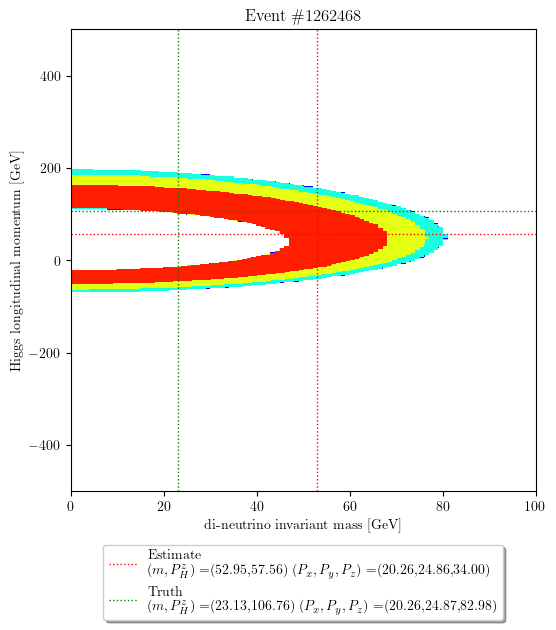

In [205]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
gridplot_X, gridplot_Y = np.meshgrid(m_diNu,Pz_Higgs)
#gridplot_X, gridplot_Y = np.meshgrid(m_diNu,eta_Higgs)
#gridplot_X, gridplot_Y = np.meshgrid(m_diNu,eta_diNu)
#gridplot_X, gridplot_Y = np.meshgrid(m_diNu,Pz_diNu)
ax.set_title(f"Event \#{evt_id}")
ax.set_xlabel("di-neutrino invariant mass [GeV]")
ax.set_ylabel("Higgs longitudinal momentum [GeV]")
#ax.set_ylabel("Higgs pseudorapidity")
#ax.set_ylabel("di-neutrino pseudorapidity")
#ax.set_ylabel("di-neutrino longitudinal momentum [GeV]")
ax.contourf(gridplot_X, gridplot_Y, gridplot_Z, cmap=my_cmap, vmin=0)
#lab='Estimate \n'+r'$(m,\eta)=$'+'({:.2f},{:.2f})\n'.format(max_m, max_eta)+\
lab='Estimate \n'+r'$(m,P^z_H)=$'+'({:.2f},{:.2f})  '.format(max_m, max_Pz_H)+\
        r'$(P_x,P_y,P_z)=$'+'({:.2f},{:.2f},{:.2f})'.format(max_Px,max_Py,max_Pz)
#lab='Estimate \n'+r'$(m,P_z)=$'+'({:.4f},{:.4f})\n'.format(max_m, max_Pz)+\
                  #r'$(P_x,P_y)=$'+'({:.4f},{:.4f})'.format(max_Px,max_Py)
ax.axvline(max_m, ls='dotted', c='r', lw=1, label=lab)
ax.axhline(max_Pz_H, ls='dotted', c='r', lw=1)
#ax.axhline(max_eta, ls='dotted', c='r', lw=1)
#ax.axhline(max_Pz, ls='dotted', c='r', lw=1)
#lab='Truth \n'+r'$(m,\eta)=$'+'({:.2f},{:.2f})\n'.format(np.sqrt(diNeutrino['m2' ].iat[evt_id]),diNeutrino['eta'].iat[evt_id])+\
#lab='Truth \n'+r'$(m,\eta)=$'+'({:.2f},{:.2f})\n'.format(np.sqrt(diNeutrino['m2' ].iat[evt_id]),Higgs['eta'].iat[evt_id])+\
lab='Truth \n'+r'$(m,P^z_H)=$'+'({:.2f},{:.2f})  '.format(np.sqrt(diNeutrino['m2' ].iat[evt_id]),Higgs['pz'].iat[evt_id])+\
     r'$(P_x,P_y,P_z)=$'+'({:.2f},{:.2f},{:.2f})'.format(diNeutrino['px'].iat[evt_id],diNeutrino['py'].iat[evt_id],diNeutrino['pz'].iat[evt_id])
#lab='Truth \n'+r'$(m,P_z)=$'+'({:.4f},{:.4f})\n'.format(np.sqrt(diNeutrino['m2' ].iat[evt_id]),diNeutrino['pz'].iat[evt_id])+\
               #r'$(P_x,P_y)=$'+'({:.4f},{:.4f})'.format(diNeutrino['px'].iat[evt_id],diNeutrino['py'].iat[evt_id])
ax.axvline(np.sqrt(diNeutrino['m2' ].iat[evt_id]), ls='dotted', c='g', lw=1,label = lab)
ax.axhline(Higgs['pz'].iat[evt_id], ls='dotted', c='g', lw=1)
#ax.axhline(Higgs['eta'].iat[evt_id], ls='dotted', c='g', lw=1)
#ax.axhline(diNeutrino['eta'].iat[evt_id], ls='dotted', c='g', lw=1)
#ax.axhline(diNeutrino['pz'].iat[evt_id], ls='dotted', c='g', lw=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=1)#x.legend(loc='best')
plt.show()

In [181]:
print(diNu[0], np.sqrt(diNu[4]*diNu[4] + miss_PT[0]*miss_PT[0] + diNu[3]*diNu[3]) )
#diNu[0] = np.sqrt(diNu[4]*diNu[4] + miss_PT[0]*miss_PT[0] + diNu[3]*diNu[3]) 
#'''
M = (0.5*(m_Higgs*m_Higgs - diLep[4]*diLep[4] - diNu[4]*diNu[4]) - diLep[0]*diNu[0] + diLep[3]*diNu[3])
A = (diLep[2]*diLep[2] + diLep[1]*diLep[1])
B = (2*M*diLep[2])
C = (M*M - diLep[1]*diLep[1]*miss_PT[0]*miss_PT[0])
print('M = ',M)
print('A = ',A)
print('B = ',B)
print('C = ',C)
Y = (diNu[2])
X = (diNu[1])
print(np.sqrt(miss_PT[0]**2 - Y**2),diNu[1])
print('diNeutrino X = ',X,' MET X = ',miss_PT[1])
print('diNeutrino Y = ',Y,' MET Y = ',miss_PT[2])
print('Order of A:',int(np.log10(np.abs(A*Y*Y))),'\t',A*Y*Y)
print('Order of B:',int(np.log10(np.abs(B*Y))),'\t',B*Y)
print('Order of C:',int(np.log10(np.abs(C))),'\t',C)
print("Residual:",A*Y*Y + B*Y + C, ' order', int(np.log10(np.abs(A*Y*Y + B*Y + C))))
#'''
D = B*B - 4*A*C
Y1 = (-1*B + np.sqrt(D))/(2*A)
Y2 = (-1*B - np.sqrt(D))/(2*A)
#print(D)
if D>0 :
    print('Y+ = ',Y1)
    print('Y- = ',Y2)

532 532.4510101697801
M =  -38028.23147267327
A =  2679.2973320538213
B =  3490949.3873529807
C =  1444369185.136437
55.714255185000006 0
diNeutrino X =  0  MET X =  27.442934082
diNeutrino Y =  0  MET Y =  48.486736328


/tmp/ipykernel_56243/2982396702.py:17: RuntimeWarning: divide by zero encountered in log10
  print('Order of A:',int(np.log10(np.abs(A*Y*Y))),'\t',A*Y*Y)


OverflowError: cannot convert float infinity to integer

## MT2-assisted on-shell reconstruction

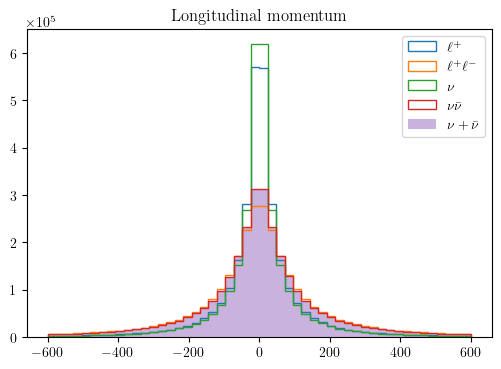

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
R = [-600,600]
ax.set_title('Longitudinal momentum')
ax.hist(LeptonP['pz'],bins=50,range=R,histtype='step',label=r'$\ell^+$')
ax.hist(diLepton['pz'],bins=50,range=R,histtype='step',label=r'$\ell^+\ell^-$')
ax.hist(NeutrinoP['pz'],bins=50,range=R,histtype='step',label=r'$\nu$')
ax.hist(diNeutrino['pz'],bins=50,range=R,histtype='step',label=r'$\nu\bar{\nu}$')
ax.hist(NeutrinoM['pz']+NeutrinoP['pz'],bins=50,range=R,histtype='bar',alpha=0.5,label=r'$\nu+\bar{\nu}$')
ax.ticklabel_format(axis='y',useMathText=True,style='sci',scilimits=(-4,4))
ax.legend()
plt.show()

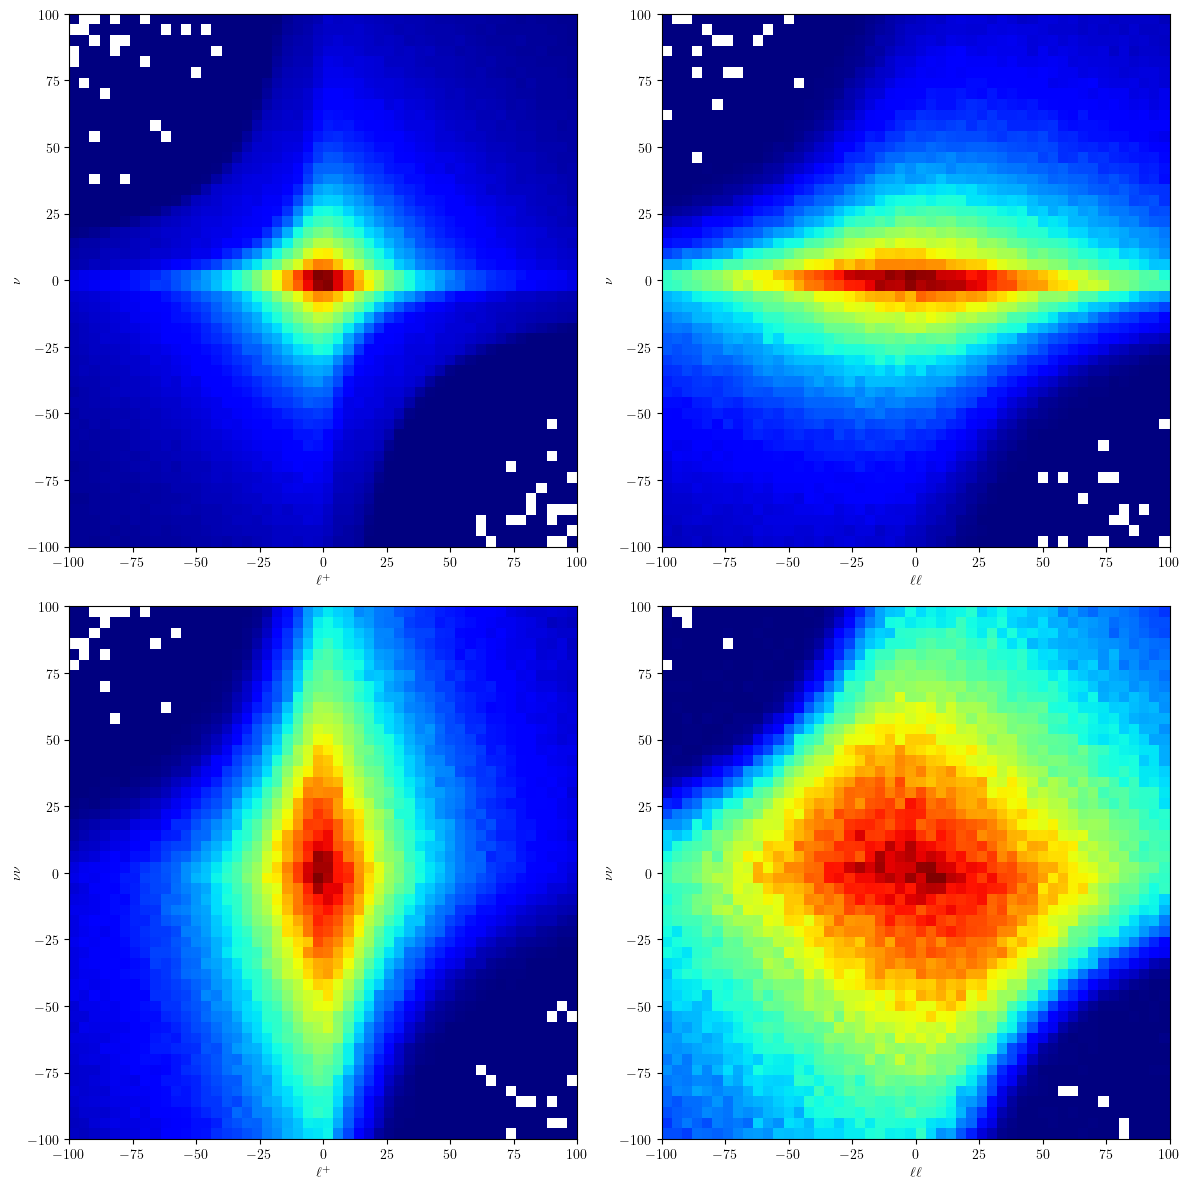

In [11]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12),tight_layout=True)
R = [-100,100]
ax[0,0].set_xlabel(r'$\ell^+$')
ax[0,0].set_ylabel(r'$\nu$')
ax[0,0].hist2d(LeptonP['pz'],NeutrinoP['pz'],bins=[50,50],range=[R,R],cmap=my_cmap,vmin=1)
ax[0,1].set_xlabel(r'$\ell\ell$')
ax[0,1].set_ylabel(r'$\nu$')
ax[0,1].hist2d(diLepton['pz'],NeutrinoP['pz'],bins=[50,50],range=[R,R],cmap=my_cmap,vmin=1)
ax[1,0].set_xlabel(r'$\ell^+$')
ax[1,0].set_ylabel(r'$\nu\nu$')
ax[1,0].hist2d(LeptonP['pz'],diNeutrino['pz'],bins=[50,50],range=[R,R],cmap=my_cmap,vmin=1)
ax[1,1].set_xlabel(r'$\ell\ell$')
ax[1,1].set_ylabel(r'$\nu\nu$')
ax[1,1].hist2d(diLepton['pz'],diNeutrino['pz'],bins=[50,50],range=[R,R],cmap=my_cmap,vmin=1)
plt.show()

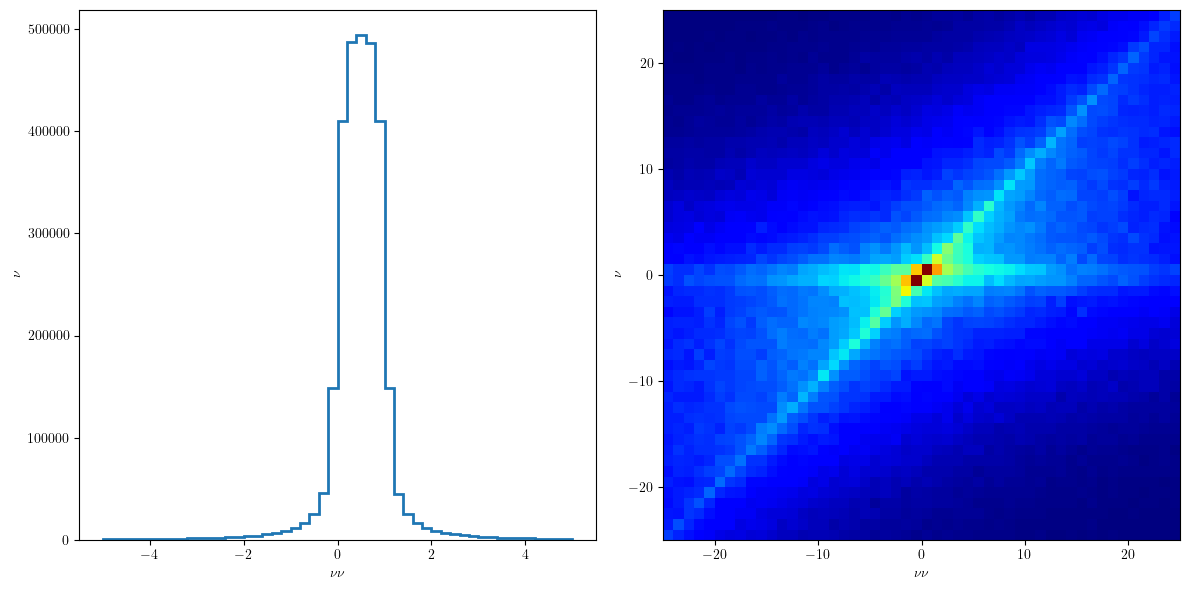

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),tight_layout=True)
R=[-25,25]
ax[0].set_xlabel(r"$\nu\nu$")
ax[0].set_ylabel(r"$\nu$")
ax[0].hist(NeutrinoP['pz']/diNeutrino['pz'],bins=50,range=[-5,5],histtype='step',lw=2)
ax[1].set_xlabel(r"$\nu\nu$")
ax[1].set_ylabel(r"$\nu$")
ax[1].hist2d(diNeutrino['pz'],NeutrinoP['pz'],bins=[50,50],range=[R,R],cmap=my_cmap,vmin=1)
plt.show()

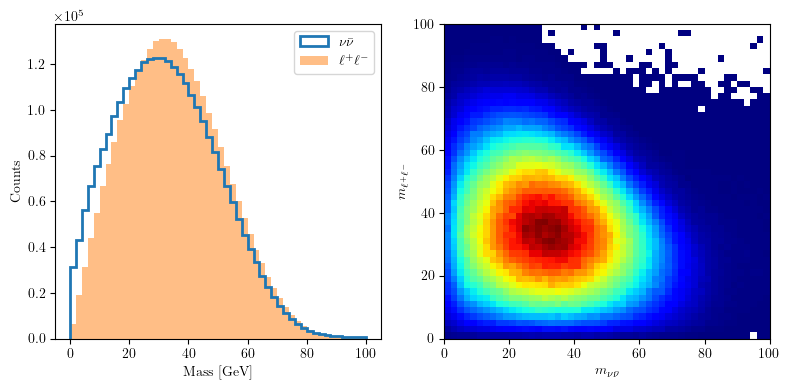

In [180]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4),tight_layout=True)
a = np.where(diNeutrino['m2']>0,True,False)
ax[0].hist(np.sqrt(diNeutrino['m2'][a]),bins=50,range=[0,100],histtype='step',label=r'$\nu\bar{\nu}$',lw=2)
ax[0].hist(diLepton['m'][a],bins=50,range=[0,100],histtype='bar',alpha=0.5,label=r'$\ell^+\ell^-$')
ax[0].legend()
ax[0].set_xlabel('Mass [GeV]')
ax[0].set_ylabel('Counts')
ax[0].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
ax[1].hist2d(np.sqrt(diNeutrino['m2'][a]),diLepton['m'][a],range=[[0,100],[0,100]],bins=[50,50],cmap=my_cmap,vmin=1)
ax[1].set_ylabel(r'$m_{\ell^+\ell^-}$')
ax[1].set_xlabel(r'$m_{\nu\bar{\nu}}$')
plt.show()

In [83]:
#Transverse mass of leptons
MeV=1
LeptonP['p'] = mv.vec_mag(LeptonP['px'],LeptonP['py'],LeptonP['pz'])
LeptonM['p'] = mv.vec_mag(LeptonM['px'],LeptonM['py'],LeptonM['pz'])
LeptonP['mt'] = np.sqrt(LeptonP['pt']**2 + (LeptonP['m']*MeV)**2)
LeptonM['mt'] = np.sqrt(LeptonM['pt']**2 + (LeptonM['m']*MeV)**2)

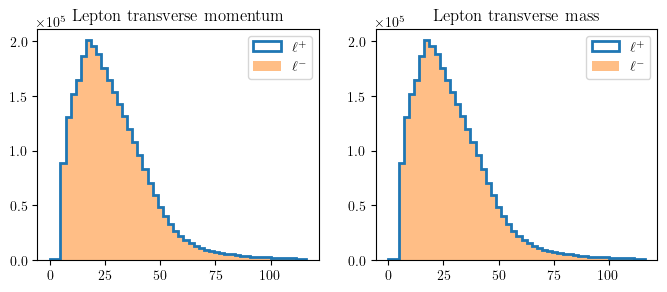

In [80]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,3))
center = np.mean(LeptonP['pt']) + np.mean(LeptonM['pt'])
ax[0].hist(LeptonP['pt'],bins=50,range=[0,2*center],label=r'$\ell^+$',histtype='step',lw=2)
ax[0].hist(LeptonM['pt'],bins=50,range=[0,2*center],label=r'$\ell^-$',histtype='bar',alpha=0.5)
center = np.mean(LeptonP['mt']) + np.mean(LeptonM['mt'])
ax[1].hist(LeptonP['mt'],bins=50,range=[0,2*center],label=r'$\ell^+$',histtype='step',lw=2)
ax[1].hist(LeptonM['mt'],bins=50,range=[0,2*center],label=r'$\ell^-$',histtype='bar',alpha=0.5)
for i in range(2):
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].legend()
ax[0].set_title("Lepton transverse momentum")
ax[1].set_title("Lepton transverse mass")
plt.show()

In [81]:
a = ([True,True,False])
print


<function print>

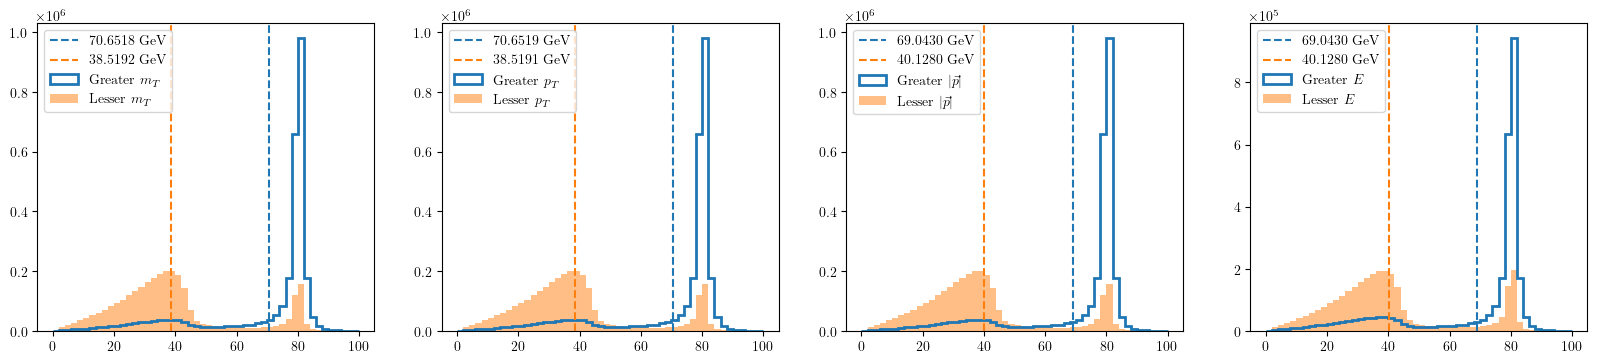

In [90]:
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,4))
lp_mT = np.where(LeptonP['mt']>LeptonM['mt'],True,False)
w1_mT = np.concatenate((WBosonP['m'][ lp_mT],WBosonM['m'][~lp_mT]))
w2_mT = np.concatenate((WBosonP['m'][~lp_mT],WBosonM['m'][ lp_mT]))
ax[0].axvline(np.mean(w1_mT),c='C0',ls='dashed',label='{:.4f} GeV'.format(np.mean(w1_mT)))
ax[0].axvline(np.mean(w2_mT),c='C1',ls='dashed',label='{:.4f} GeV'.format(np.mean(w2_mT)))
ax[0].hist(w1_mT,bins=50,range=[0,100],histtype='step',lw=2,label=r'Greater $m_T$')
ax[0].hist(w2_mT,bins=50,range=[0,100],histtype='bar',alpha=0.5,label=r'Lesser $m_T$')
lp_pT = np.where(LeptonP['pt']>LeptonM['pt'],True,False)
w1_pT = np.concatenate((WBosonP['m'][ lp_pT],WBosonM['m'][~lp_pT]))
w2_pT = np.concatenate((WBosonP['m'][~lp_pT],WBosonM['m'][ lp_pT]))
ax[1].axvline(np.mean(w1_pT),c='C0',ls='dashed',label='{:.4f} GeV'.format(np.mean(w1_pT)))
ax[1].axvline(np.mean(w2_pT),c='C1',ls='dashed',label='{:.4f} GeV'.format(np.mean(w2_pT)))
ax[1].hist(w1_pT,bins=50,range=[0,100],histtype='step',lw=2,label=r'Greater $p_T$')
ax[1].hist(w2_pT,bins=50,range=[0,100],histtype='bar',alpha=0.5,label=r'Lesser $p_T$')
lp_p = np.where(LeptonP['p']>LeptonM['p'],True,False)
w1_p = np.concatenate((WBosonP['m'][ lp_p],WBosonM['m'][~lp_p]))
w2_p = np.concatenate((WBosonP['m'][~lp_p],WBosonM['m'][ lp_p]))
ax[2].axvline(np.mean(w1_p),c='C0',ls='dashed',label='{:.4f} GeV'.format(np.mean(w1_p)))
ax[2].axvline(np.mean(w2_p),c='C1',ls='dashed',label='{:.4f} GeV'.format(np.mean(w2_p)))
ax[2].hist(w1_pT,bins=50,range=[0,100],histtype='step',lw=2,label=r'Greater $|\vec{p}|$')
ax[2].hist(w2_pT,bins=50,range=[0,100],histtype='bar',alpha=0.5,label=r'Lesser $|\vec{p}|$')
lp_E = np.where(LeptonP['E']>LeptonM['E'],True,False)
w1_E = np.concatenate((WBosonP['m'][ lp_E],WBosonM['m'][~lp_E]))
w2_E = np.concatenate((WBosonP['m'][~lp_E],WBosonM['m'][ lp_E]))
ax[3].axvline(np.mean(w1_E),c='C0',ls='dashed',label='{:.4f} GeV'.format(np.mean(w1_E)))
ax[3].axvline(np.mean(w2_E),c='C1',ls='dashed',label='{:.4f} GeV'.format(np.mean(w2_E)))
ax[3].hist(w1_E,bins=50,range=[0,100],histtype='step',lw=2,label=r'Greater $E$')
ax[3].hist(w2_E,bins=50,range=[0,100],histtype='bar',alpha=0.5,label=r'Lesser $E$')
for i in range(4):
    ax[i].ticklabel_format(axis='y', style='sci',useMathText=True,scilimits=(-4,4))
    ax[i].legend(loc=2)
plt.show()

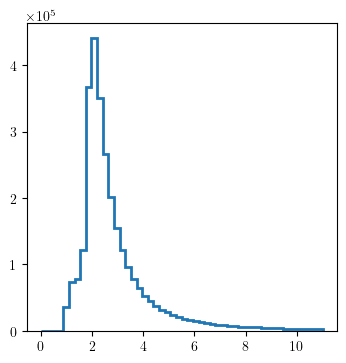

In [53]:
fig = plt.figure(figsize=(4,4))
plt.hist(W1/W2,bins=50,range=[0,11],histtype='step',lw=2)
plt.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

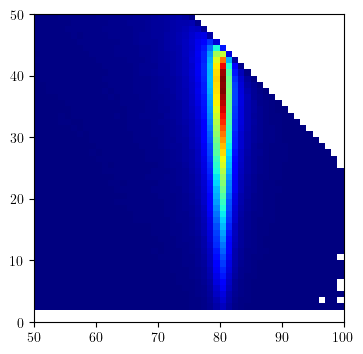

In [43]:
fig = plt.figure(figsize=(4,4))
W1 = np.where(WBosonP['m']>WBosonM['m'],WBosonP['m'],WBosonM['m'])
W2 = np.where(WBosonP['m']>WBosonM['m'],WBosonM['m'],WBosonP['m'])
plt.hist2d(W1,W2,bins=[50,50],range=[[50,100],[0,50]],cmap=my_cmap,vmin=1)
plt.show()

In [26]:
w1_mT.shape

(2928862, 8)

In [12]:
sigma_x = np.std(MET['px'])
sigma_y = np.std(MET['py'])
mH = 125
#mH = Higgs.at[evtid,'m'] # Higgs mass
#nu_eta = SubleadNu.at[evtid,'eta'] # scan parameter (store truth value)
#W_sublead_m = SubleadW.at[evtid,'m'] g# scan parameter (store truth value)

def solve_neutrino(evtid, nu_eta, W_sublead_m):
    lepton = mv.LorentzVector(SubleadLep.at[evtid,'px'],\
                             SubleadLep.at[evtid,'py'],\
                             SubleadLep.at[evtid,'pz'],\
                             SubleadLep.at[evtid,'E' ]) # leptonically decaying side

    W_leading = mv.LorentzVector(LeadingW.at[evtid,'px'],\
                                 LeadingW.at[evtid,'py'],\
                                 LeadingW.at[evtid,'pz'],\
                                 LeadingW.at[evtid,'E' ]) # hadronically decaying side
    E_sublead = lepton.E()*np.cosh(nu_eta) - lepton.Pz()*np.sinh(nu_eta)
    E_leading = W_leading.E()*np.cosh(nu_eta) - W_leading.Pz()*np.sinh(nu_eta)
    A = (lepton.Py()*E_leading - W_leading.Py()*E_sublead)
    A = A/(W_leading.Px()*E_sublead - lepton.Px()*E_leading)
    L = (A*lepton.Px() + lepton.Py())/E_sublead
    C = A**2 + 1 - L**2
    cc = (2*(lepton.Px()*E_leading - W_leading.Px()*E_sublead))
    B = (E_sublead*(mH**2 - W_leading.M2() - W_sublead_m**2 - 2*lepton.Dot(W_leading))) - E_leading*W_sublead_m**2
    B = B/cc
    K = (W_sublead_m**2/2 + lepton.Px()*B)/E_sublead
    #D = 2*(A*B - K*L)
    D = 2*(A*B - K*L + A*(lepton.M2()*E_leading/cc) - L*(lepton.M2()*W_leading.Px()/cc))
    #F = B**2 - K**2
    F = (B + (lepton.M2()*E_leading/cc))**2 - (K + (lepton.M2()*W_leading.Px()/cc))**2
    DET = D**2 - 4*C*F
    if DET == 0:
        y = (-D/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol = np.array([(x,y)])
    elif DET < 0:
        sol = np.array([(-99999,-99999)])
    elif DET > 0:
        y = ((-D + np.sqrt(DET))/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol_1 = (x,y)
        y = ((-D - np.sqrt(DET))/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol_2 = (x,y)
        sol = np.array([sol_1, sol_2])
    return sol    
    
def calculate_weight(evtid, solutions):
    MET_px = MET.at[evtid, 'px'] - LeadingNu.at[evtid, 'px']
    MET_py = MET.at[evtid, 'py'] - LeadingNu.at[evtid, 'py']
    #MET_px = SubleadNu.at[evtid, 'px']
    #MET_py = SubleadNu.at[evtid, 'py']
    tmp = -99999
    for i,a in enumerate(solutions):
        if a[0] == -99999:
            hist_weight = -1
            #print("Negative determinant")
        else:
            #w = np.exp(-((a[0] - MET_px)/(2*sigma_x))**2)*np.exp(-((a[-1] - MET_py)/(2*sigma_y))**2)
            w = np.exp(-((a[0] - MET_px))**2)*np.exp(-((a[-1] - MET_py))**2)
            hist_weight = max(w, tmp)
            tmp = w
            #print("weight {}: {:.4f}".format(i,w))
    return hist_weight



In [13]:
#print(E_sublead,\
#     (mH**2 - W_leading.M2()), (W_sublead_m**2) ,( 2*lepton.Dot(W_leading)),\
#     E_leading,W_sublead_m**2)

print(f"Higgs mass={mH}\nNu eta={nu_eta}\nsub W mass={W_sublead_m}")
print("A={:.8f}\nB={:.8f}\nC={:.8f}\nD={:.8f}\nF={:.8f}\nK={:.8f}\nL={:.8f}\ncc={:.4f}".format(A,B,C,D,F,K,L,cc))
print("Det   = {:.8f}".format(D**2 - 4*C*F))
print("Det 1 = {:.8f}".format(D1**2 - 4*C*F1))

print(SubleadNu.at[evtid,'py'])
print((-D + np.sqrt(D**2 - 4*C*F))/(2*C))
print((-D1 + np.sqrt(D1**2 - 4*C*F1))/(2*C))
print((-D - np.sqrt(D**2 - 4*C*F))/(2*C))
print((-D1 - np.sqrt(D1**2 - 4*C*F1))/(2*C))

NameError: name 'nu_eta' is not defined

In [454]:
%%time
S = solve_neutrino(evt_id,y,x)
print(S)
W = calculate_weight(evt_id,solutions)
print(W)

[[-99999 -99999]]
-1
CPU times: user 831 µs, sys: 0 ns, total: 831 µs
Wall time: 773 µs


In [14]:
%%time
evt_id = np.random.choice(len(Higgs['E']))
#evt_id = 236469
N_div = 1000
nu_eta_bin = np.linspace(-5,5,N_div)
W_sublead_m_bin = np.linspace(0,100,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
grid_w = np.zeros((N_div,N_div))
for i,y in enumerate(nu_eta_bin):
    for j,x in enumerate(W_sublead_m_bin):
        solutions = solve_neutrino(evt_id,y,x)
        grid_w[i,j] = calculate_weight(evt_id,solutions)
j,i = np.unravel_index(grid_w.argmax(),grid_w.shape)
grid_weight = grid_w
grid_weight[j,i] = -1*grid_w[j,i]
l,k= np.unravel_index(grid_weight.argmax(),grid_weight.shape) 

AttributeError: 'numpy.ndarray' object has no attribute 'at'

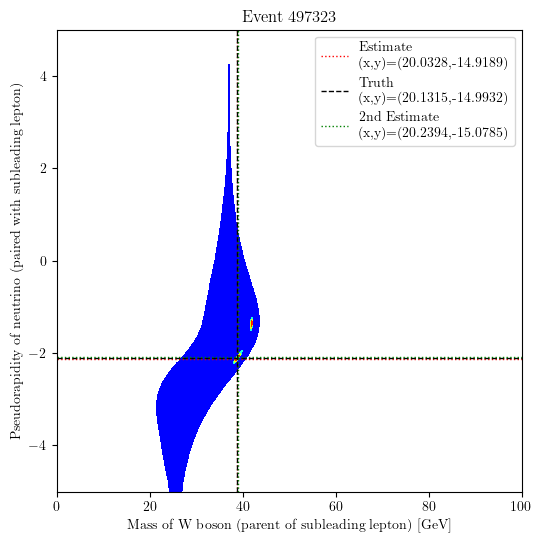

In [459]:
#meshgrid
'''
    |--------------------> x axis
    |z[i,j] = [[00,01,02],
    |          [10,11,12],
    |          [20,21,22]]
    V
  y axis

[y,x] <--> (x,y)
array[i,j] = x 
numpy unravel_index of element x returns j,i 
'''
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title(f"Event {evt_id}")
ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
ax.contourf(grid_x, grid_y, grid_w, cmap=my_cmap, vmin=0)
sol = solve_neutrino(evt_id,nu_eta_bin[j],W_sublead_m_bin[i])
if len(sol) == 1:
    x,y = sol
elif len(sol) > 1:
    x,y = sol[0] if calculate_weight(evt_id,[sol[0]]) > calculate_weight(evt_id,[sol[1]]) else sol[1]
    
else:
    x,y = 'n/a','n/a'
ax.axvline(W_sublead_m_bin[i], ls='dotted', c='r', lw=1, label='Estimate\n(x,y)=({:.4f},{:.4f})'.format(x,y))
ax.axhline(nu_eta_bin[j], ls='dotted', c='r', lw=1)
ax.axvline(SubleadW.at[evt_id,'m'], ls='dashed', c='k', lw=1, label='Truth\n(x,y)=({:.4f},{:.4f})'.format(SubleadNu.at[evt_id,'px'],SubleadNu.at[evt_id,'py']))
ax.axhline(SubleadNu.at[evt_id, 'eta'], ls='dashed', c='k', lw=1)
##### 2nd greatest weight #####

sol = solve_neutrino(evt_id,nu_eta_bin[l],W_sublead_m_bin[k])
if len(sol) == 1:
    x,y = sol
elif len(sol) > 1:
    x,y = sol[0] if calculate_weight(evt_id,[sol[0]]) > calculate_weight(evt_id,[sol[1]]) else sol[1]
    
else:
    x,y = 'n/a','n/a'
#ax.axline([W_sublead_m_bin[k],nu_eta_bin[l]],slope=0.1, ls='dotted', c='g', lw=1, label='2nd Estimate\n(x,y)=({:.4f},{:.4f})'.format(x,y))
#ax.axline([W_sublead_m_bin[k],nu_eta_bin[l]],slope=-0.1, ls='dotted', c='g', lw=1)
ax.axvline(W_sublead_m_bin[k], ls='dotted', c='g', lw=1, label='2nd Estimate\n(x,y)=({:.4f},{:.4f})'.format(x,y))
ax.axhline(nu_eta_bin[l], ls='dotted', c='g', lw=1)
ax.legend()
plt.show()

In [450]:
selection = np.where(diNeutrino['m2'] >= 0, True, False)
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(6,6))
ax.hist2d()





(array([False,  True]), array([      3, 2928859]))

In [385]:
print(sol)
w1 = (calculate_weight(evt_id,[sol[0]]))
w2 = (calculate_weight(evt_id,[sol[1]]))

j,i = np.unravel_index(grid_w.argmax(),grid_w.shape)
print(j,i)
print(W_sublead_m_bin[i],nu_eta_bin[j],grid_w[j,i])
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_w[j+1,i-1],grid_w[j+1,i],grid_w[j+1,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_w[j  ,i-1],grid_w[j  ,i],grid_w[j  ,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_w[j-1,i-1],grid_w[j-1,i],grid_w[j-1,i+1]))
grid_weight = grid_w
grid_weight[j,i] = -1*grid_w[j,i]
j,i = np.unravel_index(grid_weight.argmax(),grid_weight.shape)
print(j,i)
print(W_sublead_m_bin[i],nu_eta_bin[j],grid_weight[j,i])
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_weight[j+1,i-1],grid_weight[j+1,i],grid_weight[j+1,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_weight[j  ,i-1],grid_weight[j  ,i],grid_weight[j  ,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_weight[j-1,i-1],grid_weight[j-1,i],grid_weight[j-1,i+1]))

[[-19.2548859   -4.86630112]
 [-15.06086506 -15.12593184]]
453 97
9.70970970970971 -0.4654654654654653 0.9549324037050829
0.89.0.78.0.62
0.95.0.95.0.85
0.81.-0.96.-0.99
453 96
9.60960960960961 -0.4654654654654653 0.9498475192443986
0.91.0.89.0.78
0.83.0.95.-0.95
0.58.0.81.-0.96


In [4]:
%%time
Plead = np.where(LeptonP['pt']>LeptonM['pt'], True, False)
Mlead = np.where(LeptonP['pt']<LeptonM['pt'], True, False)
Leading = mf.load_particle('LeadLepton.npz', None, GeV)
Sublead = mf.load_particle('subLeadLepton.npz', None, GeV)
WPlead = np.where(LeptonP['pt']>LeptonM['pt'], True, False)
WMlead = np.where(LeptonP['pt']<LeptonM['pt'], True, False)
LeadingW = WBosonP[Plead].combine_first(WBosonM[Mlead])
SubleadW = WBosonP[Mlead].combine_first(WBosonM[Plead])
LeadingNu = NeutrinoP[Plead].combine_first(NeutrinoM[Mlead])
SubleadNu = NeutrinoP[Mlead].combine_first(NeutrinoM[Plead])

Loaded E from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from subLeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862

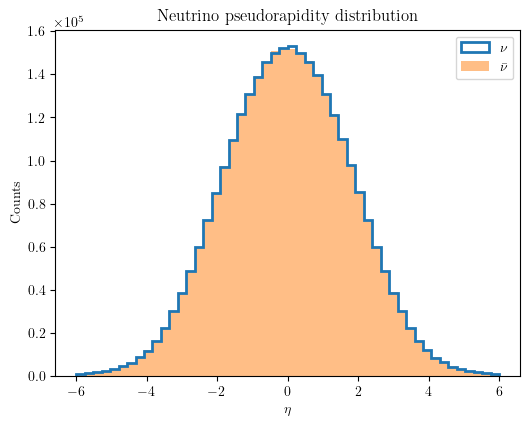

In [209]:
s = 1.5
p,q = 1,1
fig, ax = plt.subplots(nrows=p, ncols=q, figsize = (4*s*p,3*s*q))
ax.hist(NeutrinoP['eta'], bins = 50, range = [-6,6], histtype = 'step', lw=2, label = r'${\nu}$')
ax.hist(NeutrinoM['eta'], bins = 50, range = [-6,6], histtype = 'bar', alpha = 0.5, label = r'$\bar{\nu}$')
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r'Counts')
ax.set_title("Neutrino pseudorapidity distribution")
ax.legend()
ax.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.show()

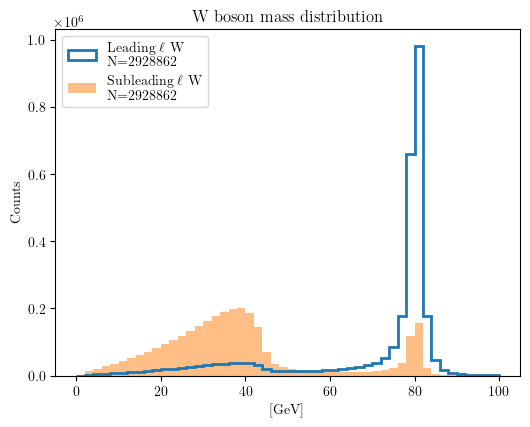

In [120]:
s = 1.5
p,q = 1,1
fig, ax = plt.subplots(nrows=p, ncols=q, figsize = (4*s*p,3*s*q))
ax.hist(LeadingW['m'], bins = 50, range = [0,100], histtype = 'step', lw=2, label = r'Leading $\ell$'+' W\nN={}'.format(len(LeadingW['m'])))
ax.hist(SubleadW['m'], bins = 50, range = [0,100], histtype = 'bar', alpha = 0.5, label = r'Subleading $\ell$'+' W\nN={}'.format(len(SubleadW['m'])))
ax.set_xlabel(r"[GeV]")
ax.set_ylabel(r'Counts')
ax.set_title("W boson mass distribution")
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.show()